# Metodo Conservativo e Metodi Simplettici per sistemi Hamiltoniani

###  Gianlorenzo De Filippo N85001792 $\qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad$ Giuseppe Puca N85001750

In questo progetto si vuole analizzare la bontà del metodo conservativo rispetto ai metodi simplettici convenzionali come il metodo di Verlet e di Runge Kutta Dormand Prince come fatto di Mark H. Holmes in "Conservative Numerical Methods For Nonlinear Oscillators".

In [1]:
import time

START = time.time()

# INTRODUZIONE

La prima parte del progetto è dedicata all'esposizione del metodo conservativo nel caso di singola particella soggetta ad una forza conservativa, cioé in cui l'energia meccanica del sistema (l'hamiltoniana) si conserva nel tempo.
$$$$
Molti metodi numerici utilizzati per approssimare la soluzione alle equazioni di Hamilton non sono conservativi, cioé non preservano l'hamiltoniana se non dopo un numero molto grande di iterazione. Il metodo conservativo invece ha come obiettivo primario quello di conservare l'hamiltoniana da una iterazione all'altra in modo da conservare l'energia per un periodo molto ampio di tempi.
$$$$
Nel casi di sistemi a singola particella, avente massa m, di velocità $v=\dot{ y}$ e sottoposti ad una energia potenziale $V(y)$ si ha che l'hamiltoniana assume la forma:
$$H(y,\, v)=\frac{1}{2}mv^2+V(y)$$
Ora da una iterazione $n$ alla successiva $n+1$ si deve avere che:
$$H(y_{n+1},\, v_{n+1})-H(y_n,\, v_n)=\frac{1}{2}m(v_{n+1}^2-v_n^2)+V(y_{n+1})-V(y_n)=0$$

## Metodo Conservativo

Il metodo consevativo parte con l'assumere che modificare metodi conservativi per sistemi lineari ( per esempio potenziali armonici risolti tramite metodo di trapezi) restituisca un buon candidato conservativo anche per sistemi non lineari.
Partiamo quindi dal seguente sistema di iterazione:
$$$$
$$y_{n+1}=y_n+\tilde{v}\Delta t$$
$$$$
$$v_{n+1}=v_n+\tilde{F}\frac{\Delta t}{m}$$
dove $\Delta t$ è la lunghezza del "passo" temporale scelto che lega un istante di tempo al suo successivo $t_{n+1}=t_n+\Delta t$.
$$$$
Ora essendo il problema conservativo il potenziale e la forza associata sono legati fra loro, essendo il problema a singola particella, per definizione come:
$$\displaystyle V(y)=-\int_{y_0}^{y}F(s)\,ds$$
Riscriviamo la differenza delle due hamiltoniane come:
$$\displaystyle H(y_{n+1},\, v_{n+1})-H(y_n,\, v_n)=\frac{1}{2}m(v_{n+1}^2-v_n^2)-\int_{y_0}^{y_{n+1}}F(s)\,ds+\int_{y_0}^{y_n}F(s)\,ds$$
Usando l'additività degli integrali:
$$\displaystyle H(y_{n+1},\, v_{n+1})-H(y_n,\, v_n)=\frac{1}{2}m(v_{n+1}-v_n)(v_{n+1}+v_n)-\int_{y_n}^{y_{n+1}}F(s)\,ds$$
Sostituendo la definizione di $v_{n+1}$:
$$\displaystyle H(y_{n+1},\, v_{n+1})-H(y_n,\, v_n)=\frac{1}{2}m\left(v_n+\tilde{F}\frac{\Delta t}{m}-v_n\right)(v_{n+1}+v_n)-\int_{y_n}^{y_{n+1}}F(s)\,ds$$
Semplificando ed imponendo la conservatività si ottiene:
$$\displaystyle 0=\frac{1}{2}(v_{n+1}+v_n)\tilde{F}\Delta t-\int_{y_n}^{y_{n+1}}F(s)\,ds$$
Ora viene naturale porre $\displaystyle \tilde{v}=\frac{v_{n+1}+v_n}{2}$, percui:
$$\displaystyle \tilde{v}\Delta t\tilde{F}=\int_{y_n}^{y_{n+1}}F(s)\,ds$$
Ora per definizione $y_{n+1}-y_n=\tilde{v}\Delta t$:
$$(y_{n+1}-y_n)\tilde{F}=\int_{y_n}^{y_{n+1}}F(s)\,ds$$
Dunque possiamo concludere che la forza del metodo conservativo è una media integrale della forza reale:
$$\displaystyle \tilde{F}=\frac{1}{y_{n+1}-y_n}\int_{y_n}^{y_{n+1}}F(s)\,ds$$
In questa espressione la continuità di $F$ è essenziale per mandare al limite $y_{n+1} \rightarrow y_n$ questa espressione, in quanto per il teorema della media integrale si ha che $\tilde{F}(y_{n+1},\, y_n) \rightarrow F(y_n)$. Inoltre la forza media è invariante sotto scambio di avvenimenti temporali, cioé vale $\tilde{F}(y_{n+1},\, y_n)=\tilde{F}(y_n,\, y_{n+1})$, dunque questo oggetto è invariante per "time reversal", una proprietà fondamentale dei sistemi conservativi.
$$$$
Da queste espressioni per $\tilde{v}$ e $\tilde{F}$ si può affermare che il metodo conservativo consiste nello scrivere il seguente sistema di equazioni alle differenze:
$$y_{n+1}=y_n+\frac{v_{n+1}+v_n}{2}\Delta t$$
$$$$
$$\displaystyle v_{n+1}=v_n+\frac{\Delta t}{m}\frac{1}{y_{n+1}-y_n}\int_{y_n}^{y_{n+1}}F(s)\,ds$$
Ora questo metodo è del secondo ordine nel tempo, dimostriamolo considerando l'andamento della soluzione esatta per piccoli $\Delta t$ valutando l'ordine di infinitesimo delle equazioni del metodo:
$$o(\Delta t^n)=y(t+\Delta t)-y(t)-\frac{1}{2}(v(t+\Delta t)+v(t))\Delta t$$
Espandendo in serie di Taylor le due soluzioni:
$$\displaystyle y(t+\Delta t)=\sum_{k=0}^{+\infty}\frac{d^k y}{dt^k}\frac{\Delta t^k}{k!}$$
$$$$
$$\displaystyle v(t+\Delta t)=\sum_{k=0}^{+\infty}\frac{d^k v}{dt^k}\frac{\Delta t^k}{k!}$$
Sostituendo:
$$\displaystyle o(\Delta t^n)=\sum_{k=0}^{+\infty}\frac{d^k y}{dt^k}\frac{\Delta t^k}{k!}-y(t)-\frac{1}{2}\left(\sum_{k=0}^{+\infty}\frac{d^k v}{dt^k}\frac{\Delta t^k}{k!}+v(t)\right)\Delta t$$
Svolgendo i primi termini della somma:
$$\displaystyle o(\Delta t^n)=y(t)+v(t)\Delta t +\sum_{k=2}^{+\infty}\frac{d^k y}{dt^k}\frac{\Delta t^k}{k!}-y(t)-\frac{1}{2}\left(v(t) +\sum_{k=1}^{+\infty}\frac{d^k v}{dt^k}\frac{\Delta t^k}{k!}+v(t)\right)\Delta t$$
Semplificando:
$$\displaystyle o(\Delta t^n)=v(t)\Delta t +\sum_{k=2}^{+\infty}\frac{d^k y}{dt^k}\frac{\Delta t^k}{k!}-v(t)\Delta t -\frac{1}{2}\sum_{k=1}^{+\infty}\frac{d^k v}{dt^k}\frac{\Delta t^{k+1}}{k!}$$
Semplificando ancora:
$$\displaystyle o(\Delta t^n)=\sum_{k=2}^{+\infty}\frac{d^k y}{dt^k}\frac{\Delta t^k}{k!}-\frac{1}{2}\sum_{k=1}^{+\infty}\frac{d^k v}{dt^k}\frac{\Delta t^{k+1}}{k!}$$
La velocità è definita come: $\displaystyle v(t)=\frac{dy}{dt}$, dunque la seconda somma diviene:
$$\displaystyle o(\Delta t^n)=\sum_{k=2}^{+\infty}\frac{d^k y}{dt^k}\frac{\Delta t^k}{k!}-\frac{1}{2}\sum_{k=1}^{+\infty}\frac{d^{k+1} y}{dt^{k+1}}\frac{\Delta t^{k+1}}{k!}$$
Passando la seconda somma a $k=k+1$:
$$\displaystyle o(\Delta t^n)=\sum_{k=2}^{+\infty}\frac{d^k y}{dt^k}\frac{\Delta t^k}{k!}-\frac{1}{2}\sum_{k=2}^{+\infty}\frac{d^k y}{dt^k}\frac{\Delta t^{k}}{(k+1)!}$$
Unendo le due somme:
$$\displaystyle o(\Delta t^n)=\sum_{k=2}^{+\infty}\frac{d^k y}{dt^k}\left(\frac{1}{k!}-\frac{1}{2(k+1)!}\right)\Delta t^{k}$$
Sviluppiamo la parentesi usando il fatto che E$(k+1)!=(k+1)k!$:
$$\displaystyle o(\Delta t^n)=\sum_{k=2}^{+\infty}\frac{d^k y}{dt^k}\left(1-\frac{1}{2(k+1)}\right)\frac{\Delta t^{k}}{k!}$$
Semplificando:
$$\displaystyle o(\Delta t^n)=\frac{1}{2}\sum_{k=2}^{+\infty}\frac{d^k y}{dt^k}\frac{2k+1}{(k+1)!}\Delta t^{k}$$
Il primo ordine per cui il termine della serie è diverso da zero è $k=2$, pertanto il metodo va asintoticamente come $o(\Delta t^2)$ ed è quindi del secondo ordine.
$$$$
Ora calcoliamo la condizione necessaria sull'integrale di media affinché possa approssimare la soluzione fino al secondo ordine. Per fare ciò espandiamo sempre in serie di Taylor sia $\tilde{F}$ sia $F$:
$$\displaystyle F(y)=\sum_{k=0}^{+\infty}\left(\frac{d^kF}{dy^k}\right)\biggr\rvert_{y=y_n}\frac{(y-y_n)^k}{k!}$$
$$$$
$$\displaystyle \tilde{F}=\sum_{k=0}^{+\infty}\left(\frac{\partial^k \tilde{F}}{\partial y^k_{n+1}}\right)\biggr\rvert_{y_{n+1}=y_n}\frac{(y_{n+1}-y_n)^k}{k!}$$
Sostituiamo le serie di Taylor all'interno della definizione di $\tilde{F}$:
$$\displaystyle \sum_{k=0}^{+\infty}\left(\frac{\partial^k \tilde{F}}{\partial y^k_{n+1}}\right)\biggr\rvert_{y_{n+1}=y_n}\frac{(y_{n+1}-y_n)^k}{k!}=\frac{1}{y_{n+1}-y_n}\int_{y_n}^{y_{n+1}}\sum_{k=0}^{+\infty}\left(\frac{d^kF}{dy^k}\right)\biggr\rvert_{y=y_n}\frac{(y-y_n)^k}{k!}\,dy$$
Per la continuità delle funzioni si può scambiare la serie e l'integrale in modo da ottenenere:
$$\displaystyle \sum_{k=0}^{+\infty}\left(\frac{\partial^k \tilde{F}}{\partial y^k_{n+1}}\right)\biggr\rvert_{y_{n+1}=y_n}\frac{(y_{n+1}-y_n)^k}{k!}=\frac{1}{y_{n+1}-y_n}\sum_{k=0}^{+\infty}\left(\frac{d^kF}{dy^k}\right)\biggr\rvert_{y=y_n}\frac{1}{k!}\int_{y_n}^{y_{n+1}}(y-y_n)^k\,dy$$
Sostituendo $\alpha=y-y_n$:
$$\displaystyle \sum_{k=0}^{+\infty}\left(\frac{\partial^k \tilde{F}}{\partial y^k_{n+1}}\right)\biggr\rvert_{y_{n+1}=y_n}\frac{(y_{n+1}-y_n)^k}{k!}=\frac{1}{y_{n+1}-y_n}\sum_{k=0}^{+\infty}\left(\frac{d^kF}{dy^k}\right)\biggr\rvert_{y=y_n}\frac{1}{k!}\int_{0}^{y_{n+1}-y_n}\alpha^k\,d\alpha$$
Svolgendo l'integrale:
$$\displaystyle \sum_{k=0}^{+\infty}\left(\frac{\partial^k \tilde{F}}{\partial y^k_{n+1}}\right)\biggr\rvert_{y_{n+1}=y_n}\frac{(y_{n+1}-y_n)^k}{k!}=\frac{1}{y_{n+1}-y_n}\sum_{k=0}^{+\infty}\left(\frac{d^kF}{dy^k}\right)\biggr\rvert_{y=y_n}\frac{1}{k!}\frac{(y_{n+1}-y_n)^{k+1}}{k+1}$$
Semplificando e portando allo stesso membro le due serie si ottiene:
$$\displaystyle \sum_{k=0}^{+\infty}\Bigg[\left(\frac{\partial^k \tilde{F}}{\partial y^k_{n+1}}\right)\biggr\rvert_{y_{n+1}=y_n}-\frac{1}{k+1}\left(\frac{d^k F}{dy^k}\right)\biggr\rvert_{y=y_n}\Bigg]\frac{(y_{n+1}-y_n)^k}{k!}=0$$
Questa serie può essere nulla se i suoi termini sono tutti nulli:
$$\left(\frac{\partial^k \tilde{F}}{\partial y^k_{n+1}}\right)\biggr\rvert_{y_{n+1}=y_n}=\frac{1}{k+1}\left(\frac{d^k F}{dy^k}\right)\biggr\rvert_{y=y_n}$$
Nel caso di $k=0$ e $k=1$ restituisce rispettivamente $\tilde{F}(y_n,\,y_n)=F(y_n)$ e $\displaystyle \left(\frac{\partial \tilde{F}}{\partial y_{n+1}}\right)\biggr\rvert_{y_{n+1}=y_n}=\frac{1}{2}\left(\frac{d F}{dy}\right)\biggr\rvert_{y=y_n}$, che sono le due condizioni necessarie affinché sia del secondo ordine.

## Esempi notevoli e Metodo Velocity-Verlet

Mostriamo ora degli esempi notevoli del metodo conservativo.
$$$$
Scegliamo ad esempio una forza del tipo $F(y)=\alpha y^p$ con $p \in \mathbb{N}$ e calcoliamo $\tilde{F}$:
$$\displaystyle \tilde{F}=\frac{1}{y_{n+1}-y_n}\int_{y_n}^{y_{n+1}}\alpha s^p\,ds$$
Svolgendo l'integrale elementare:
$$\displaystyle \tilde{F}=\frac{\alpha}{y_{n+1}-y_n}\frac{y_{n+1}^p-y_n^p}{p+1}$$
Usando la scomposizione di Ruffini (a partire dalla serie geometrica) si ottiene:
$$\displaystyle \tilde{F}=\frac{\alpha}{p+1}\sum_{i=0}^p y_{n+1}^i y_n^{p-i}$$
In particolare per $p=1$ si ottiene il caso lineare (oscillatore armonico) coincidente con il metodo dei trapezi:
$$\displaystyle \tilde{F}=\frac{\alpha}{2}(y_{n+1}+y_n)$$
Questa particolare classe di forze può essere estesa ad una qualsiasi forza scritta come polinomio nella $y$ come si evince dal sistema scaturente dall'equazione di Duffing $\ddot{y}=-\alpha y-\beta y^3$. In questo caso la forza $F(y)=-\alpha y-\beta y^3$ e dunque si vede facilmente che il metodo di conservazione restituisce il seguente sistema:
$$y_{n+1}=y_n+\frac{v_{n+1}+v_n}{2}\Delta t$$
$$$$
$$v_{n+1}=v_n-\frac{y_{n+1}-y_n}{2}\Bigg[\alpha+\frac{\beta}{2}(y_n^2+y_{n+1}^2)\Bigg]\Delta t$$
In ogni caso il metodo di conservazione è un metodo implicito poiché esso necessita nella determinazione della posizione $y_{n+1}$ e velocità $v_{n+1}$ non solo delle posizioni precedenti $y_n$ e velocità $v_n$, ma anche di $y_{n+1}$ e $v_{n+1}$ stesse!
$$$$
Infatti si può notare subito questa sua proprietà analizzando le due equazioni alle differenze associate al metodo:
$$y_{n+1}=y_n+\frac{v_{n+1}+v_n}{2}\Delta t$$
$$$$
$$v_{n+1}=v_n+\tilde{F}(y_{n+1},\, y_n)\frac{\Delta t}{m}$$
Sostituendo la prima nella seconda si ottiene:
$$v_{n+1}=v_n+\tilde{F}\left(y_n+\frac{v_{n+1}+v_n}{2}\Delta t,\, y_n\right)\frac{\Delta t}{m}$$
Questa equazione nella maggior parte dei casi non è esplicitabile nell'incognità $v_{n+1}$ e quindi bisogna utilizzare un metodo numerico per trovare gli zeri di una funzione come il metodo di Newton-Raphson.
$$$$
Un metodo esplicito usato per i sistemi hamiltoniani simplettici è invece il metodo Velocity-Verlet, che è simplettico del secondo ordine e condizionariamente convergente, cioé dipende da quanto piccolo si prende lo "step" con cui si suddivide il tempo.
$$$$
Nel caso del metodo di Velocity-Verlet bisogna conoscere la forza associata al potenziale, in modo da scrivere l'accelerazione come:
$$\displaystyle a(y)=\frac{F(y)}{m}$$
Dunque per il applicare il metodo bisogna calcolare una velocità intermedia:
$$v_{inter}(y_n)=v_n+a(y_n)\frac{\Delta t}{2}$$
Si usa poi questa velocità per ottenere la nuova posizione e velocità:
$$v_{n+1}=v_{inter}(y_n)+a(y_n)\frac{\Delta t}{2}$$
$$$$
$$y_{n+1}=y_n+v_{inter}(y_n) \Delta t$$

## Stabilità delle soluzioni

Parliamo ora della convergenza del metodo conservativo e della sua stabilità.
$$$$
Il primo passo da verificare è se il metodo restituisce il caso semplice di equazioni lineari in modo tale da approssimare le soluzioni delle equazioni non lineari, nell'intorno degli equilibri iperbolici, come quelle lineari in modo da ereditare le stesse caratteristiche di quest'ultime (teorema di Hartman-Grobman). Questa prima condizione è verificata, come visto nel caso di forze polinomiali con $p=1$, e dunque le soluzioni numeriche del metodo ereditano la stessa stabilità asintotica delle soluzioni (come intesa secondo Lyapunov)
$$$$
La stabilità iperbolica è dunque relativamente facile da trattare, tuttavia a noi interessano le stabilità di tipo centro o varietà centrali dello spazio delle fasi. Noi infatti, in questo lavoro, siamo interessati allo studio dei moti periodici e dunque delle curve (in moti 1D) chiuse $H(y, v)=H(y_0, v_0)$, dove $H$ è l'hamiltoniana, dello spazio delle fasi. Se queste curve sono anche compatte, allora la soluzione numerica $H(y_n, v_n)\approx H(y, v)=H(y_0, v_0)$ sarà sempre nelle vicinaze della curva chiusa su cui giace la soluzione esatta. Tuttavia sorge un problema non banale, infatti se pur la soluzione numerica approssimerà bene la soluzione esatta, nulla ci assicura che la curva chiusa dello spazio delle fasi sia percorsa con la stessa velocità dalle due soluzioni... Questo "fenomeno" farà dunque nascere un errore di sfasamento della fase fra la soluzione numerica e quella esatta.

# PENDOLO SEMPLICE

Analizziamo ora nel dettaglio il caso ben noto del pendolo "semplice", la cui equazione (nel caso di pulsazione unitaria) è: $\ddot{y}=-sin(y)$.
$$$$
Implementiamo dunque le funzioni che ci serviranno nell'analisi di questo problema:

In [2]:
# Implementazione del metodo di Newton per trovare le radici di una funzione func
# prende in input il dato iniziale x_0, la funzione nella forma func a una variabile
# la sua derivata Df e la tolleranza sulla differenza tra i due step successivi del metodo
def root_finder(x_0, func, Dfunc, toll= 1e-14):
    x_old = x_0
    x_new = x_0 - func( x_old )/Dfunc(x_old)
    while abs(x_new-x_old)>toll:
        x_old = x_new
        x_new = x_old - func( x_old )/Dfunc( x_old )
    return x_new


# prende in input il dato iniziale rispetto (y, v) posizione-velocità,  
# l'accelerazione come funzione della posizione y e il \Delta t,
# step temporale scelto per la risoluzione numerica dell'ODE
def Vel_Verl(y_old, v_old, a, t_step): 
    v_mid = v_old + 0.5*a( y_old )*t_step
    y_new = y_old + v_mid*t_step
    v_new = v_mid + 0.5*a( y_new )*t_step
    return [ y_new, v_new ]


# Metodo conservativo per la soluzione di ODE -> descrizione sul paper di riferimento
# prende in input i dati iniziali y_old e v_old, assieme alle funzioni delle variabili (y_n, y_n+1) F_intg e DF_intg
# rispettivamente la funzione \tilde F del paper e DF la sua derivata rispetto a v_n+1
def Cons_ode(y_old, v_old, F_intg, DF_intg, t_step):
    y_new = lambda v: y_old + ( v_old + v )*0.5*t_step
    F_root = lambda v: ( v_old + t_step*F_intg( y_old, y_new( v ) ) - v )
    DF_root = lambda v: ( t_step*DF_intg( y_old, y_new( v ) ) - 1 )
    v_new = root_finder( v_old, F_root, DF_root )
    return [ y_new( v_new ), v_new ]
# while abs(x_new-x_old)>toll:

L'hamiltoniana di questo sistema è dunque:
$$ H(y, v) = \frac{1}{2}v^2 -\cos(y) $$
L'integrale della forza media in questo caso è:
$$ \tilde{F}(y_n, y_{n+1})=\frac{1}{y_{n+1}-y_n}\int_{y_n}^{y_{n+1}}(-\sin(s))\,ds  = $$
$$ = \frac{\cos(y_{n+1})-\cos(y_n)}{y_{n+1}-y_n}= -\frac{\sin((y_{n+1}-y_{n})/2)\sin((y_n+y_{n+1})/2)}{(y_{n+1}-y_n)/2}$$
se 
$$ w := \frac{\tilde v \Delta t}{2}= \frac{\Delta t \cdot (v_{n}+v_{n+1})}{4}$$
allora 
$$ \tilde F (y_n, y_{n+1}) = -\frac{\sin(w)\sin(y_n+w)}{w}$$
mentre
$$ \frac{\partial \tilde F}{\partial v_{n+1}} = -\frac{\Delta t}{4} \cdot \frac{\partial}{\partial w}\frac{\sin(w)\sin(y_n+w)}{w}=$$
$$ = \frac{\Delta t}{4} \left[ \frac{\sin(w)\sin(y_n+w)}{w^2} - \frac{\cos(w)\sin(y_n+w)}{w}-\frac{\sin(w)\cos(y_n+w)}{w}  \right] $$
$$ = -\frac{\Delta t}{4}\left[ \cos(y_n+w)-\frac{\sin(y_n+w)}{w}\frac{\sin(w)}{w}+\cos(w)\frac{\sin(y_n+w)}{w}  \right]$$
In modo del tutto generale vale la utile relazione:
$$  \frac{\partial \tilde F}{\partial v_{n+1}}(y_n, y_n + \tilde v \Delta t) = \frac{1}{2 \tilde v} \left[ F(y_n + \tilde v \Delta t) - \tilde F (y_n, y_n + \tilde v \Delta t)  \right] $$

Definiamo quindi queste funzioni:

In [3]:
from math import sin, cos, pi
def sinc(x):
    if x == 0.:
        return 1
    else:
        return sin(x)/x
def F_tilde_pendulum(y_old, y_new):
    w = (y_new-y_old)*0.5
    return -sinc(w)*sin(y_old + w)
def DF_tilde_pendulum(y_old, y_new, delta_t):
    w = (y_new-y_old)*0.5
    if w == 0.:
        return -0.25*delta_t*cos(y_old)
    else:
        return 0.25*delta_t*( sin( w )*sin( y_old + w )/(w*w) - cos( w )*sin( y_old + w )/w - cos( y_old + w )*sin(w)/w)

def H(y, v):
    return 0.5*v*v-cos(y)

In [4]:
import matplotlib.pyplot as plt

Definiamo poi anche il metodo di Runge-Kutta Dormand Prince, cioè l'algoritmo numerico per la risoluzione di equazioni differenzili usato da Matlab:

In [5]:
def RK_Dormand_Prince_2D(y_old, v_old, f1, f2, h):
    k1 = h*f1( v_old ) 
    k2 = h*f1( v_old + k1/5. )
    k3 = h*f1( v_old + 3*k1/40. + 9.*k2/40. )
    k4 = h*f1( v_old + 44.*k1/45. - 56.*k2/15. + 32.*k3/9. )
    k5 = h*f1( v_old + 19372./6561.*k1 - 25360.*k2/2187. + 64448.*k3/6561. - 212.*k4/729. )
    k6 = h*f1( v_old + 9017.0*k1/3168.0 - 355.0*k2/33.0 + 46732.0*k3/5247.0 + 49.0*k4/176.0 - 5103.0*k5/18656.0 )
    y_new = y_old + (35.0*k1/384.0 + 500.0*k3/1113. + 125.0 *k4/192.0 - 2187.0*k5/6784.0 + 11.0*k6/84.0)
    
    k1 = h*f2( y_old ) 
    k2 = h*f2( y_old + k1/5. )
    k3 = h*f2( y_old + 3*k1/40. + 9.*k2/40. )
    k4 = h*f2( y_old + 44.*k1/45. - 56.*k2/15. + 32.*k3/9. )
    k5 = h*f2( y_old + 19372./6561.*k1 - 25360.*k2/2187. + 64448.*k3/6561. - 212.*k4/729. )
    k6 = h*f2( y_old + 9017.0*k1/3168.0 - 355.0*k2/33.0 + 46732.0*k3/5247.0 + 49.0*k4/176.0 - 5103.0*k5/18656.0 )
    v_new = v_old + (35.0*k1/384.0 + 500.0*k3/1113. + 125.0 *k4/192.0 - 2187.0*k5/6784.0 + 11.0*k6/84.0)
    
    return [ y_new, v_new ]

## Errore fra le soluzioni numeriche e la varietà centrale esatta

Calcoliamo dunque gli errori $\displaystyle err=\Big\lvert\frac{H(t)}{H_0}-1\Big\rvert$ rispetto all'Hamiltoniana di partenza $H_0(y_0,\, v_0)$ delle tre soluzioni ottenute dai tre metodi differenti. Le soluzioni sono calcolate in un intervallo di tempo $0\leq t \leq 1000 T$, con condizioni iniziali $\displaystyle y_0=\frac{7}{8}\pi$ e $v_0=0$. Il periodo $T=4K\left(sin\left(\frac{y_0}{2}\right)\right)\approx 12.16$ del pendolo serve da unità di riferimento per l'intervallo di tempo considerato, il quale è stato poi sudiviso in $N=14000$ intervallini equispaziati.
$$$$
Il confronto fra i tre metodi, su scala logaritmica, è il seguente:

In [6]:
N = 14000
Period = 12.16
T_i, T_f = 0., Period*1e03
t_step = (T_f - T_i) / N
y_nC, v_nC = 7.*0.125*pi, 0.
y_nV, v_nV = 7.*0.125*pi, 0.
y_nRK, v_nRK = 7.*0.125*pi, 0.
H_0C, H_0V, H_0RK = H(y_nC, v_nC), H(y_nV, v_nV), H(y_nRK, v_nRK)
DF = lambda y1, y2: DF_tilde_pendulum(y1, y2, t_step)

CM_errors = []
VV_errors = []
RK_errors = []
T_int = []
Y_nC=[]
Y_nV=[]
Y_nRK=[]
V_nC=[]
V_nV=[]
V_nRK=[]

for n in range(N):
    Y_nC.append(y_nC)
    Y_nV.append(y_nV)
    Y_nRK.append(y_nRK)
    V_nC.append(v_nC)
    V_nV.append(v_nV)
    V_nRK.append(v_nRK)
    T_n = T_i + (n+1)*t_step
    y_nC, v_nC = Cons_ode(y_nC, v_nC, F_tilde_pendulum, DF, t_step)
    y_nV, v_nV = Vel_Verl(y_nV, v_nV, lambda y: -sin(y), t_step)
    y_nRK, v_nRK = RK_Dormand_Prince_2D(y_nRK, v_nRK, lambda v: v, lambda y: -sin(y), t_step)
    H_C, H_V = H(y_nC, v_nC), H(y_nV, v_nV)
    H_RK = H(y_nRK, v_nRK)
    err_C = abs(H_C/H_0C-1)
    err_V = abs(H_V/H_0V-1)
    err_RK = abs(H_RK/H_0RK-1)
    CM_errors.append(err_C)
    VV_errors.append(err_V)
    RK_errors.append(err_RK)
    T_int.append(T_n)

Confrontiamo il metodo di Verlet e quello conservativo nello spazio delle fasi:

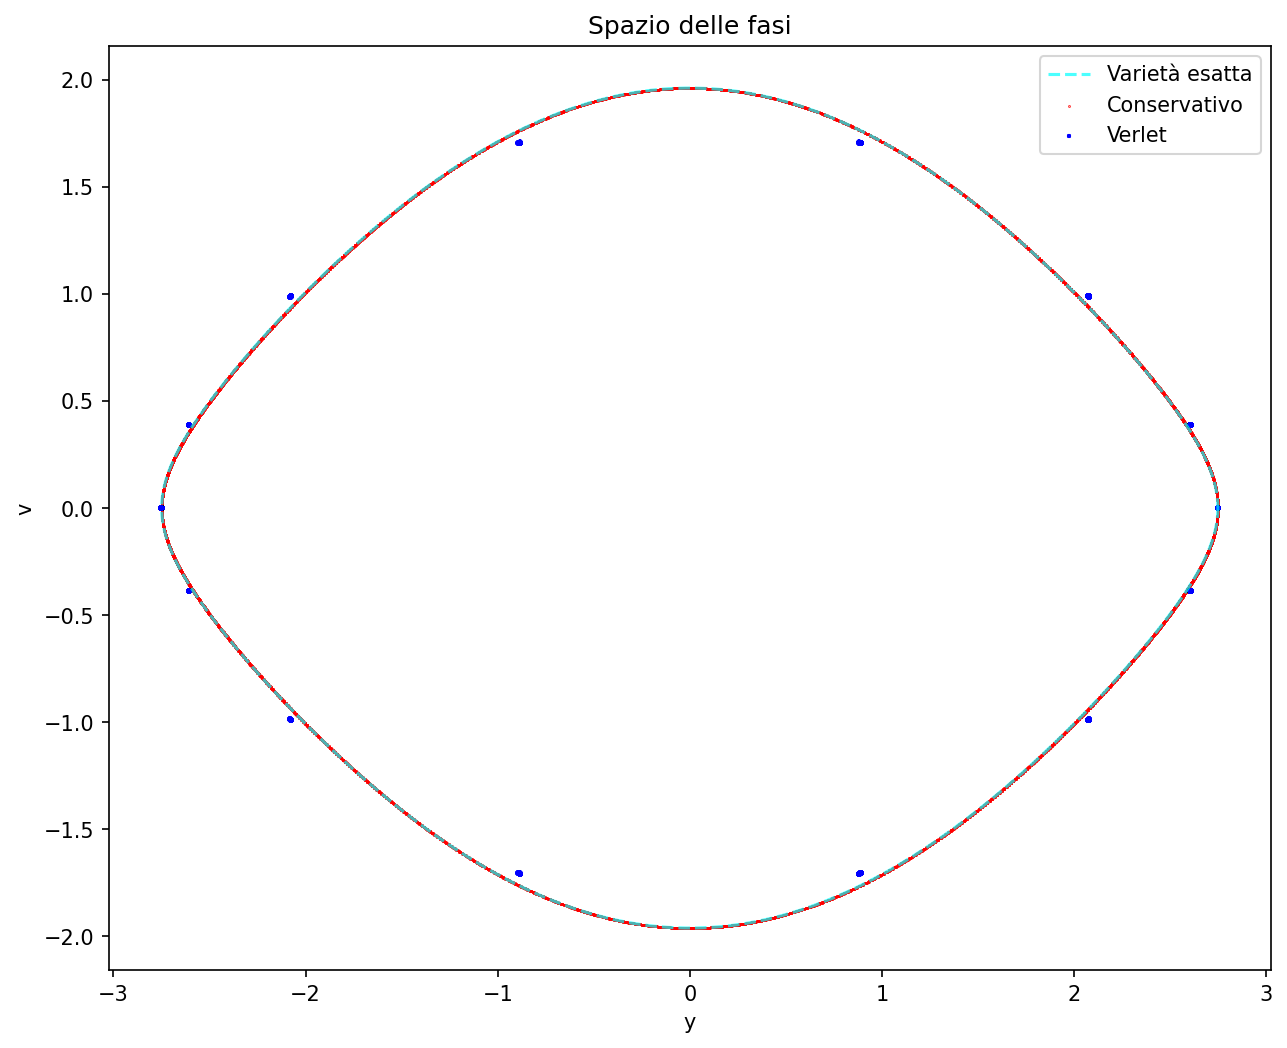

In [7]:
from math import sqrt
Delta_theta=(2.*7.*0.125*pi)/N
y_vero=[-7.*0.125*pi+(k+1)*Delta_theta for k in range(N)]
v_vero_sopra=[]
v_vero_sotto=[]
for k in range(N):
    v_vero_sopra.append(sqrt(2*cos(y_vero[k])+sqrt(2+sqrt(2))))
    v_vero_sotto.append(-sqrt(2*cos(y_vero[k])+sqrt(2+sqrt(2))))
plt.figure(figsize=(10,8), dpi=150)
plt.plot(y_vero, v_vero_sopra, c='cyan', linestyle='--', alpha=0.7, linewidth=1.5, label='Varietà esatta')
plt.plot(y_vero, v_vero_sotto, c='cyan', linestyle='--', alpha=0.7, linewidth=1.5)
plt.scatter(Y_nC, V_nC, color='red', marker='o', s=0.1, label='Conservativo')
plt.scatter(Y_nV, V_nV, c='blue', marker='s', s=1, label='Verlet')
plt.xlabel('y')
plt.ylabel('v')
plt.title('Spazio delle fasi')
plt.legend()
plt.show()

Possiamo notare che il metodo di Verlet non è ancora del tutto convergente, se pur locato stabilmente nell'intorno della varietà, mentre il metodo conservativo è visibilmente convergente.

In [8]:
del Delta_theta, y_vero, v_vero_sopra, v_vero_sotto

In [9]:
import matplotlib.gridspec as gridspec

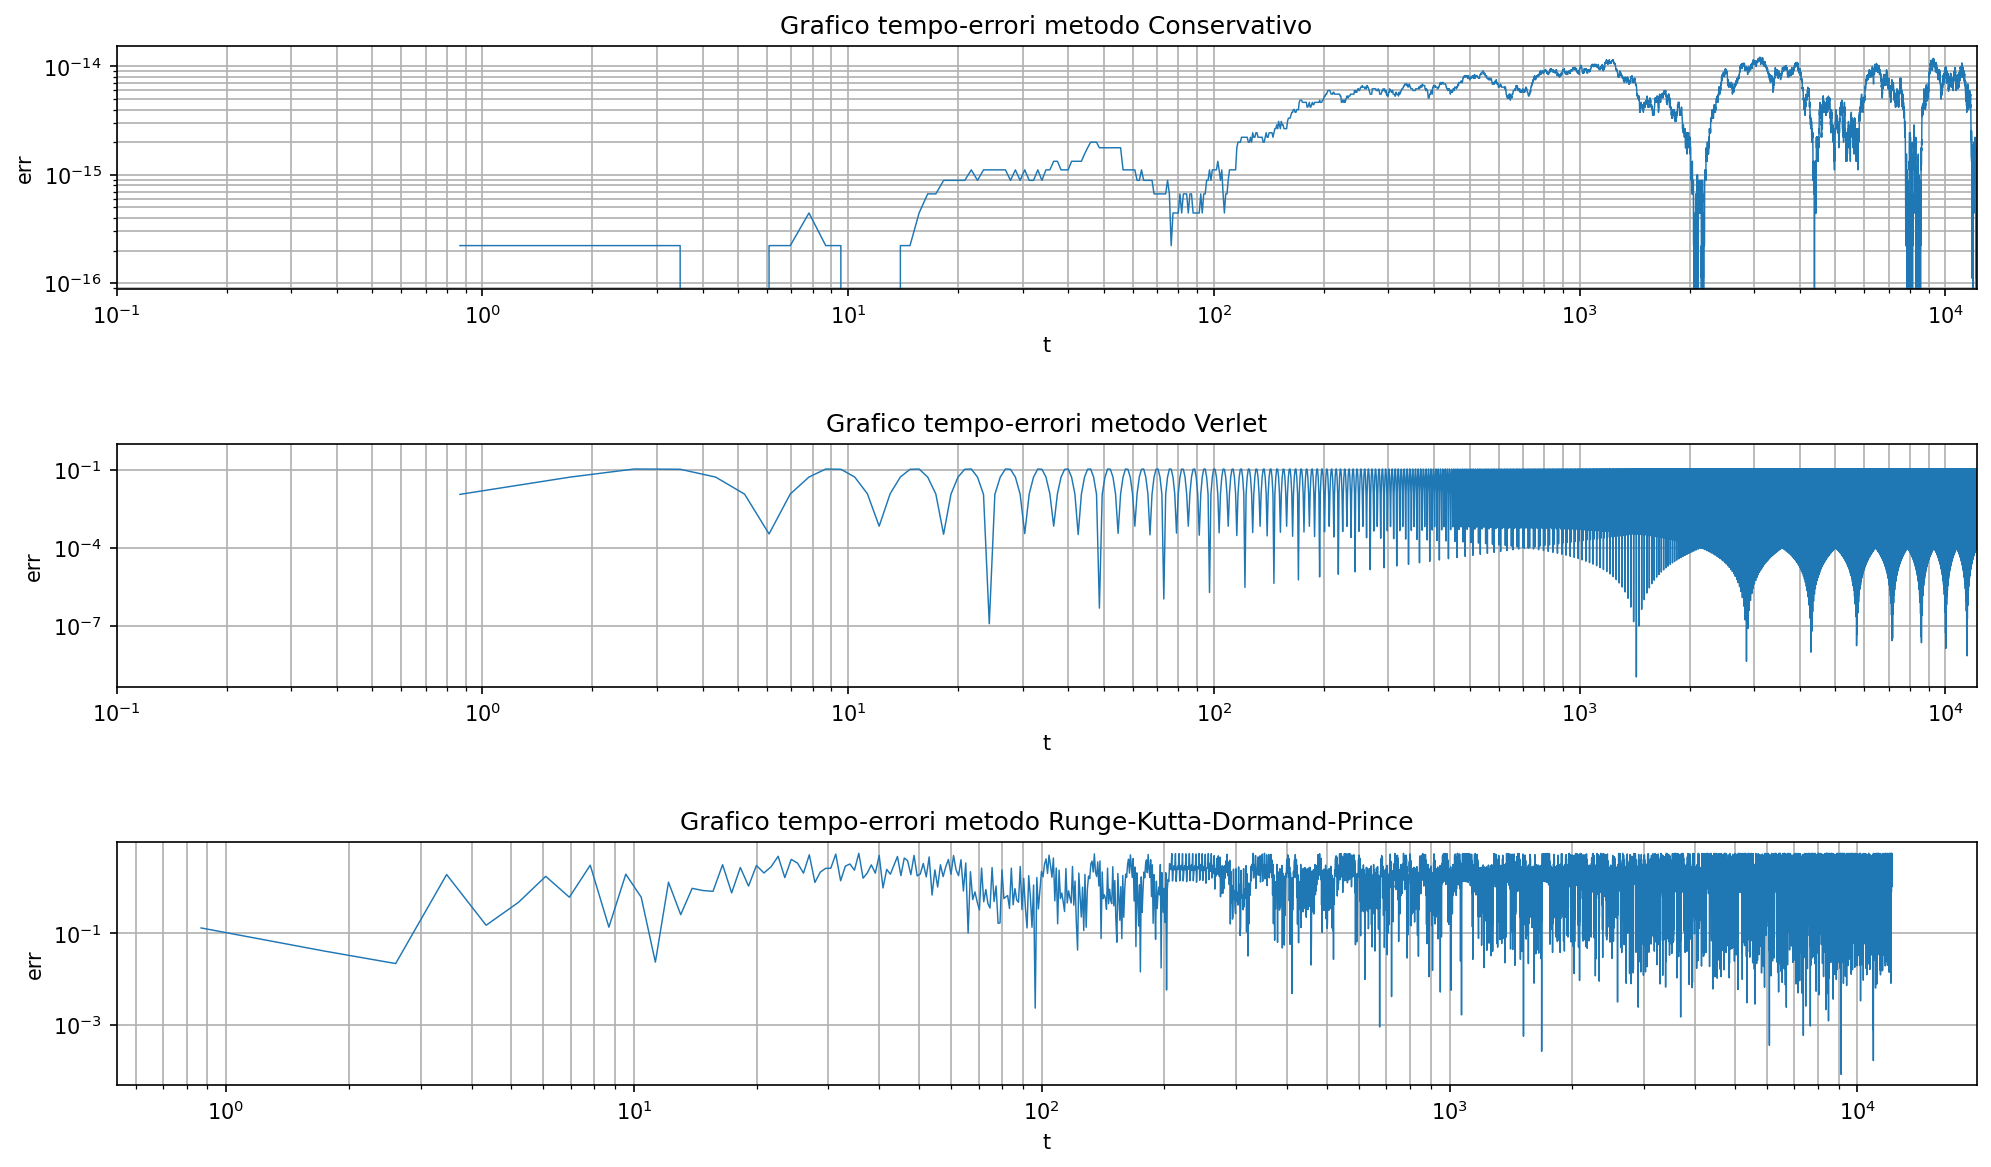

In [10]:
plt.figure( figsize=( 16, 9), dpi= 150 ) # begin figure
gs = gridspec.GridSpec(8, 1)

ax0 = plt.subplot( gs[ :2, : ] )
ax1 = plt.subplot( gs[ 3:5, : ] )
ax2 = plt.subplot( gs[ 6:, : ] )


ax0.loglog(T_int, CM_errors, linewidth=0.7)
ax0.set_xlim(0.1, T_f)
ax0.set_ylim(None, None)
ax1.loglog(T_int, VV_errors, linewidth=0.7)
ax1.set_xlim(0.1, T_f)
ax1.set_ylim(None, 1)
ax2.loglog(T_int, RK_errors, linewidth=0.7)

ax0.grid(which='both')
ax1.grid(which='both')
ax2.grid(which='both')

ax0.set_xlabel('t')
ax0.set_ylabel('err')
ax1.set_xlabel('t')
ax1.set_ylabel('err')
ax2.set_xlabel('t')
ax2.set_ylabel('err')

ax0.set_title('Grafico tempo-errori metodo Conservativo')
ax1.set_title('Grafico tempo-errori metodo Verlet')
ax2.set_title('Grafico tempo-errori metodo Runge-Kutta-Dormand-Prince')
plt.show() # end figure

Possiamo ora notare che il metodo conservativo ha errori di ordini di grandezza più bassi rispetto a quello di Verlet e di Dormand-Prince. Il metodo di Verlet necessita di molti punti $N=14000$ per convergere, in quanto esso converge condizionatamente. 

In [11]:
del CM_errors, VV_errors, RK_errors, T_int, Y_nC, Y_nV, Y_nRK, V_nC, V_nV, V_nRK

Analizziamo adesso il massimo errore registrato nell'intervallo $0\leq t \leq 1000T$ per differenti valori dell'intervallino fondamentale $\Delta t$, confrontando i risultati ottenuti dal metodo conservativo ed il metodo di Verlet.

In [12]:
delta_t_i, delta_t_f = 1e-02, 2
N_steps = 6
t_steps = []
max_E_errors_C = []
max_E_errors_V = []
y0, v0 = 7.*0.125*pi, 0.
H0 = H(y0, v0)
for n in range(N_steps+1):
    t_step = delta_t_i*(delta_t_f/delta_t_i)**(n/N_steps)
    t_steps.append(t_step)
    max_err_C = 0
    max_err_V = 0
    t = 0
    yC, vC = y0, v0
    yV, vV = y0, v0
    while t < 1000*Period:
        yC, vC = Cons_ode(yC, vC, F_tilde_pendulum, lambda y1, y2: DF_tilde_pendulum(y1, y2, t_step), t_step)
        yV, vV = Vel_Verl(yV, vV, lambda y: -sin(y), t_step)
        err_H_C = abs(H(yC, vC)/H0-1)
        err_H_V = abs(H(yV, vV)/H0-1)
        if err_H_C >= max_err_C:
            max_err_C = err_H_C
        if err_H_V >= max_err_V:
            max_err_V = err_H_V
        t += t_step
    max_E_errors_C.append(max_err_C)
    max_E_errors_V.append(max_err_V)    

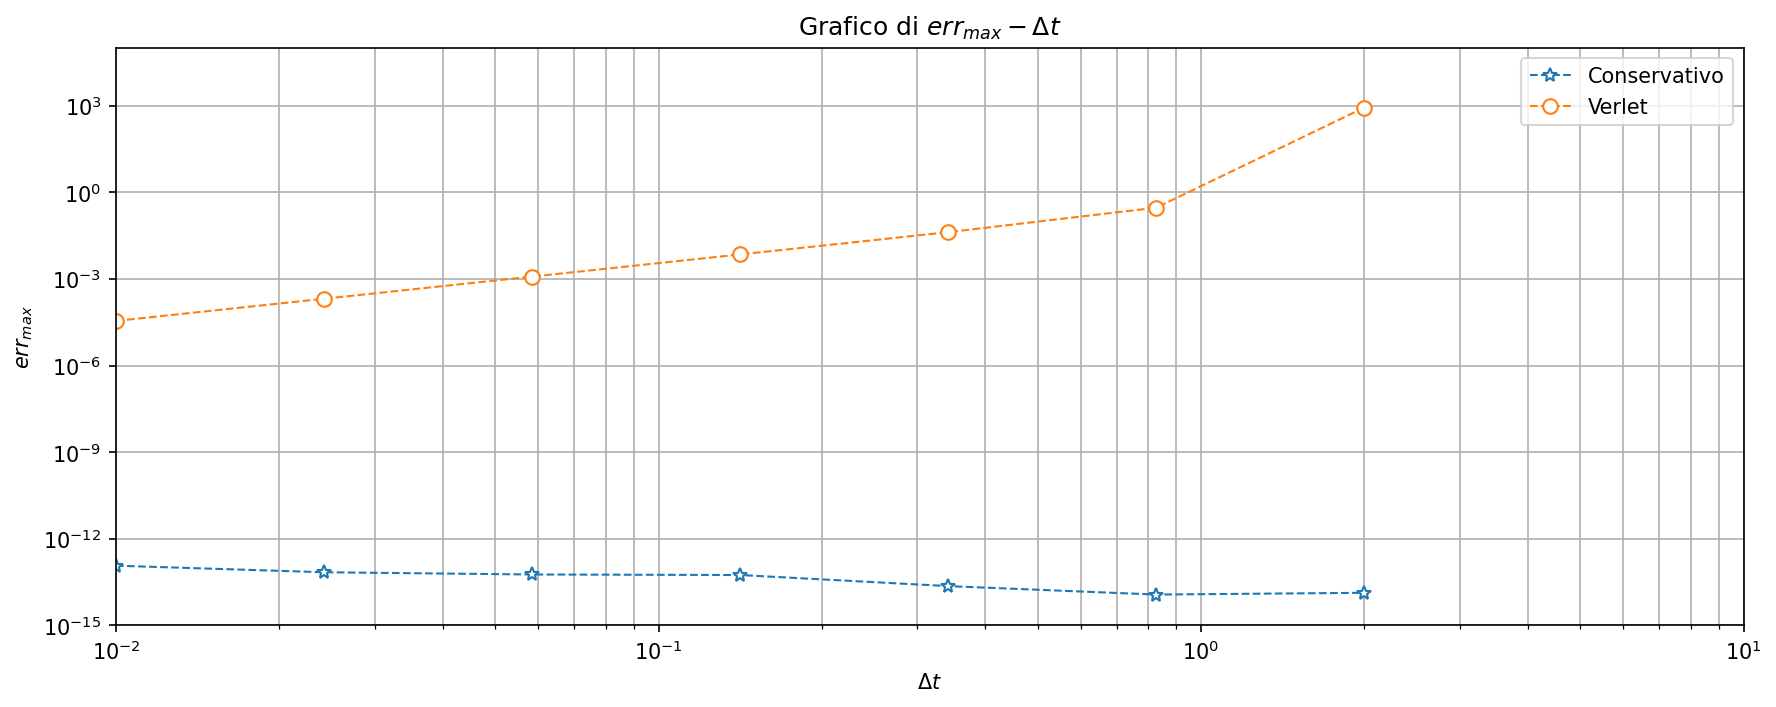

In [13]:
plt.figure(figsize=(14,5), dpi=150)
plt.loglog(t_steps, max_E_errors_C, marker='*', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Conservativo')
plt.loglog(t_steps, max_E_errors_V, marker='o', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Verlet')
plt.xlim(0.01, 10)
plt.ylim(1e-15,1e05)
plt.grid(which='both')
plt.ylabel('$err_{max}$')
plt.xlabel('$\Delta t$')
plt.title('Grafico di $err_{max}-\Delta t$')
plt.legend()
plt.show()

In questo grafico possiamo affermare che il metodo conservativo funziona molto bene rispetto a Verlet, avendo picchi negli errori di ordini di grandezza molto differenti.

In [14]:
del t_steps, max_E_errors_C, max_E_errors_V

## Errore di fase 

Tutta l'analisi precedentemente svolta era incentrata sul determinare con che errore le soluzioni si trovavano sulla varietà dello spazio delle fasi, nel nostro caso sulla curva $\displaystyle \frac{1}{2}v^2-cos(y)=\frac{1}{2}\sqrt{2+\sqrt{2}}$, disegnata dalla soluzione esatta.
$$$$
Ora ci interessa conoscere l'errore di fase, qualitativamente, della soluzione numerica rispetto a quella esatta, dunque siamo interessati alla "velocità relativa" della soluzione numerica rispetto a quella esatta sulla varietà centrale.
$$$$
Per dare un idea di questo "errore di fase" si possono comparare il numero di periodi effettivamente svolti nell'arco temporale di $0\leq t \leq 100 T$ dalla soluzione esatta, rispetto al numero di periodi compiuti dalla soluzione numerica nello stesso intervallo di tempo. Questo numero di periodi $N_T$ sarà graficato in relazione al numero di punti per periodo $\displaystyle N_P=\frac{T}{\Delta t}$: 

In [15]:
N_dt = 17
N_min = 6
N_PP = [ N_min + k for k in range(N_dt)]
Dt_array = [ Period/( N_min + k ) for k in range(N_dt) ]
Period_counts_C = []
Period_counts_V = []
for Dt in Dt_array:
    t = 0
    yC_old, vC_old = y0, v0
    yV_old, vV_old = y0, v0
    countC = 0
    countV = 0
    while t < 100*Period:
        yC_new, vC_new = Cons_ode(yC_old, vC_old, F_tilde_pendulum, lambda y1, y2: DF_tilde_pendulum(y1, y2, Dt), Dt)
        yV_new, vV_new = Vel_Verl(yV_old, vV_old, lambda y: -sin(y), Dt)
        if ( vC_new < 0 ) and ( vC_old > 0 ):
            countC += 1
        if ( vV_new < 0 ) and ( vV_old > 0 ):
            countV += 1
        yC_old = yC_new
        vC_old = vC_new
        yV_old = yV_new
        vV_old = vV_new
        t += Dt
        
    Period_counts_C.append(countC)
    Period_counts_V.append(countV)

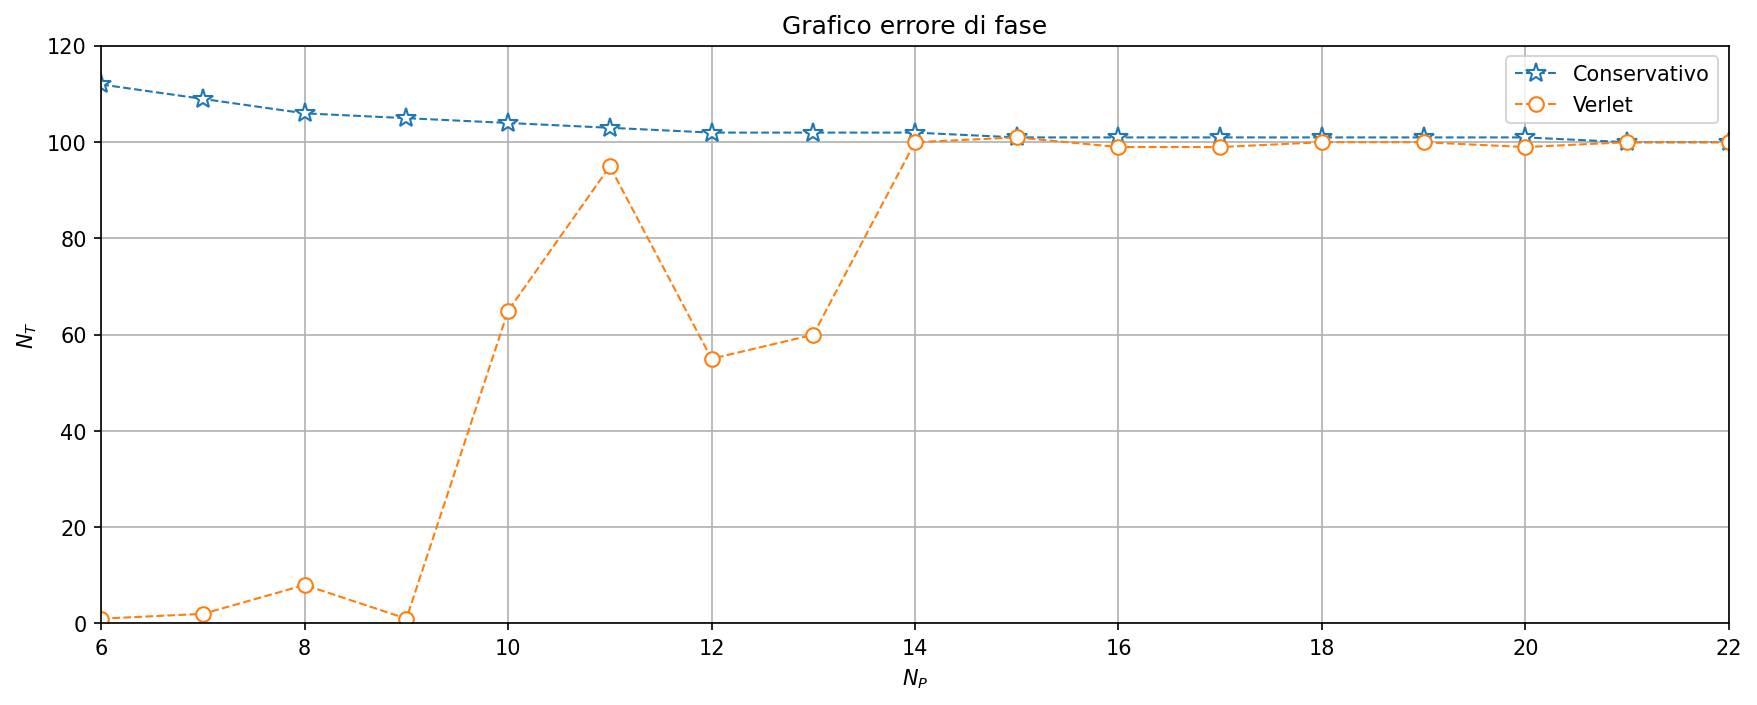

In [16]:
plt.figure(figsize=(14,5), dpi=150)
plt.plot(N_PP, Period_counts_C, marker='*', linestyle='--', markersize=10, linewidth=1, markerfacecolor='white', label='Conservativo')
plt.plot(N_PP, Period_counts_V, marker='o', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Verlet')
plt.grid(which='both')
plt.ylim(0, 120)
plt.xlim(N_PP[0], N_PP[-1])
plt.xlabel('$N_P$')
plt.ylabel('$N_T$')
plt.title('Grafico errore di fase')
plt.legend()
plt.show()

Dal grafico si evince che il metodo di Verlet non converge subito alla soluzione esatta di $N_T=100$ se non per numero di punti per periodo pari a $N_P \geq 14$, questo è un indice della sua convergenza condizionata. Invece il metodo conservativo è molto accurato e converge molto velocemente alla soluzione esatta (segue sulla curva dello spazio delle fasi la soluzione esatta).

In [17]:
del N_PP, Dt_array, Period_counts_C, Period_counts_V

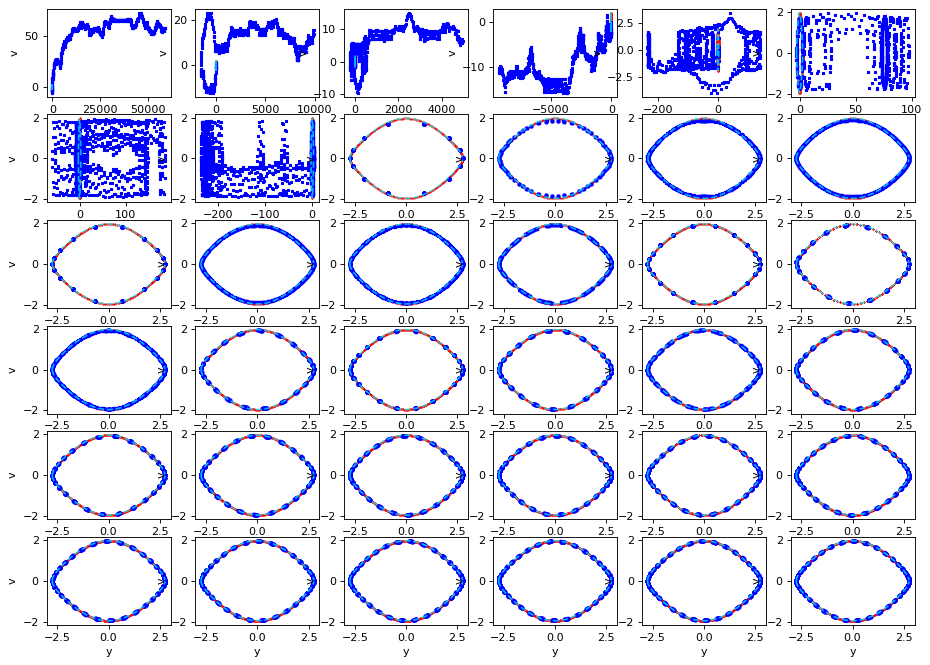

In [18]:
DF = lambda y1, y2: DF_tilde_pendulum(y1, y2, t_step)
Period = 12.16
T_i, T_f = 0., Period*1e02
N_P_min=6
N_P_max=12
N_G_y=6
N_G_x=N_P_max-N_P_min
fig, axs = plt.subplots(N_G_y, N_G_x, figsize=(14,10), dpi=80)
for p, ax in zip(range(N_G_x*N_G_y), axs.reshape(-1)):
    T_int = []
    Y_nC=[]
    Y_nV=[]
    V_nC=[]
    V_nV=[]
    t_step = Period/(N_P_min+p)
    N=100*(N_P_min+p)
    y_nC, v_nC = 7.*0.125*pi, 0.
    y_nV, v_nV = 7.*0.125*pi, 0.
    Delta_theta=(2.*7.*0.125*pi)/N
    y_vero=[-7.*0.125*pi+(k)*Delta_theta for k in range(N)]
    v_vero_sopra=[]
    v_vero_sotto=[]
    for n in range(N):
        Y_nC.append(y_nC)
        Y_nV.append(y_nV)
        V_nC.append(v_nC)
        V_nV.append(v_nV)
        T_n = T_i + (n+1)*t_step
        y_nC, v_nC = Cons_ode(y_nC, v_nC, F_tilde_pendulum, DF, t_step)
        y_nV, v_nV = Vel_Verl(y_nV, v_nV, lambda y: -sin(y), t_step)
        T_int.append(T_n)
        v_vero_sopra.append(sqrt(2*cos(y_vero[n])+sqrt(2+sqrt(2))))
        v_vero_sotto.append(-sqrt(2*cos(y_vero[n])+sqrt(2+sqrt(2))))
    ax.plot(y_vero, v_vero_sopra, c='cyan', linestyle='--', alpha=0.7, linewidth=1.5, label='Varietà esatta')
    ax.plot(y_vero, v_vero_sotto, c='cyan', linestyle='--', alpha=0.7, linewidth=1.5)
    ax.scatter(Y_nC, V_nC, color='red', marker='o', s=0.1, label='Conservativo')
    ax.scatter(Y_nV, V_nV, c='blue', marker='s', s=1, label='Verlet')
    ax.set_xlabel('y')
    ax.set_ylabel('v')
plt.show()

Questa sequenza di immagini mostra lo spazio delle fasi associato ad ogni $N_P$ del grafico precedente (si parte da in alto sinistra con $N_p=6$ e si arriva in basso a destra con $N_p=41$). Ora si può vedere che il metodo di Verlet (in blu) converge si alla curva vera (in ciano) ma solo per $N_p$ molto grandi, in quanto se pur la soluzione numerica segue il periodo della soluzione reale, i punti si addensano in particolari posizioni periodiche non sondando a pieno tutto la curva ad essa disponibile. Il metodo conservativo invece riempe tutta la curva in modo uniforme senza lascire "buchi". Questo rende l'energia nel caso di Verlet non stabile ed oscillante ad alti $\Delta t$ mentre nel caso conservativo l'energia resta sempre conservata, nei limiti del metodo di Newton utilizzato per calcolare gli zeri di funzioni. 

In [19]:
del T_int, Y_nC, Y_nV, V_nC, V_nV, t_step, Period, N_P_min, N_P_max, N, Delta_theta, y_vero, v_vero_sopra, v_vero_sotto

# ESERCIZIO N. 1

Abbiamo il sistema hamiltoniano con
$$ H(y, v) = \frac{1}{2}v^2 - \int_0^yF(s)ds $$
con 
$$ F(y) \equiv -y\left( 1-\frac{\lambda}{\sqrt{1+y^2}}\right) , \quad 0<\lambda<1$$

## a)

Si trova allora che
$$\tilde F (y_n, y_{n+1}) = \frac{1}{y_{n+1}-y_n}\int_{y_n}^{y_{n+1}}\left( -y+\lambda\frac{ y}{\sqrt{1+y^2}}\right)dy $$
$$ = -\frac{1}{y_{n+1}-y_n} \left[ 1/2 (y_{n+1}^2-y_n^2)-\lambda \left(\sqrt{1+y_{n+1}^2}-\sqrt{1+y_n^2}\right)  \right] $$
$$ = -\frac{1}{y_{n+1}-y_n} \left[ 1/2 (y_{n+1}^2-y_n^2)-\lambda \left(\sqrt{1+y_{n+1}^2}-\sqrt{1+y_n^2}\right)\frac{\sqrt{1+y_{n+1}^2}+\sqrt{1+y_n^2}}{\sqrt{1+y_{n+1}^2}+\sqrt{1+y_n^2}}  \right]$$
$$ = -(y_{n+1}+y_n)\left( \frac{1}{2}-\frac{\lambda}{\sqrt{1+y_{n+1}^2}+\sqrt{1+y_n^2}} \right) $$

$$  \frac{\partial \tilde F}{\partial v_{n+1}}(y_n, y_n + \tilde v \Delta t) = \frac{1}{2 \tilde v} \left[ F(y_n + \tilde v \Delta t) - \tilde F (y_n, y_n + \tilde v \Delta t)  \right] $$

Notare che per il limite $\tilde v \to 0$ abbiamo una singolarità eliminabile. Dal calcolo del limite

$$ \frac{\partial \tilde F}{\partial v_{n+1}} = \frac{1}{2\tilde v}\left[ -(y_n+\tilde v \Delta t)\left( 1- \frac{\lambda}{\sqrt{1+(y_{n}+\tilde v \Delta t)^2}} + (2 y_n + \tilde v \Delta t)\left(  1/2 - \frac{\lambda}{\sqrt{1+y_n^2}+\sqrt{1+(y_n+\tilde v \Delta t)^2}} \right)  \right)  \right] $$
$$ \Rightarrow lim_{\tilde v \to 0}\frac{\partial \tilde F}{\partial v_{n+1}} \overset{(Hopital)}{=} \frac{1}{4} \Delta t \left( -1+\frac{\lambda}{\sqrt{1+y_n^2}} - \frac{\lambda y_n^2}{\sqrt{(1+y_n^2)^3}} \right)   $$

## c)

Il metodo di Verlet in questo caso si riduce a:
$$y_{n+1}=y_n+v_n\Delta t+F_n\frac{\Delta t^2}{2 m}$$
$$$$
$$v_{n+1}=v_n+(F_{n+1}+F_n)\frac{\Delta t}{2 m}$$
dove $\displaystyle F_{n+1}=F(y_{n+1})$ e $F_n=F(y_{n})$.

Implementiamo le funzioni sopra elencate, utili alla risoluzione del problema:

In [20]:
m1=1.
Lambda = 0.5

def prob1_F(y):
    return -y*( 1 - Lambda/sqrt( 1 + y*y ) )/m1

def V1(y):
    return 0.5*y*y - Lambda*sqrt( 1 + y*y )

def H1(y, v):
    return 0.5*m1*v*v + V1(y)

def prob1_Ft(y_old, y_new):
    return -( y_old + y_new )*( 0.5 - Lambda/( sqrt( 1 + y_new*y_new ) + sqrt( 1 + y_old*y_old ) ) )

def prob1_DFt(y_old, y_new, dt):
    v_tilde = ( y_new - y_old )/dt
    if v_tilde == 0.:
        return 0.25*dt*( -1 + Lambda/sqrt( 1 + y_old*y_old ) - Lambda*y_old**2/sqrt( 1 + y_old*y_old )**3 )
    else:
        return 0.5/v_tilde*( prob1_F(y_new) - prob1_Ft(y_old, y_new) )

## b)
Calcoliamo gli errori associti alla distanza fra la varietà e le soluzioni numeriche:

In [21]:
errC_set = []
errV_set = []
Times = []

t = 0
Period1 = 8.
T_f = Period1*1e03
StepperPeriod1 = 20
t_step1 = Period1/StepperPeriod1
Cy = 1.
Cv = 0.
Vy, Vv = Cy, Cv
H0 = H1( Cy, Cv )
while t<T_f:
    t += t_step1
    Cy, Cv = Cons_ode( Cy, Cv, prob1_Ft, lambda y1, y2 : prob1_DFt(y1, y2, dt=t_step1 ), t_step1 )
    Vy, Vv = Vel_Verl( Vy, Vv, prob1_F, t_step1 )
    errC = abs( H1( Cy, Cv )/H0 - 1 )
    errV = abs( H1( Vy, Vv )/H0 - 1 )
    errC_set.append( errC )
    errV_set.append( errV )
    Times.append( t )

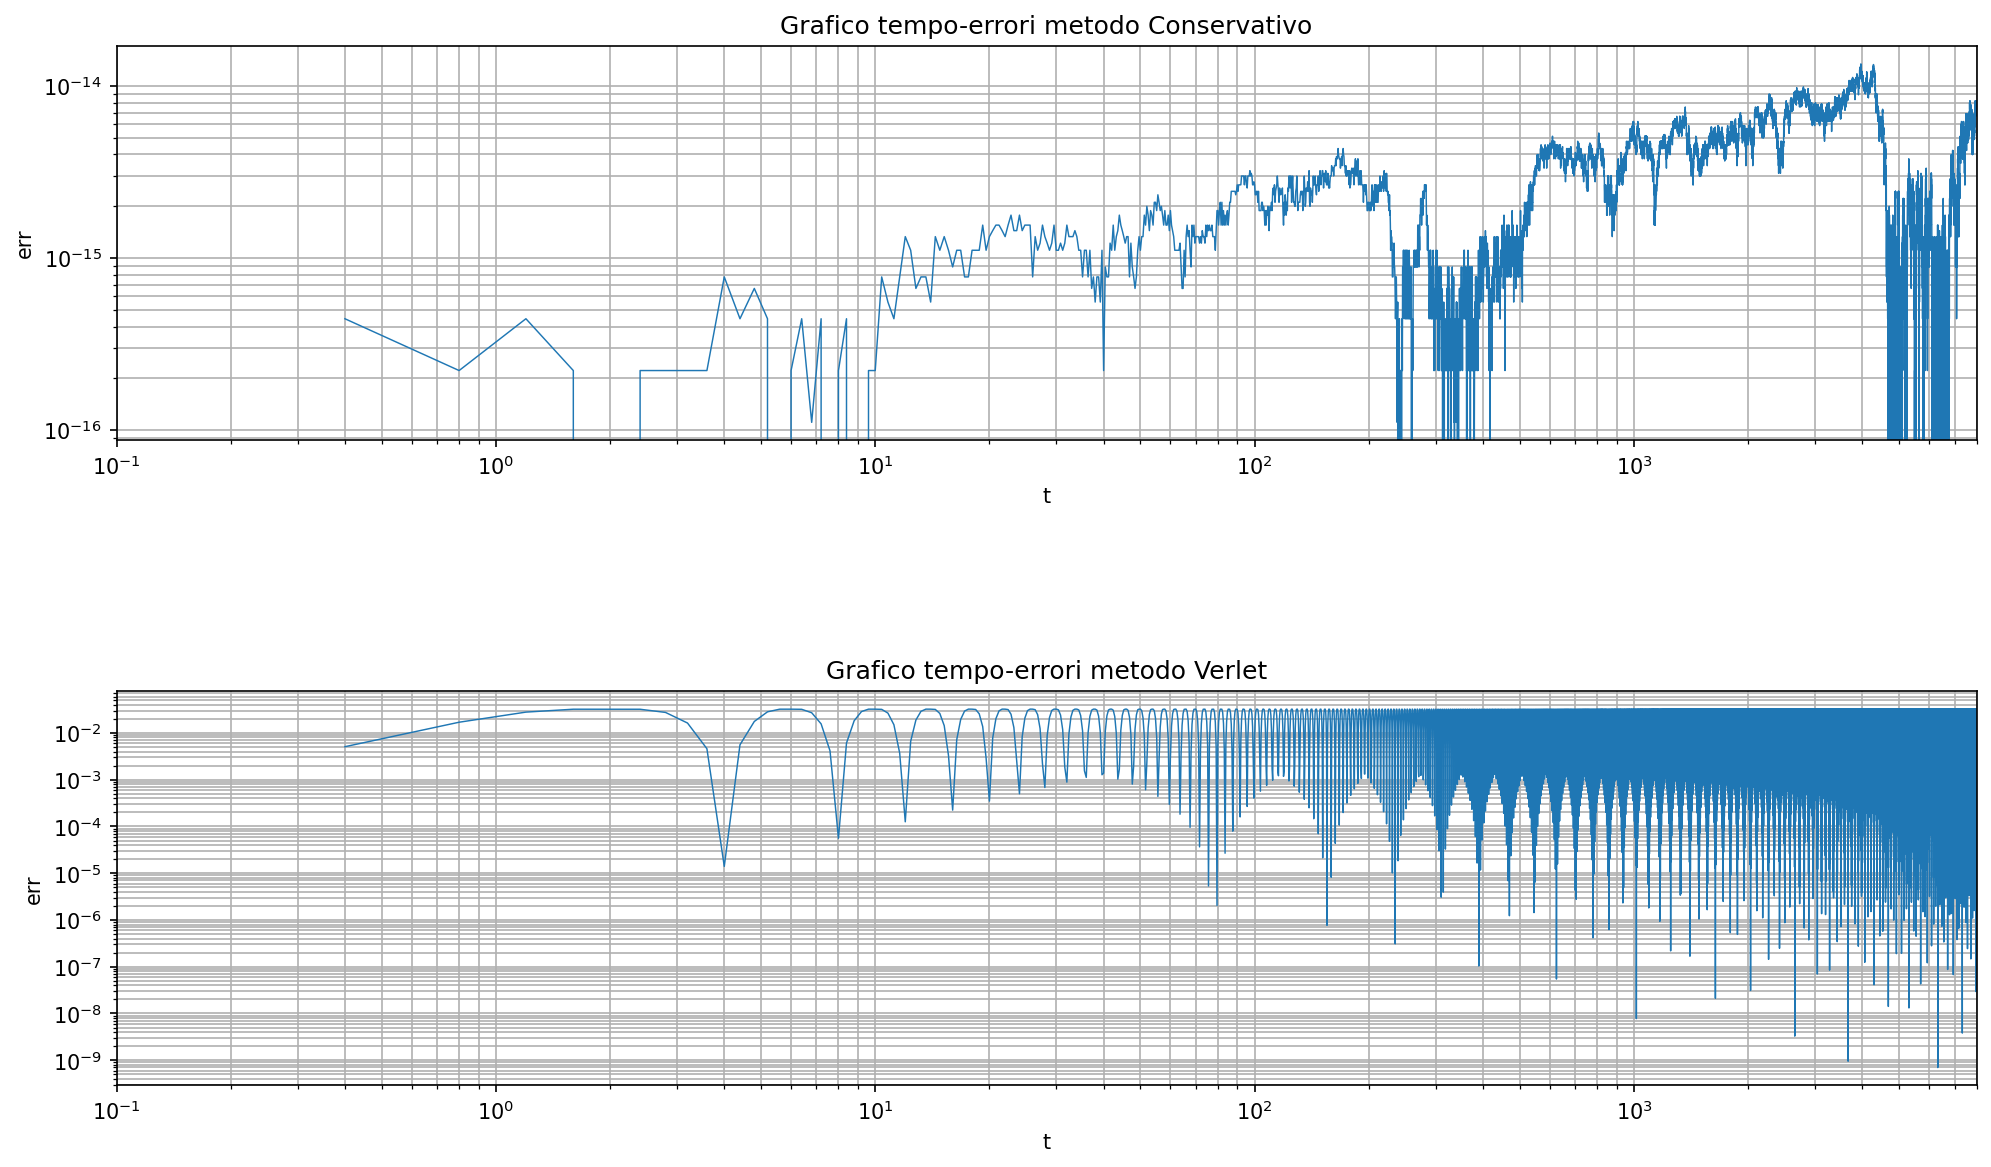

In [22]:
plt.figure( figsize=( 16, 9), dpi= 150 ) # begin figure

gs = gridspec.GridSpec(5, 1)
ax0 = plt.subplot( gs[ :2, : ] )
ax1 = plt.subplot( gs[ 3:, : ] )


ax0.loglog(Times, errC_set, linewidth=0.7)
ax0.set_xlim(0.1, T_f)
ax0.set_ylim(None, None)
ax1.loglog(Times, errV_set, linewidth=0.7)
ax1.set_xlim(0.1, T_f)
ax1.set_ylim(None, None)

ax0.grid(which='both')
ax1.grid(which='both')

ax0.set_xlabel('t')
ax0.set_ylabel('err')
ax1.set_xlabel('t')
ax1.set_ylabel('err')

ax0.set_title('Grafico tempo-errori metodo Conservativo')
ax1.set_title('Grafico tempo-errori metodo Verlet')

plt.show() # end figure

In [23]:
del errC_set, errV_set, Times

## d)
Come per il pendolo semplice, anche in questo caso il metodo conservativo resta sulla varietà con errori molto più piccoli rispetto al metodo di Verlet.
$$$$
Per vedere questo effetto in modo più marcato mostriamo il grafico degli errori massimi al variare della lunghezza degli intervallini temporali $\Delta t$:

In [24]:
Npp_i = 10
Points_number = 10
Npp_set = [Npp_i*(2**n) for n in range(Points_number)] # Faccio un plot dell'errore massimo su E raddoppiando di 
MAXERRC_set = []                                       # volta in volta il numero di punti per periodo
MAXERRV_set = []
Time_steps1 = []

Period1 = 8.
T_f = Period1*1e03
Cy = 1.
Cv = 0.
Vy, Vv = Cy, Cv
H0 = H1( Cy, Cv )
for n in Npp_set:
    time_step1 = Period1/n
    Time_steps1.append(time_step1)
    Cy = 1.
    Cv = 0.
    Vy, Vv = Cy, Cv
    t = 0
    maxC = 0
    maxV = 0
    while t<T_f:
        t += t_step1
        Cy, Cv = Cons_ode( Cy, Cv, prob1_Ft, lambda y1, y2 : prob1_DFt(y1, y2, dt=time_step1 ), time_step1 )
        Vy, Vv = Vel_Verl( Vy, Vv, prob1_F, time_step1 )
        errC = abs( H1( Cy, Cv )/H0 - 1 )
        errV = abs( H1( Vy, Vv )/H0 - 1 )
        if errC >= maxC:
            maxC = errC
        if errV >= maxV:
            maxV = errV
    MAXERRC_set.append( maxC )
    MAXERRV_set.append( maxV )

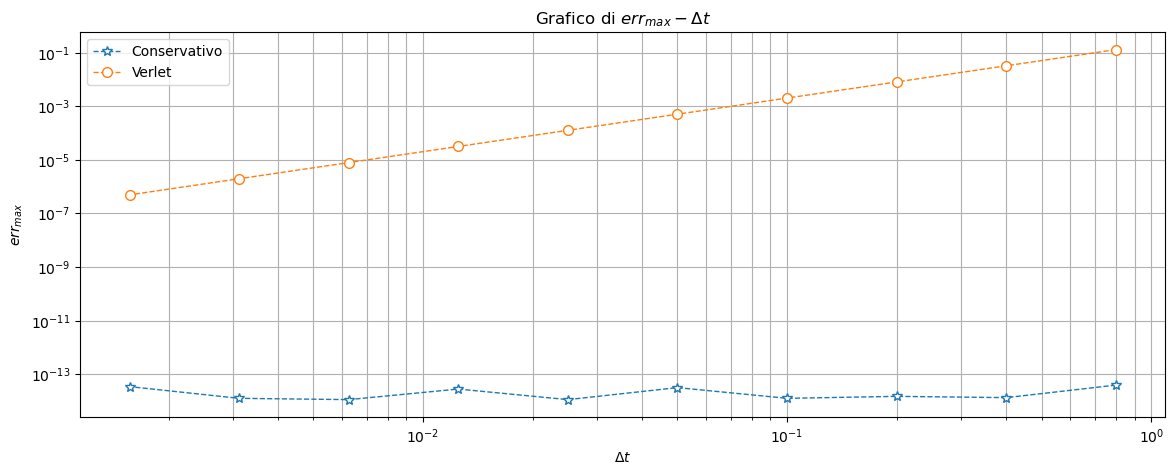

In [25]:
plt.figure(figsize=(14,5))
plt.loglog(Time_steps1, MAXERRC_set, marker='*', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Conservativo')
plt.loglog(Time_steps1, MAXERRV_set, marker='o', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Verlet')
plt.grid(which='both')
plt.ylabel('$err_{max}$')
plt.xlabel('$\Delta t$')
plt.title('Grafico di $err_{max}-\Delta t$')
plt.legend()
plt.show()

Dal grafico si evince che la precisione di Verlet non è stabile ma cresce al crescere di $\Delta t$ scelti, mentre il metodo conservativo resta stabile con errori massimi sempre minori di $err_{max} < 10^{-13}$.

In [26]:
del MAXERRC_set, MAXERRV_set, Time_steps1

Mostriamo ora il comportamento dell'errore di fase:

In [27]:
y0, v0 = 1., 0.

N_dt = 70
N_min = 4
N_PP = [ N_min + k for k in range(N_dt)]
Dt_array = [ Period1/( N_min + k ) for k in range(N_dt) ]
Period_counts_C = []
Period_counts_V = []

TESTC = []
TESTV = []
TIMES = []


for Dt in Dt_array:
    t = 0
    yC_old, vC_old = y0, v0
    yV_old, vV_old = y0, v0
    countC = 0
    countV = 0
    while t < 100*Period1:
        yC_new, vC_new = Cons_ode(yC_old, vC_old, prob1_Ft, lambda y1, y2 : prob1_DFt(y1, y2, dt=Dt ), Dt)
        yV_new, vV_new = Vel_Verl(yV_old, vV_old, prob1_F, Dt)
        if ( vC_new < 0. ) and ( vC_old > 0. ):
            countC += 1
        if ( vV_new < 0. ) and ( vV_old > 0. ):
            countV += 1

        yC_old = yC_new
        vC_old = vC_new
        yV_old = yV_new
        vV_old = vV_new
        
        
        if Dt == Dt_array[-1]:
            TESTC.append(vC_old)
            TESTV.append(vV_old)
            TIMES.append(t)
        
        
        t += Dt
        
    Period_counts_C.append(countC)
    Period_counts_V.append(countV)

Grafichiamo le leggi orarie delle velocità date da Verlet e dal metodo conservativo:

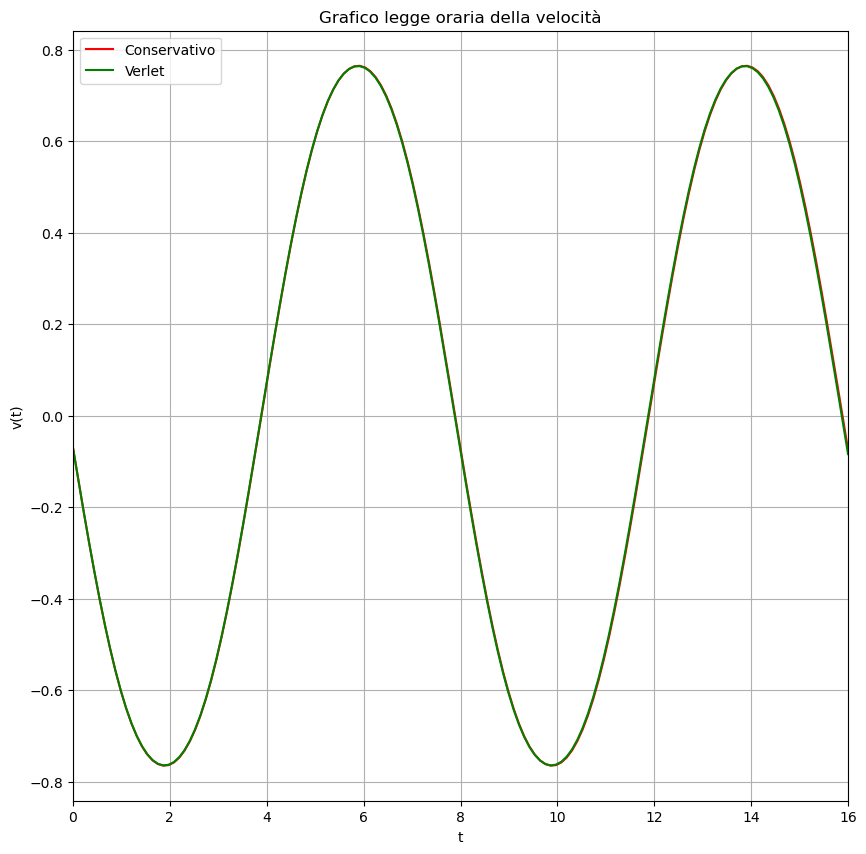

In [28]:
plt.figure(figsize=(10,10))
plt.plot(TIMES, TESTC, color='r', label='Conservativo')
plt.plot(TIMES, TESTV, color='g', label='Verlet')
plt.xlim(0,2*Period1)
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('Grafico legge oraria della velocità')
plt.grid(which='both')
plt.legend()
plt.show()

Sopra viene illustrato un confronto grafico tra le leggi orarie nei due metodi per il valore di $\Delta t=0.167$. La fase relativa tra le due figura è visibilmente molto minore della scala del grafico.

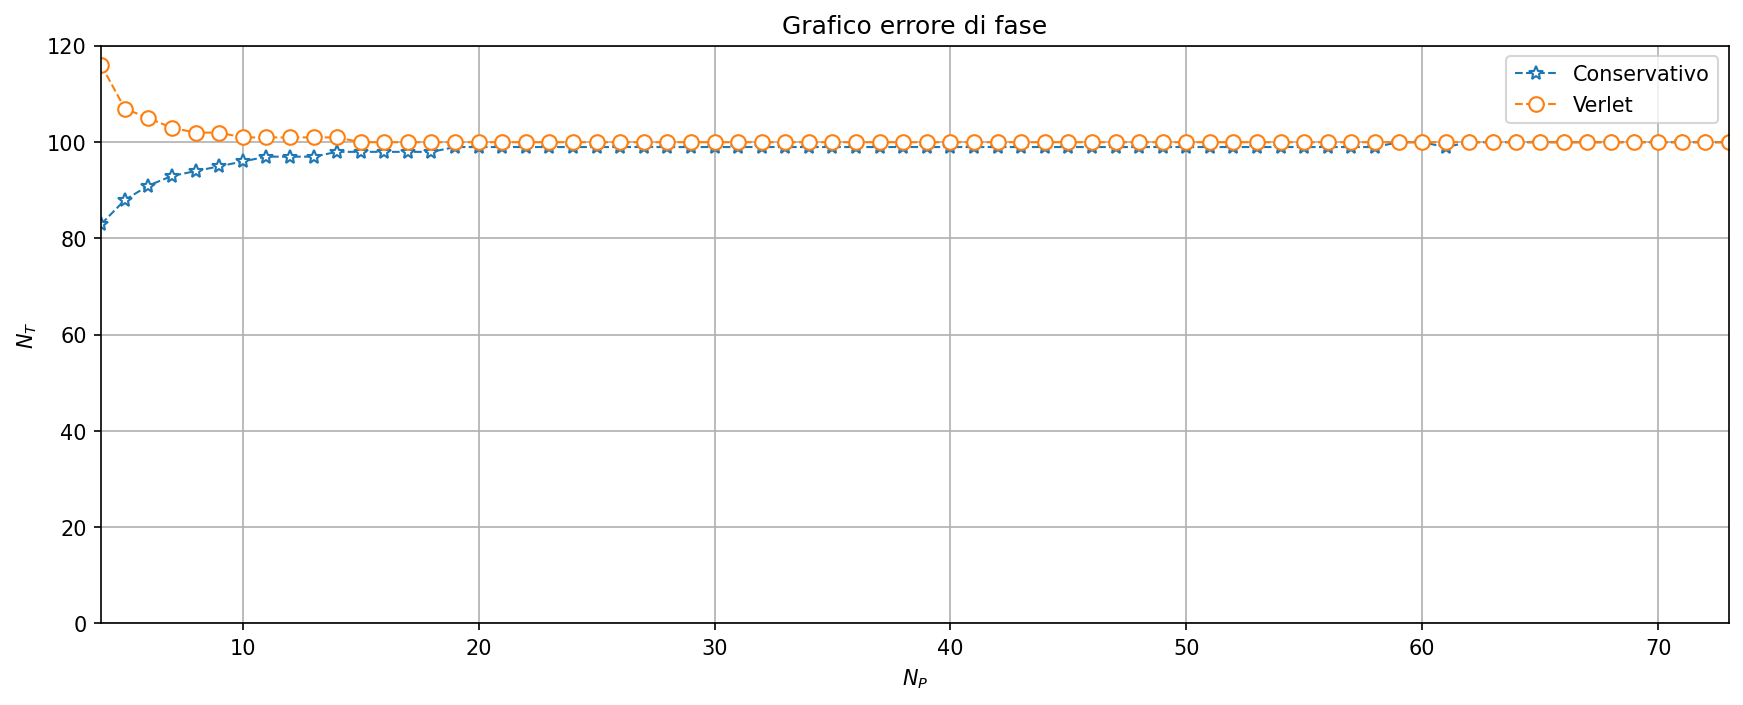

In [29]:
plt.figure(figsize=(14,5), dpi=150)
plt.plot(N_PP, Period_counts_C, marker='*', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Conservativo')
plt.plot(N_PP, Period_counts_V, marker='o', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Verlet')
plt.grid(which='both')
plt.ylim(0, 120)
plt.xlim(N_PP[0], N_PP[-1])
plt.xlabel('$N_P$')
plt.ylabel('$N_T$')
plt.title('Grafico errore di fase')
plt.legend()
plt.show()

In questo caso entrambi i metodi sono buoni, in quanto il numero di punti per periodo $N_p$ in cui il numero di periodi registrati $N_T$ è quello esatto coincidono per entrambi i metodi e vale $N_p=19$.

In [30]:
del y0, v0, N_dt, N_min, N_PP, Dt_array, Period_counts_C, Period_counts_V, TESTC, TESTV, TIMES

# ESERCIZIO N. 2

Supponiamo di avere un problema a singola particella conservativo dato da una forza esprimibile come:
$$F(y)=-\frac{dV}{dy}$$
Allora per applicare il metodo numerico "conservativo" esposto nell'articolo, dobbiamo porre il seguente sistema di equazioni alle differenze (approssimano le equazioni differenziali del sistema di Hamilton):
$$y_{n+1}=y_{n}+\frac{v_{n+1}+v_{n}}{2}\Delta t$$
$$$$
$$\displaystyle v_{n+1}=v_{n}+\frac{\Delta t}{m}\frac{1}{y_{n+1}-y_n}\int_{y_n}^{y_{n+1}}F(s)\,ds$$

## a)
Sostituiamo la forza $F(y)$ all'interno della seconda equazione, supponendo la continuità dell'energia potenziale si può applicare il teorema fondamentale del calcolo integrale, in modo da ottenere il seguente risultato:
$$\displaystyle v_{n+1}=v_{n}-\frac{V(y_{n+1})-V(y_n)}{y_{n+1}-y_n}\frac{\Delta t}{m}$$

## b)
Imponiamo la forma del potenziale essere quella di Toda:
$$\displaystyle V(y)=e^{y}-y$$
La forza risultante è:
$$F(y)=1-e^{y}$$
Sostituendolo nell'equazione ottenuta nel punto a) si ottiene la seguente espressione:
$$\displaystyle v_{n+1}=v_{n}-\frac{e^{y_{n+1}}-y_{n+1}-e^{y_n}+y_n}{y_{n+1}-y_n}\frac{\Delta t}{m}$$
Riordinando i termini:
$$\displaystyle v_{n+1}=v_{n}+\frac{y_{n+1}-y_n+e^{y_n}-e^{y_{n+1}}}{y_{n+1}-y_n}\frac{\Delta t}{m}$$
Spezzando la frazione si conclude che:
$$\displaystyle v_{n+1}=v_{n}+\Bigg[1-\frac{e^{y_{n+1}}-e^{y_n}}{y_{n+1}-y_n}\Bigg]\frac{\Delta t}{m}$$

## c)
Ora per risolvere il sistema bisogna trovare lo zero della funzione implicita in $v_{n+1}=x$ ottenuta sostituendo l'espressione di $y_{n+1}$ all'interno dell'equazione trovata nel punto a):
$$\displaystyle v_{n}-\frac{V(y_{n+1}(x))-V(y_n)}{y_{n+1}(x)-y_n}\frac{\Delta t}{m}-x=f(x)=0$$
dove $\displaystyle y_{n+1}(x)=y_n+\frac{x+v_n}{2}\Delta t$.
$$$$
Derivando f(x) rispetto ad x si ottiene:
$$\displaystyle f^{\prime}(x)=\frac{d f(x)}{dx}=\frac{d}{dx}\left(v_{n}-\frac{V(y_{n+1}(x))-V(y_n)}{y_{n+1}(x)-y_n}\frac{\Delta t}{m}-x\right)$$
Semplificando:
$$\displaystyle f^{\prime}(x)=-1-\frac{\Delta t}{m}\frac{d}{dx}\left(\frac{V(y_{n+1}(x))-V(y_n)}{y_{n+1}(x)-y_n}\right)$$
Applichiamo la regola di derivazione del rapporto e della catena:
$$\displaystyle f^{\prime}(x)=-1-\frac{\Delta t}{m}\frac{d}{dx}\left(\frac{(y_{n+1}(x)-y_n)V^{\prime}(y_{n+1}(x))y^{\prime}_{n+1}(x)-(V(y_{n+1}(x))-V(y_n))y^{\prime}_{n+1}(x)}{(y_{n+1}(x)-y_n)^2}\right)$$
Semplificando:
$$\displaystyle f^{\prime}(x)=-1+\frac{\Delta t}{m}\left(\frac{V(y_{n+1}(x))-V(y_n)-(y_{n+1}(x)-y_n)V^{\prime}(y_{n+1}(x))}{(y_{n+1}(x)-y_n)^2}\right)y^{\prime}_{n+1}(x)$$
Dalla definizione di $F(y)=-V^{\prime}(y)$:
$$\displaystyle f^{\prime}(x)=-1+\frac{\Delta t}{m}\left(\frac{V(y_{n+1}(x))-V(y_n)+(y_{n+1}(x)-y_n)F(y_{n+1}(x))}{(y_{n+1}(x)-y_n)^2}\right)y^{\prime}_{n+1}(x)$$
dalla definizione di $y_{n+1}(x)$ si ha che $\displaystyle y^{\prime}_{n+1}(x)=\frac{\Delta t}{2}$, e dunque si conclude che:
$$\displaystyle f^{\prime}(x)=-1+\frac{\Delta t ^2}{2 m}\left(\frac{V(y_{n+1}(x))-V(y_n)+(y_{n+1}(x)-y_n)F(y_{n+1}(x))}{(y_{n+1}(x)-y_n)^2}\right)$$

## d)
Calcoliamo quindi la funzione $f(x)$ ed $f^{\prime}(x)$ nel caso di potenziale di Toda.
$$$$
Partiamo con il calcolo di $f(x)$:
$$\displaystyle f(x)=v_{n}-\frac{V(y_{n+1}(x))-V(y_n)}{y_{n+1}(x)-y_n}\frac{\Delta t}{m}-x$$
Sostituiamo $\displaystyle y_{n+1}(x)=y_n+\frac{x+v_n}{2}\Delta t$:
$$\displaystyle f(x)=v_{n}-\frac{V\left(y_n+\frac{x+v_n}{2}\Delta t\right)-V(y_n)}{y_n+\frac{x+v_n}{2}\Delta t-y_n}\frac{\Delta t}{m}-x$$
Semplifichiamo e sostituiamo il potenziale di Toda:
$$\displaystyle f(x)=v_{n}-\frac{e^{y_n+\tfrac{x+v_n}{2}\Delta t}-\left(y_n+\frac{x+v_n}{2}\Delta t\right)-e^{y_n}+y_n}{\frac{x+v_n}{2}}\frac{1}{m}-x$$
Semplificando:
$$\displaystyle f(x)=v_{n}-\frac{e^{y_n}e^{\tfrac{x+v_n}{2}\Delta t}-\frac{x+v_n}{2}\Delta t-e^{y_n}}{\frac{x+v_n}{2}}\frac{1}{m}-x$$
Applichiamo la sostituzione $\displaystyle w=\frac{x+v_n}{2}\Delta t$:
$$\displaystyle f(w)=v_n-\frac{e^{y_n}e^{w}-w-e^{y_n}}{w}\frac{\Delta t}{m}-\frac{2}{\Delta t}w+v_n$$
Spezzando la frazione:
$$\displaystyle f(w)=2v_n-\frac{2}{\Delta t}w+\left(1-e^{y_n}\frac{e^{w}-1}{w}\right)\frac{\Delta t}{m}$$
Per questioni computazionali definiamo la funzione:
$$\displaystyle g(w)=\frac{e^{w}-1}{w} \quad w\neq 0$$
$$g(w)=1 \quad w=0$$
Dunque si ottiene:
$$\displaystyle f(w)=2v_n-\frac{2}{\Delta t}w+\left(1-e^{y_n}g(w)\right)\frac{\Delta t}{m}$$
Calcoliamo ora la derivata $f^{\prime}(x)$ sostituendo $y_{n+1}(x)$:
$$\displaystyle f^{\prime}(x)=-1+\frac{\Delta t ^2}{2 m}\left(\frac{V\left(y_n+\frac{x+v_n}{2}\Delta t\right)-V(y_n)+\left(y_n+\frac{x+v_n}{2}\Delta t-y_n\right)F\left(y_n+\frac{x+v_n}{2}\Delta t\right)}{\left(y_n+\frac{x+v_n}{2}\Delta t-y_n\right)^2}\right)$$
Semplificando e inserendo il potenziale e la forza di Toda:
$$\displaystyle f^{\prime}(x)=-1+\frac{\Delta t ^2}{2 m}\left(\frac{e^{y_n+\tfrac{x+v_n}{2}\Delta t}-\left(y_n+\frac{x+v_n}{2}\Delta t\right)-e^{y_n}+y_n+\left(\frac{x+v_n}{2}\Delta t\right)\left(1-e^{y_n+\tfrac{x+v_n}{2}\Delta t}\right)}{\left(\frac{x+v_n}{2}\Delta t\right)^2}\right)$$
Sostituendo la variabile $\displaystyle w=\frac{x+v_n}{2}{\Delta t}$ e semplificando:
$$\displaystyle f^{\prime}(w)=-1-\frac{\Delta t ^2 e^{y_n}}{2 m}\left(\frac{e^{w}(w-1)+1}{w^2}\right)$$
La funzione in parentesi è la derivata della funzione $g(w)$ definita precedentemente:
$$\displaystyle g^{\prime}(w)=\frac{e^{w}(w-1)+1}{w^2} \quad w\neq 0$$
$$g^{\prime}(w)=\frac{1}{2} \quad w=0$$
Applicando la regola della composta ad $f^{\prime}$ (ricordiamo questo "primo" è relativo alla varibile "x" e non "w") quindi:
$$\displaystyle f^{\prime}(w)\frac{\Delta t}{2}=-1-\frac{\Delta t ^2 e^{y_n}}{2 m}g^{\prime}(w)$$
Conludiamo dunque:
$$\displaystyle f^{\prime}(w)=-\frac{2}{\Delta t}-\frac{\Delta t}{m}e^{y_n}g^{\prime}(w)$$

## e)
Nel caso del metodo di Verlet bisogna conoscere la forza associata al potenziale in modo da scrivere l'accelerazione come:
$$\displaystyle a(y)=\frac{F(y)}{m}=\frac{1-e^{y}}{m}$$
Dunque per il metodo di Verlet si calcola una velocità intermedia:
$$v_{inter}(y_n)=v_n+a(y_n)\frac{\Delta t}{2}$$
Si usa questa velocità per ottenere la nuova posizione e velocità:
$$v_{n+1}=v_{inter}(y_n)+a(y_n)\frac{\Delta t}{2}$$
$$$$
$$y_{n+1}=y_n+v_{inter}(y_n) \Delta t$$

Definiamo queste funzioni utili per la risoluzione del problema:

In [31]:
import numpy as np
from math import exp
def g(x):
    if x==0:
        y=1
    else:
        y=(exp(x)-1)/x
    return y
def g_prime(x):
    if x==0:
        y=0.5
    else:
        y=(exp(x)*(x-1)+1)/(x**2)
    return y
def root_finder(x_0, f, f_prime, eps):
    x_old=x_0
    while True:
        if x_old==x_0:
            x_new=x_old-f(x_old)/f_prime(x_old)
            x_old=x_new
        else:
            x_new=x_old-f(x_old)/f_prime(x_old)
            if abs(x_new-x_old)>eps:
                x_old=x_new
            else:
                break
    return x_new
def f(y_old, v_old, w, Dt, m, g):
    z=2*v_old-2/Dt*w+(1-exp(y_old)*g(w))*Dt/m
    return z
def f_prime(y_old, v_old, w, Dt, m, g_prime):
    Z=-2/Dt-Dt/m*exp(y_old)*g_prime(w)
    return Z
def a(y, m):
    A=(1-exp(y))/m
    return A
def Cons_ode_2(y_old, v_old, f, f_prime, Dt, m):
    w_old=v_old*Dt
    f_root=lambda w: f(y_old, v_old, w, Dt, m, g)
    f_root_prime=lambda w: f_prime(y_old, v_old, w, Dt, m, g_prime) 
    w_new=root_finder(w_old, f_root, f_root_prime, eps=1e-12)
    v_new=2*w_new/Dt-v_old
    y_new=y_old+w_new
    return [y_new, v_new]
def Vel_Verl_2(y_old, v_old, a, Dt, m):
    v_inter=v_old+0.5*a(y_old, m)*Dt
    y_new=y_old+v_inter*Dt
    v_new=v_inter+0.5*a(y_new, m)*Dt
    return [y_new, v_new]

In [32]:
T=6.7
m=1
t_i=0
t_f=T*1000
Dt=T/10
N=int((t_f-t_i)/Dt)
y_0=1
v_0=0

Definiamo l'hamiltoniana del sistema:
$$H(y,\, v)=\frac{1}{2}mv^2+e^{y}-y$$

In [33]:
def H_2(y, v, m):
    E=0.5*m*v**2+exp(y)-y
    return E
H_0=H_2(y_0, v_0, m)

Osserviamo cosa sta accadendo nello spazio delle fasi:

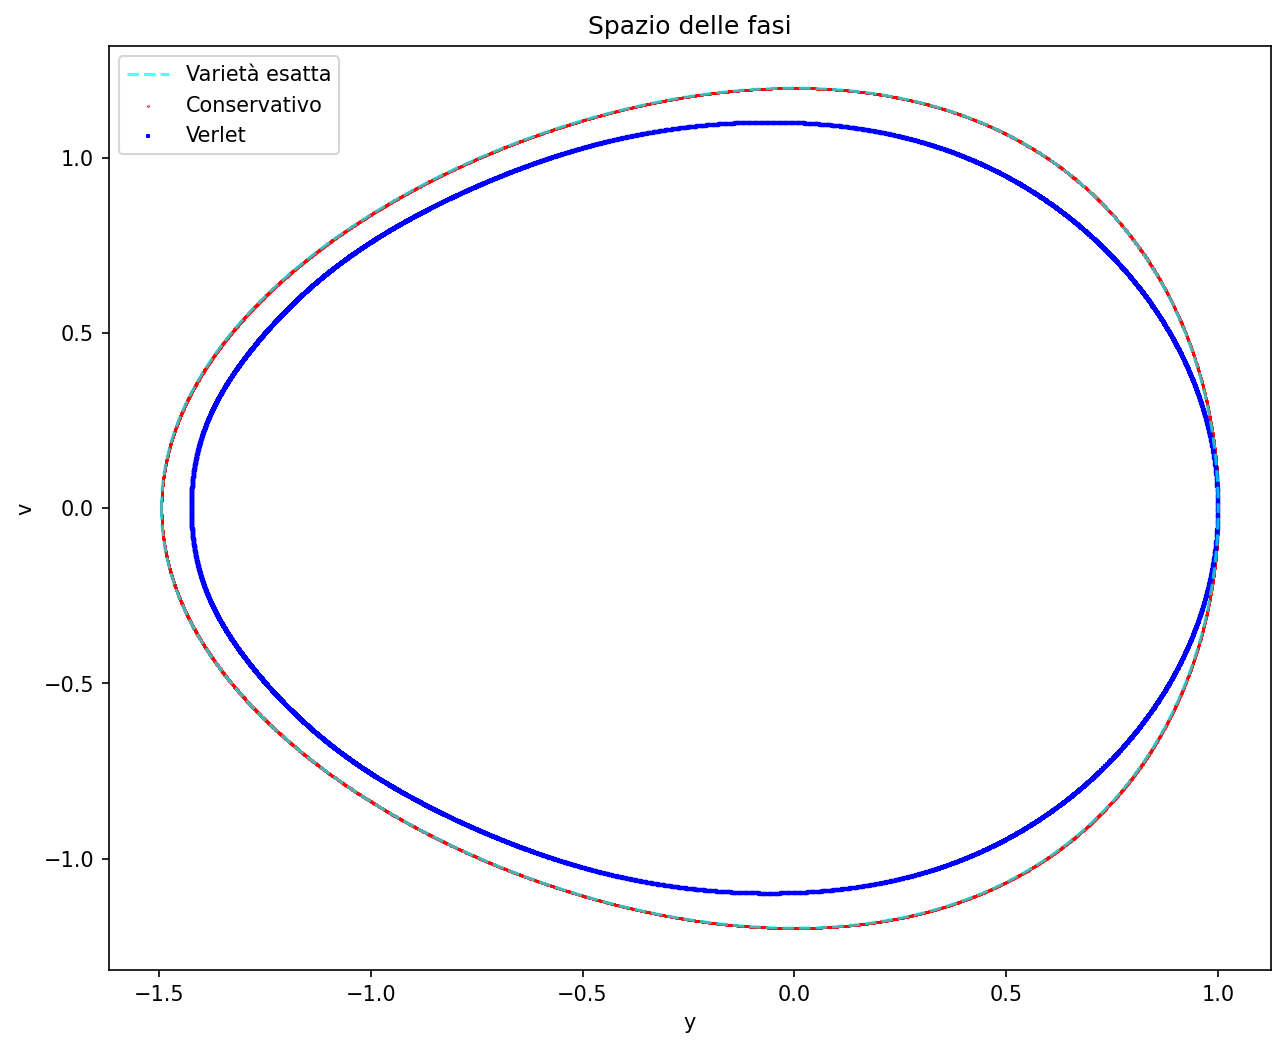

In [34]:
import cmath
from scipy.special import lambertw
y_n_c=y_0
v_n_c=v_0
y_n_v=y_0
v_n_v=v_0
y_c=np.empty(N)
v_c=np.empty(N)
y_v=np.empty(N)
v_v=np.empty(N)
y_vero=np.linspace(1-exp(1)-(complex(lambertw(-exp(1-exp(1))))).real, 1, N)
v_vero_sotto=np.empty(N)
v_vero_sopra=np.empty(N)
for k in range(N):
    y_c[k]=y_n_c
    v_c[k]=v_n_c
    y_v[k]=y_n_v
    v_v[k]=v_n_v
    y_n_c, v_n_c=Cons_ode_2(y_n_c, v_n_c, f, f_prime, Dt, m)
    y_n_v, v_n_v=Vel_Verl_2(y_n_v, v_n_v, a, Dt, m)
    v_vero_sopra[k]=sqrt(2./m*(exp(1)-1+y_vero[k]-exp(y_vero[k])))
    v_vero_sotto[k]=-sqrt(2./m*(exp(1)-1+y_vero[k]-exp(y_vero[k])))
plt.figure(figsize=(10,8), dpi=150)
plt.plot(y_vero, v_vero_sopra, c='cyan', linestyle='--', alpha=0.7, linewidth=1.5, label='Varietà esatta')
plt.plot(y_vero, v_vero_sotto, c='cyan', linestyle='--', alpha=0.7, linewidth=1.5)
plt.scatter(y_c, v_c, color='red', marker='o', s=0.1, label='Conservativo')
plt.scatter(y_v, v_v, c='blue', marker='s', s=1, label='Verlet')
plt.xlabel('y')
plt.ylabel('v')
plt.title('Spazio delle fasi')
plt.legend()
plt.show()

Dal diagramma dello spazio delle fasi si nota che la curva di Verlet non giace sulla varieta esatta, dove invece il metodo conservativo si ubica perfettamente, ma la sottostima.

In [35]:
del y_n_c, v_n_c, y_n_v, v_n_v, y_c, v_c, y_v, v_v, y_vero, v_vero_sotto, v_vero_sopra

Calcoliamo gli errori associti a questa sottostima tramite la distanza fra la varietà e le soluzioni numeriche:

In [36]:
y_n_c=y_0
v_n_c=v_0
y_n_v=y_0
v_n_v=v_0
err_c=np.empty(N)
err_v=np.empty(N)
t=np.empty(N)
for n in range(N):
    y_n_c, v_n_c=Cons_ode_2(y_n_c, v_n_c, f, f_prime, Dt, m)
    y_n_v, v_n_v=Vel_Verl_2(y_n_v, v_n_v, a, Dt, m)
    H_c=H_2(y_n_c, v_n_c, m)
    H_v=H_2(y_n_v, v_n_v, m)
    err_c[n]=abs(H_c/H_0-1)
    err_v[n]=abs(H_v/H_0-1)
    t[n]=t_i+(n+1)*Dt

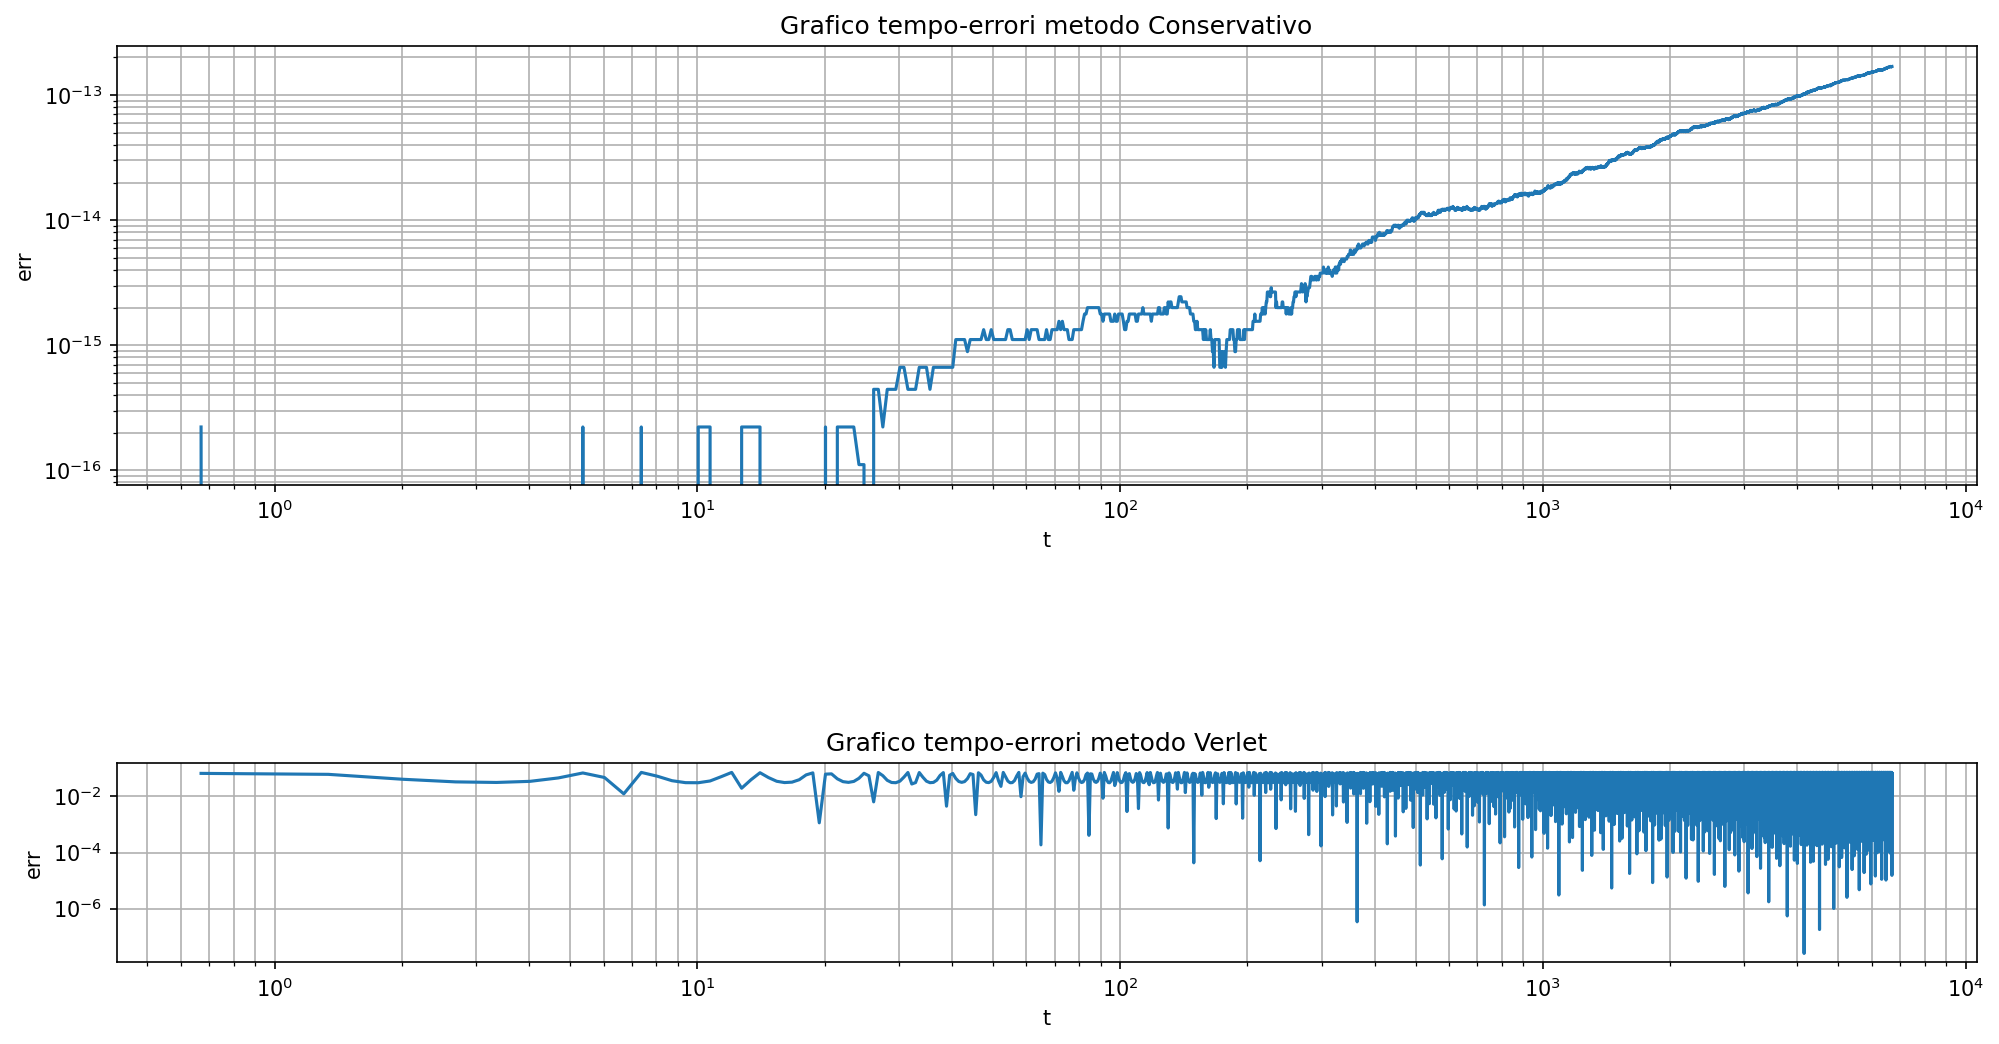

In [37]:
plt.figure(figsize=(16, 10), dpi=150)
gs=gridspec.GridSpec(5, 1)
ax0=plt.subplot(gs[:2, :])
ax1=plt.subplot(gs[3, :])
ax0.loglog(t, err_c)
ax1.loglog(t, err_v)
ax0.grid(which='both')
ax1.grid(which='both')

ax0.set_xlabel('t')
ax0.set_ylabel('err')
ax1.set_xlabel('t')
ax1.set_ylabel('err')

ax0.set_title('Grafico tempo-errori metodo Conservativo')
ax1.set_title('Grafico tempo-errori metodo Verlet')


plt.show()

Possiamo ora affermare che il metodo conservativo sempre errori di ordini di grandezza più bassi rispetto a quello di Verlet.

In [38]:
del y_n_c, v_n_c, y_n_v, v_n_v, err_c, err_v, t

Analizziamo adesso il massimo errore registrato nell'intervallo $0\leq t \leq 1000T$ per differenti valori dell'intervallino fondamentale $\Delta t$, confrontando i risultati ottenuti dal metodo conservativo ed il metodo di Verlet.

In [39]:
Npp_i = 10
Points_number = 10
Npp_set = [Npp_i*(2**n) for n in range(Points_number)] # Faccio un plot dell'errore massimo su E raddoppiando di 
MAXERRC_set = []                                       # volta in volta il numero di punti per periodo
MAXERRV_set = []
Time_steps2 = []

Period2 = 6.7
T_f = Period2*1e03
Cy = y_0
Cv = v_0
Vy, Vv = Cy, Cv
H0 = H_2(Cy, Cv, m)
for n in Npp_set:
    time_step2 = Period2/n
    Time_steps2.append(time_step2)
    Cy = 1.
    Cv = 0.
    Vy, Vv = Cy, Cv
    t = 0
    maxC = 0
    maxV = 0
    while t<T_f:
        t += time_step2
        Cy, Cv = Cons_ode_2(Cy, Cv, f, f_prime, time_step2, m)
        Vy, Vv = Vel_Verl_2(Vy, Vv, a, time_step2, m)
        errC = abs( H_2( Cy, Cv , m)/H0 - 1 )
        errV = abs( H_2( Vy, Vv, m)/H0 - 1 )
        if errC >= maxC:
            maxC = errC
        if errV >= maxV:
            maxV = errV
    MAXERRC_set.append( maxC )
    MAXERRV_set.append( maxV )

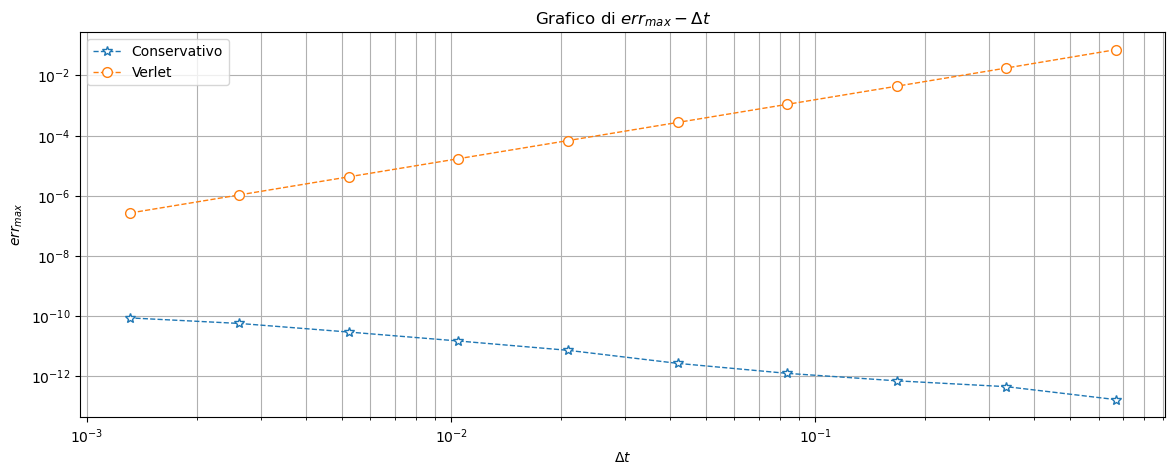

In [40]:
plt.figure(figsize=(14,5))
plt.loglog(Time_steps2, MAXERRC_set, marker='*', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Conservativo')
plt.loglog(Time_steps2, MAXERRV_set, marker='o', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Verlet')
plt.grid(which='both')
plt.ylabel('$err_{max}$')
plt.xlabel('$\Delta t$')
plt.title('Grafico di $err_{max}-\Delta t$')
plt.legend()
plt.show()

Anche in questo caso l'errore massimo del metodo di Verlet cresce per $\Delta t$ grandi molto di più del metodo conservativo.

In [41]:
del Npp_set, MAXERRC_set, MAXERRV_set, Time_steps2, T_f, Cy, Cv, Vy, Vv, H0

Ora analizziamo l'errore di fase:

In [42]:
N_max=50
N_P=np.empty(N_max)
Cont_T_c=np.empty(N_max)
Cont_T_v=np.empty(N_max)
T=Period2
y_0=1
v_0=0
for k in range(N_max):
    Dt=T/(6+k)
    N_P[k]=int(T/Dt)
    t_0=0
    cont_T_c=0
    cont_T_v=0
    y_n_v_1=y_0
    v_n_v_1=v_0
    y_n_c_2=y_0
    v_n_c_2=v_0
    while t_0<=100*T:
        y_n_c_old=y_n_c_2
        y_n_v_old=y_n_v_1
        v_n_c_old=v_n_c_2
        v_n_v_old=v_n_v_1
        y_n_c_2, v_n_c_2=Cons_ode_2(y_n_c_2, v_n_c_2, f, f_prime, Dt, m)
        y_n_v_1, v_n_v_1=Vel_Verl_2(y_n_v_1, v_n_v_1, a, Dt, m)
        if (v_n_c_2<v_0) and (v_n_c_old>v_0):
            cont_T_c+=1
        if (v_n_v_1<v_0) and (v_n_v_old>v_0):
            cont_T_v+=1
        t_0+=Dt
    Cont_T_c[k]=cont_T_c
    Cont_T_v[k]=cont_T_v

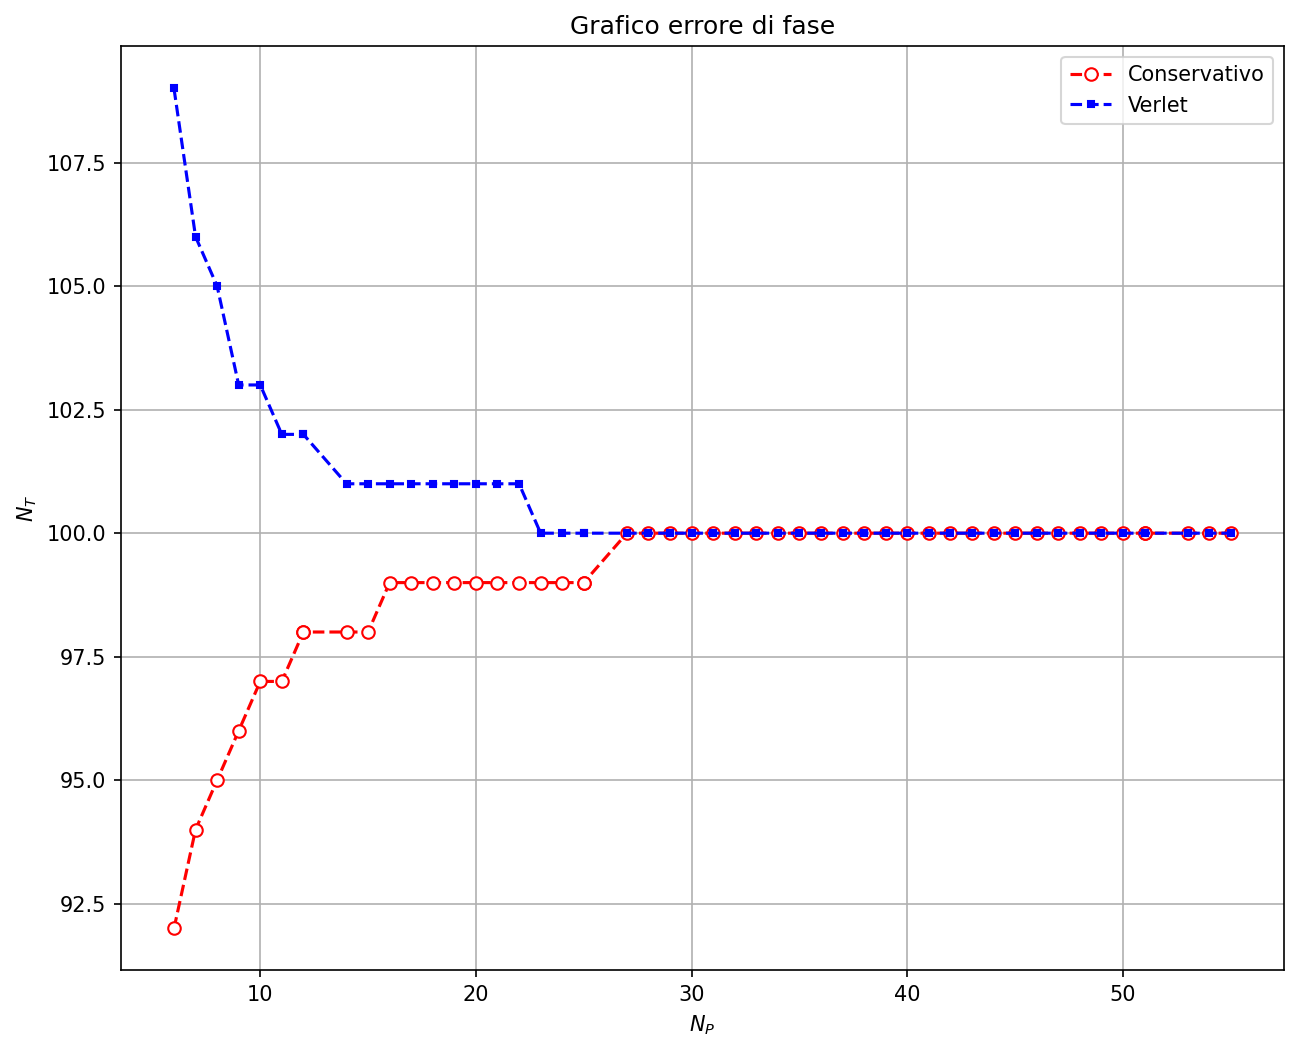

In [43]:
plt.figure(figsize=(10, 8), dpi=150)
plt.plot(N_P, Cont_T_c, marker='o', linestyle='--', color='red', markerfacecolor='white', label='Conservativo')
plt.plot(N_P, Cont_T_v, marker='s', linestyle='--', color='blue', markersize=3, label='Verlet')

plt.xlabel('$N_P$')
plt.ylabel('$N_T$')
plt.title('Grafico errore di fase')
plt.grid(which='both')
plt.legend()
plt.show()

Come prima vale che sia Verlet sia il metodo Conservativo raggiungono la soglia asintotica di $N_T=100$ ma molto più lentamente rispetto agli altri due sistemi. 

In [44]:
del N_max, N_P, Cont_T_c, Cont_T_v, T, Period2, y_0, v_0

# MOLTI CORPI

## Metodo di Newton a più variabili

In questa sezione del progetto si analizza il metodo conservativo introdotto nella sua estensione al caso di molte particelle. Da osservare subito è che il metodo non è esente da notevoli difficoltà di implementazione. Si esibirà a breve una condizione che il potenziale deve necessariamente soddisfare perché il metodo sia applicabile, il che già riduce il campo di applicabilità dell'algoritmo. Inoltre, si può immaginare che il problema implicito da risolvere, in generale non lineare, si trascini la difficoltà insita nei metodi numerici per risolvere sistemi di equazioni. Il metodo adottato qui è il metodo di Newton. L'idea alla base di questo metodo è la stessa del caso a una variabile e consiste nell'iterare un metodo di risoluzione dei sistemi lineari applicati al problema, linearizzato intorno alla soluzione finale. L'iterazione si conclude una volta soddisfatto un criterio opportuno. L'algoritmo consiste in sintesi dei seguenti passi

$$  \mathbf{ J }_f( \mathbf{ x }_n ) \cdot (\mathbf{ x }_{n+1} - \mathbf{x}_n ) = - \mathbf{f}( \mathbf{x}_n )   $$

Con $ \mathbf{ J }_f $ lo jacobiano (supposto non singolare) associato alla funzione $\mathbf{f}$. La soluzione di questo sistema linearizzato conduce a una valore $ \delta \mathbf{x}_n   $; al variare di n, la procedura si termina quando

$$ || \delta \mathbf{x}_n  ||  < \varepsilon  $$

dove $ \varepsilon $ è una tolleranza stabilità. Seppure in condizione opportune di regolatità della funzione il metodo converga al secondo ordine, nulla garantisce in generale la convergenza in casi più generali e molto dipende dalla scelta della condizione iniziale del metodo. Di seguito si procede con la trattazione generalissima del metodo, con l'impostazione e l'esibizione di alcuni casi.

## Impostazione del metodo ed esempi di applicazione

Si suppone di avere il problema iniziale della forma 
$$ \dot{ \mathbf{y}} = \mathbf{v}  $$
$$  \dot{\mathbf{v}} = \mathbf{F}(\mathbf{y}) $$
e dunque, come ovvio, si immagina che il sistema sia conservativo. L'hamiltoniana conservata sia poi data da 
$$ H(\mathbf{y}, \mathbf{v}) = 1/2 \cdot \mathbf{v} \cdot \mathbf{v} + V(\mathbf{y}) \qquad \mathbf{F} = - \nabla V$$
Si vuole trovare un metodo in cui al passo n-simo si calcolino le quantità
$$ \mathbf{y}_{n+1} = \mathbf{y}_n + 1/2 \cdot ( \mathbf{v}_{n+1} + \mathbf{v}_n ) \cdot \Delta t $$ 
$$ \mathbf{v}_{n+1} = \mathbf{v}_n + \tilde{\mathbf{F}}(\mathbf{y}_{n+1}, \mathbf{y}_n)\Delta t $$
Come nel caso di singola particella, richiediamo la conservatività del metodo. Allora 
$$ H_{n+1} - H_{n} \overset{!}{=} 0 $$
Da ciò si ricava 
$$ 1/2 \cdot (\mathbf{v}_{n+1}^2 - \mathbf{v}_n^2) + V_{n+1}-V_{n} = 0  $$

Usando 

$$ (\mathbf{v}_{n+1}^2 - \mathbf{v}_n^2) = (\mathbf{v}_{n+1} - \mathbf{v}_n)\cdot (\mathbf{v}_{n+1} + \mathbf{v}_n) =  \tilde{\mathbf{F}}(\mathbf{y}_{n+1}, \mathbf{y}_n)\Delta t  \cdot (\mathbf{v}_{n+1} + \mathbf{v}_n) $$ 
e richiedendo che il potenziale soddisfi la seguente condizione
$$ V_{n+1} - V_n = (\mathbf{y}_{n+1} - \mathbf{y}_n)\cdot \mathbf{Q}(\mathbf{y}_{n+1}, \mathbf{y}_n)  $$
con $ \mathbf{Q} $ un vettore opportuno. Allora si ricava, usando la condizione 
$$ \mathbf{y}_{n+1} = \mathbf{y}_n + 1/2 \cdot ( \mathbf{v}_{n+1} + \mathbf{v}_n ) \cdot \Delta t $$
che
$$ \tilde{\mathbf{F}} = - \mathbf{Q} $$
Il termine dato dalla fattorizzazione è spesso detto gradiente discreto e per esso vale per la continuità
$$ \mathbf{Q}(\mathbf{y}_n, \mathbf{y}_n) = \nabla V(\mathbf{y}_n) $$ 

Si procede ora illustrano alcuni esempi di questa scomposizione. Naturalmente, come prima, la scomposizione diventa essenziale per la soluzione del problema nella misura in cui è possibile anche risolvere il problema implicito insito nelle equazioni del metodo già ricavate. In particolare, si vuole risolvere

$$ \mathbf{0} = -\mathbf{v}_{n+1} + \mathbf{v}_n + \tilde{\mathbf{F}}(\mathbf{y}_n + 1/2 (\mathbf{v}_n + \mathbf{v}_{n+1})\Delta t, \mathbf{y}_n)\Delta t$$

nella velocità al passo successivo.

### Oscillatori lineari

Per il caso di oscillatori armonici accoppiati lineari, vale la seguente

$$ \mathbf{F} = -\mathbf{A}\mathbf{y} $$
con $\mathbf{A}$ una matrice costante. Allora per quanto detto prima si cerca una forma del potenziale 
$$ V = 1/2 \mathbf{y}^T\mathbf{A} \mathbf{y} $$
nella differenza finita
$$ V_{n+1}-V_n = 1/2 ( \mathbf{y}_{n+1}^T\mathbf{A} \mathbf{y}_{n+1} - \mathbf{y}_n^T\mathbf{A} \mathbf{y}_n  ) = $$
$$  = 1/2  (\mathbf{y}_{n+1}-\mathbf{y}_n)^T\mathbf{A}( \mathbf{y}_{n+1}+\mathbf{y}_n )$$
e quindi si può scrivere 
$$ \mathbf{Q} = 1/2 \mathbf{A}( \mathbf{y}_{n+1}+\mathbf{y}_n ) $$

### Forze conservative centrali e interazione di Van der Waals

Per forze centrali vale che $V=V(|| \mathbf{y} ||)$. Facendo l'ansatz che 
$$ \mathbf{Q} = \alpha \cdot ( \mathbf{y}_{n+1} + \mathbf{y}_n )  $$
allora vale che 
$$  \mathbf{Q} = \frac{V(|| \mathbf{y}_{n+1}||) - V( || \mathbf{y}_n || ) }{ || \mathbf{y}_{n+1} ||^2 - || \mathbf{y}_n||^2 }( \mathbf{y}_{n+1} + \mathbf{y}_n )  $$

Applichiamolo al caso dell'hamiltoniana semplificata per le interazioni tra atomi di idrogeno

$$ H = T + 1/2 \cdot \omega_0^2 \mathbf{y}^2 + \frac{e^2}{4\pi}\left( \frac{1}{R} + \frac{2}{R-y_1-y_2}- \frac{1}{R+y_1}-\frac{1}{R-y_2}  \right) $$
con R la separazione internucleare supposta un parametro e y_1, y_2 le variabili. Posto allora 
$$ \mathbf{y}_n = ( y_{1, n}, y_{2, n} ) $$
si vede che
$$ V_{n+1}-V_{n} = \frac{1}{2}\omega_0^2 ( \mathbf{y}_{n+1}^2 - \mathbf{y}_n^2 ) + \frac{e^2}{4\pi} \left( \frac{1}{R+y_{1, n+1}- y_{2,n+1}} + \frac{1}{R + y_{1, n+1}} - \frac{1}{R - y_{2, n+1}}  \right) + $$
$$ - \frac{e^2}{4\pi} \left(  \frac{1}{R+y_{1, n}- y_{2,n}} + \frac{1}{R + y_{1, n}} - \frac{1}{R - y_{2, n}} \right) $$

da cui si ricava 

$$ \tilde{\mathbf{F}} = -\omega_0^2(\mathbf{y}_{n+1}+\mathbf{y}_n)/2 - \frac{e^2}{4\pi}\mathbf{P} $$
dove $\mathbf{P}$ ha le componenti uguali a 
$$ P_1 = \frac{-1}{(R+y_{1, n+1}-y_{2, n+1})(R + y_{1, n} - y_{2, n})} + \frac{1}{(R + y_{1, n+1})(R + y_1,n)} $$ 
$$ P_2 = \frac{1}{(R+y_{1, n+1}-y_{2, n+1})(R + y_{1, n}-y_{2, n})} - \frac{1}{(R - y_{2, n+1})(R - y_2,n)} $$

### Henòn-Heiles

Il modello illustrato qui descrive il moto di una stella in una galassia. Le sue equazioni del moto sono date da 
$$ \dot{x} = u \quad \dot{y} = w $$
$$ \dot{u} = -ax-2xy \quad \dot{w} = -by-x^2+cy^2 $$
e il corrispondente potenziale è dato da 
$$ V = 1/2 \cdot (ax^2+by^2)+x^2y-1/3cy^3 $$
Per ritrovare la fattorizzazione, vediamo che

$$ V_{n+1} - V_n = 1/2 a ( x_{n+1}^2 - x_n^2 ) + 1/2 a ( y_{n+1}^2 - y_n^2 ) - 1/3 c (y_{n+1}^3 - y_n^3) + x_{n+1}^2 y_{n+1} - x_n^2 y_n =  $$
$$ 1/2 a ( x_{n+1} - x_n )( x_{n+1} + x_n ) + 1/2 a ( y_{n+1} - y_n )( y_{n+1} + y_n ) -   c ( y_{n+1} - y_n )(y_{n+1}^2 + y_n^2 + y_n y_{n+1})/3 +   (x_{n+1}^2y_{n+1} - x_n^2 y_n + x_n^2 y_{n+1}/2 - x_n^2 y_{n+1}/2 + x_{n+1}^2 y_n / 2 - x_{n+1}^2 y_n  ) $$
da cui se
$$ \mathbf{Q} = (Q_1, Q_2) $$
si ottiene
$$ Q_1 =  (a x_n + a x_{n+1} + x_n y_n + x_n y_{n+1} + x_{n+1}y_n+x_{n+1}y_{n+1})/2 $$
$$ Q_2 = ( b y_{n+1} + b y_n + x_n^2 + x_{n+1}^2)/2 - c/3 (y_{n+1}^2 + y_n y_{n+1} + y_n^2) $$


### Modello $\beta$ di Fermi-Pasta-Ulam

Un'altra applicazione utile di questo metodo proviene dal modello di oscillatori armonici non-lineari e accoppiati utilizzato in fisica della materia e in biofica per la descrizione di cristalli e denaturazione del DNA. L'idea è di sommare un termine quartico al potenziale di singolo oscillatore e di sommare i contributi. Il sistema complessivo ha un potenziale dato da 
$$ V = \sum_{\alpha=1}^{N+1} \frac{1}{2}k_1(y_{\alpha}-y_{\alpha-1})^2 + \frac{1}{4}k_2 (y_{\alpha}-y_{\alpha-1})^4 $$
dove si assume che $y_0 = y_{N+1} = 0$. La scomposizione di questo termine di potenziale segue passi analoghi ai casi precedenti. Il primo termine di potenziale quadratico si scompone facilmente in
$$ V_{1, n+1} - V_{1, n} = \frac{1}{2}k_1\sum_{\alpha}(y_{n+1, \alpha}-y_{n+1, \alpha-1})^2 - (y_{n, \alpha}-y_{n, \alpha-1})^2 =   $$
$$ = \frac{1}{2}k_1\sum_{\alpha} (y_{n+1, \alpha}-y_{n+1, \alpha-1} - y_{n, \alpha} + y_{n, \alpha-1})( y_{n+1, \alpha}-y_{n+1, \alpha-1} + y_{n, \alpha}-y_{n, \alpha-1}) = $$
$$ = \sum_{\beta} ( y_{n+1, \beta} - y_{n, \beta} ) \left[ \frac{1}{2}k_1\sum_{\alpha} ( \delta_{\alpha, \beta} - \delta_{\alpha-1, \beta} ) ( y_{n+1, \alpha}-y_{n+1, \alpha-1} + y_{n, \alpha}-y_{n, \alpha-1}) \right] $$

dove il termine tra parentesi quadre è il primo contributo a $\mathbf{Q}$ e si scrive in forma vettoriale
$$ \mathbf{Q}_1 = \frac{1}{2}k_1 \mathbf{A}(\mathbf{y}_n + \mathbf{y}_{n+1}) $$
dove la matrice $\mathbf{A}$ è costante, tridiagonale con elementi in diagonale 2 e fuori diagonale -1. L'altro termine si determina analogamente

$$ V_{2, n+1} - V_{2, n} = \frac{1}{4}k_2\sum_{\alpha}(y_{n+1, \alpha}-y_{n+1, \alpha-1})^4 - (y_{n, \alpha}-y_{n, \alpha-1})^4 $$
$$ = \frac{1}{4}k_2\sum_{\alpha}( (y_{n+1, \alpha}-y_{n+1, \alpha-1})^2 - (y_{n, \alpha}-y_{n, \alpha-1})^2 )( (y_{n+1, \alpha}-y_{n+1, \alpha-1})^2 + (y_{n, \alpha}-y_{n, \alpha-1})^2 ) =$$
$$ = \frac{1}{4}k_2\sum_{\alpha}( (y_{n+1, \alpha}-y_{n+1, \alpha-1}) - (y_{n, \alpha}-y_{n, \alpha-1}) )( (y_{n+1, \alpha}-y_{n+1, \alpha-1}) + (y_{n, \alpha}-y_{n, \alpha-1}) )( (y_{n+1, \alpha}-y_{n+1, \alpha-1})^2 + (y_{n, \alpha}-y_{n, \alpha-1})^2 )$$

da cui come prima scivendo 

$$ ( (y_{n+1, \alpha}-y_{n+1, \alpha-1}) - (y_{n, \alpha}-y_{n, \alpha-1}) ) = \sum_{\beta} (y_{n+1, \beta}-y_{n, \beta}) ( \delta_{\alpha, \beta} - \delta_{\alpha-1, \beta} ) $$ 
e raccogliendo a destra la somma in $\alpha$ si ottiene la forma di
$$ Q_{2, \beta} = \frac{1}{4}k_2( ( y_{\beta, n+1} + y_{\beta, n} )\cdot B_{\beta} + C_{\beta} )  $$
dove 

$$ B_{\beta} = 2 (y_{\beta, n+1}^2 + y_{\beta, n}^2) + 3 ( y_{\beta-1, n+1}^2 + y_{\beta-1, n}^2 + y_{\beta+1, n+1} + y_{\beta+1, n} ) $$

$$ C_{\beta} = -2 ( y_{\beta-1, n+1}^3 + y_{\beta-1, n}^3 + y_{\beta+1, n+1}^3 + y_{\beta+1, n+1} + (y_{\beta-1, n+1} + y_{\beta-1, n} + y_{\beta+1, n+1} + y_{\beta+1, n}) \cdot (y_{\beta, n+1}^2 + y_{\beta, n+1}^2 + y_{\beta, n}^2) ) $$

Ora abbiamo scelto di porre l'attenzione su una classe di problemi standard per testare il metodo conservativo su varietà periodiche centrali, dove quest'ultimo resta più stabile.

## 1) Due particelle identiche classiche accoppiate da un oscillatore armonico

La teoria dei sistemi dinamici afferma che lo studio dei sistemi non lineri deve partire necessariamente dai casi lineari che sono approssimazioni legittime di quelli non lineari nelle vicinanze degli equilibri del sistema.
$$$$
L'Hamiltoniana ha la seguente forma:
$$H=\frac{1}{2}m(\dot{x}_1^2+\dot{x}_2^2)+\frac{1}{2}m\omega^2(x_1-x_2)^2$$
Applichiamo il metodo conservativo e calcoliamo:
$$V_{n+1}-V_n=\frac{1}{2}m\omega^2\Big[x_{1,\,n+1}^2-2x_{1,\,n+1}x_{2,\, n+1}+x_{2,\, n+1}^2-x_{2,\, n}^2+2x_{1\, n}x_{2,\, n}-x_{1,\, n}^2\Big]$$
Scomponiamo:
$$V_{n+1}-V_n=\frac{1}{2}m\omega^2\Big[(x_{1,\,n+1}-x_{1,\, n})(x_{1,\,n+1}+x_{1,\, n})+(x_{2,\, n+1}-x_{2,\, n})(x_{2,\, n+1}+x_{2,\, n})-2x_{1,\,n+1}x_{2,\, n+1}+2x_{1\, n}x_{2,\, n}\Big]$$
Sommiamo e sottraiamo i seguenti termini:
$$V_{n+1}-V_n=\frac{1}{2}m\omega^2\Big[(x_{1,\,n+1}-x_{1,\, n})(x_{1,\,n+1}+x_{1,\, n})+(x_{2,\, n+1}-x_{2,\, n})(x_{2,\, n+1}+x_{2,\, n})-x_{1,\,n+1}x_{2,\, n+1}-x_{1,\,n+1}x_{2,\, n+1}+x_{1,\,n+1}x_{2,\, n}-x_{1,\,n+1}x_{2,\, n}+x_{2,\,n+1}x_{1,\, n}-x_{2,\,n+1}x_{1,\, n}+x_{1\, n}x_{2,\, n}+x_{1\, n}x_{2,\, n}\Big]$$
Raggruppando:
$$V_{n+1}-V_n=\frac{1}{2}m\omega^2\Big[(x_{1,\,n+1}-x_{1,\, n})(x_{1,\,n+1}+x_{1,\, n})+(x_{2,\, n+1}-x_{2,\, n})(x_{2,\, n+1}+x_{2,\, n})-x_{2,\, n+1}(x_{1,\,n+1}-x_{1\, n})-x_{1,\,n+1}(x_{2,\, n+1}-x_{2,\, n})-x_{1,\,n+1}(x_{2,\, n+1}-x_{2,\, n})-x_{2,\, n}(x_{1,\,n+1}-x_{1\, n})\Big]$$
Raggruppando ancora:
$$V_{n+1}-V_n=\frac{1}{2}m\omega^2\Big[(x_{1,\,n+1}-x_{1,\, n})(x_{1,\,n+1}+x_{1,\, n}-x_{2,\, n+1}-x_{2,\,n})+(x_{2,\, n+1}-x_{2,\, n})(x_{2,\, n+1}+x_{2,\, n}-x_{1,\,n+1}-x_{1,\,n})\Big]$$
Quindi il valore di $\mathbf{Q}$ è:
$$\mathbf{Q}=\frac{1}{2}m\omega^2(x_{1,\,n+1}+x_{1,\, n}-x_{2,\, n+1}-x_{2,\,n} \,,\, x_{2,\, n+1}+x_{2,\, n}-x_{1,\,n+1}-x_{1,\,n})$$
Ora il metodo conservativo può essere scritto, essendo $\mathbf{F}=-\mathbf{Q}$, come:
$$x_{1,\, n+1}=x_{1,\, n}+\frac{1}{2}(\dot{x}_{1,\, n+1}-\dot{x}_{1,\, n})\Delta t$$
$$$$
$$x_{2,\, n+1}=x_{2,\, n}+\frac{1}{2}(\dot{x}_{2,\, n+1}-\dot{x}_{2,\, n})\Delta t$$
$$\dot{x}_{1,\, n+1}=\dot{x}_{1,\, n}-\frac{1}{2}\omega^2(x_{1,\,n+1}+x_{1,\, n}-x_{2,\, n+1}-x_{2,\,n})\Delta t$$
$$$$
$$\dot{x}_{2,\, n+1}=\dot{x}_{2,\, n}-\frac{1}{2}\omega^2( x_{2,\, n+1}+x_{2,\, n}-x_{1,\,n+1}-x_{1,\,n})\Delta t$$

Dunque la funzione implicità nella velocità è una funzione vettoriale le cui componenti sono:
$$f_1(\dot{x}_{1,\, n+1},\, \dot{x}_{2,\, n+1})=-\dot{x}_{1,\, n+1}+\dot{x}_{1,\, n}-\omega^2(x_{1,\, n}-x_{2,\, n})\Delta t-\frac{1}{4}\omega^2(\dot{x}_{1,\, n+1}-\dot{x}_{2,\, n+1}+\dot{x}_{2,\, n}-\dot{x}_{1,\, n})\Delta t^2$$
$$$$
$$f_2(\dot{x}_{1,\, n+1},\, \dot{x}_{2,\, n+1})=-\dot{x}_{2,\, n+1}+\dot{x}_{2,\, n}-\omega^2(x_{2,\, n}-x_{1,\, n})\Delta t-\frac{1}{4}\omega^2(\dot{x}_{2,\, n+1}-\dot{x}_{1,\, n+1}+\dot{x}_{1,\, n}-\dot{x}_{2,\, n})\Delta t^2$$
La matrice Jacobiana $\displaystyle J_{ab}=\frac{\partial f_a}{\partial \dot{x}_{b,\, n+1}}$ ha le seguenti componenti:
$$J_{11}=\frac{\partial f_1}{\partial \dot{x}_{1,\, n+1}}=-1-\frac{1}{4}\omega^2\Delta t^2$$
$$$$
$$J_{12}=\frac{\partial f_1}{\partial \dot{x}_{2,\, n+1}}=+\frac{1}{4}\omega^2 \Delta t^2$$
$$$$
$$J_{21}=\frac{\partial f_2}{\partial \dot{x}_{1,\, n+1}}=+\frac{1}{4}\omega^2 \Delta t^2$$
$$$$
$$J_{22}=\frac{\partial f_2}{\partial \dot{x}_{2,\, n+1}}=-1-\frac{1}{4}\omega^2\Delta t^2$$
Ora sapendo la funzione e la Jacobiana associta si può calcolare la velocità nel passo successivo tramite il metodo di Newton.
$$$$
Passiamo quindi all'implementazione:

In [45]:
def norm(x):
    s = 0
    for n in range(len(x)):
        s += x[n]*x[n]
    return sqrt(s)

def norm2(x):
    s = 0
    for n in range(len(x)):
        s += x[n]*x[n]
    return s

def acc(X, omega):
    x_1 = X[0]
    x_2 = X[1]
    a_1 = -omega*omega*(x_1-x_2)
    a_2 = -omega*omega*(x_2-x_1)
    return np.array([a_1, a_2])

def V(X, m, omega):
    x_1 = X[0]
    x_2 = X[1]
    return 0.5*m*omega*omega*(x_1-x_2)*(x_1-x_2)

def Energy(X, Vel, m, omega):
    return 0.5 * m * norm2(Vel) + V(X, m, omega)


def Newton(func, Dfunc, x0, toll=1e-13, max_iteration=500):
    x_old=x0
    for i in range(max_iteration):
        f_x = func(x_old)
        J_x = Dfunc(x_old)
        delta_x = np.linalg.solve(J_x, -f_x)
        x_new = x_old + delta_x
        if norm(delta_x)<toll:
            return x_new
        x_old=x_new
    
    print('Maximum iteration number exceeded')
    print(norm(delta_x))
    return x

In [46]:
T_max = 1e04
dt = 0.1
m=1.
omega=1.

x_1_0 = -1.
x_2_0 = 1.
v_1_0 = 0.
v_2_0 = 0.

X_0 = np.array([x_1_0, x_2_0])
V_0 = np.array([v_1_0, v_2_0])

H_0 = Energy(X_0, V_0, m, omega)

X_old = X_0
V_old = V_0


time = 0
X_1 = []
V_1 = []
X_2 = []
TIMES = []
ERR_ENERGIES = []

while time < T_max:
    time += dt
    TIMES.append(time)
    def system(V, V_old, X_old, dt, m, omega):
        sys_1 =- V[0] + V_old[0] - 0.5 * omega * omega * dt * ( 2 * X_old[0] + 0.5 * dt * ( V_old[0] + V[0]) - 2 * X_old[1] - 0.5 * dt * ( V_old[1] + V[1]))
        sys_2 =- V[1] + V_old[1] - 0.5 * omega * omega * dt * ( 2 * X_old[1] + 0.5 * dt * ( V_old[1] + V[1]) - 2 * X_old[0] - 0.5 * dt * ( V_old[0] + V[0]))
        return np.array([sys_1, sys_2])
    def J(dt, omega):
        J11 = - 1
        J12 = + 1
        J21 = + 1
        J22 = - 1
        return - np.identity(2) + np.array([ [J11, J12], [J21, J22] ])* 0.25 * omega * omega * dt * dt
    SYS= lambda V: system(V, V_old, X_old, dt, m, omega)
    JAC= lambda V: J(dt, omega)
    V_new = Newton(SYS, JAC, V_old + acc(X_old, omega) * dt)
    X_new = X_old + dt * ( V_old + V_new ) * 0.5
    X_1.append( X_new[0] )
    X_2.append( X_new[1] )
    V_1.append( V_new[0] )
    H = Energy(X_new, V_new, m, omega)
    E_err = abs(H/H_0-1) 
    ERR_ENERGIES.append(E_err)
    
    X_old = X_new
    V_old = V_new




Mostriamo il diagramma di fase (sezione di Poincaré) delle coordiante cinematiche della prima particella:

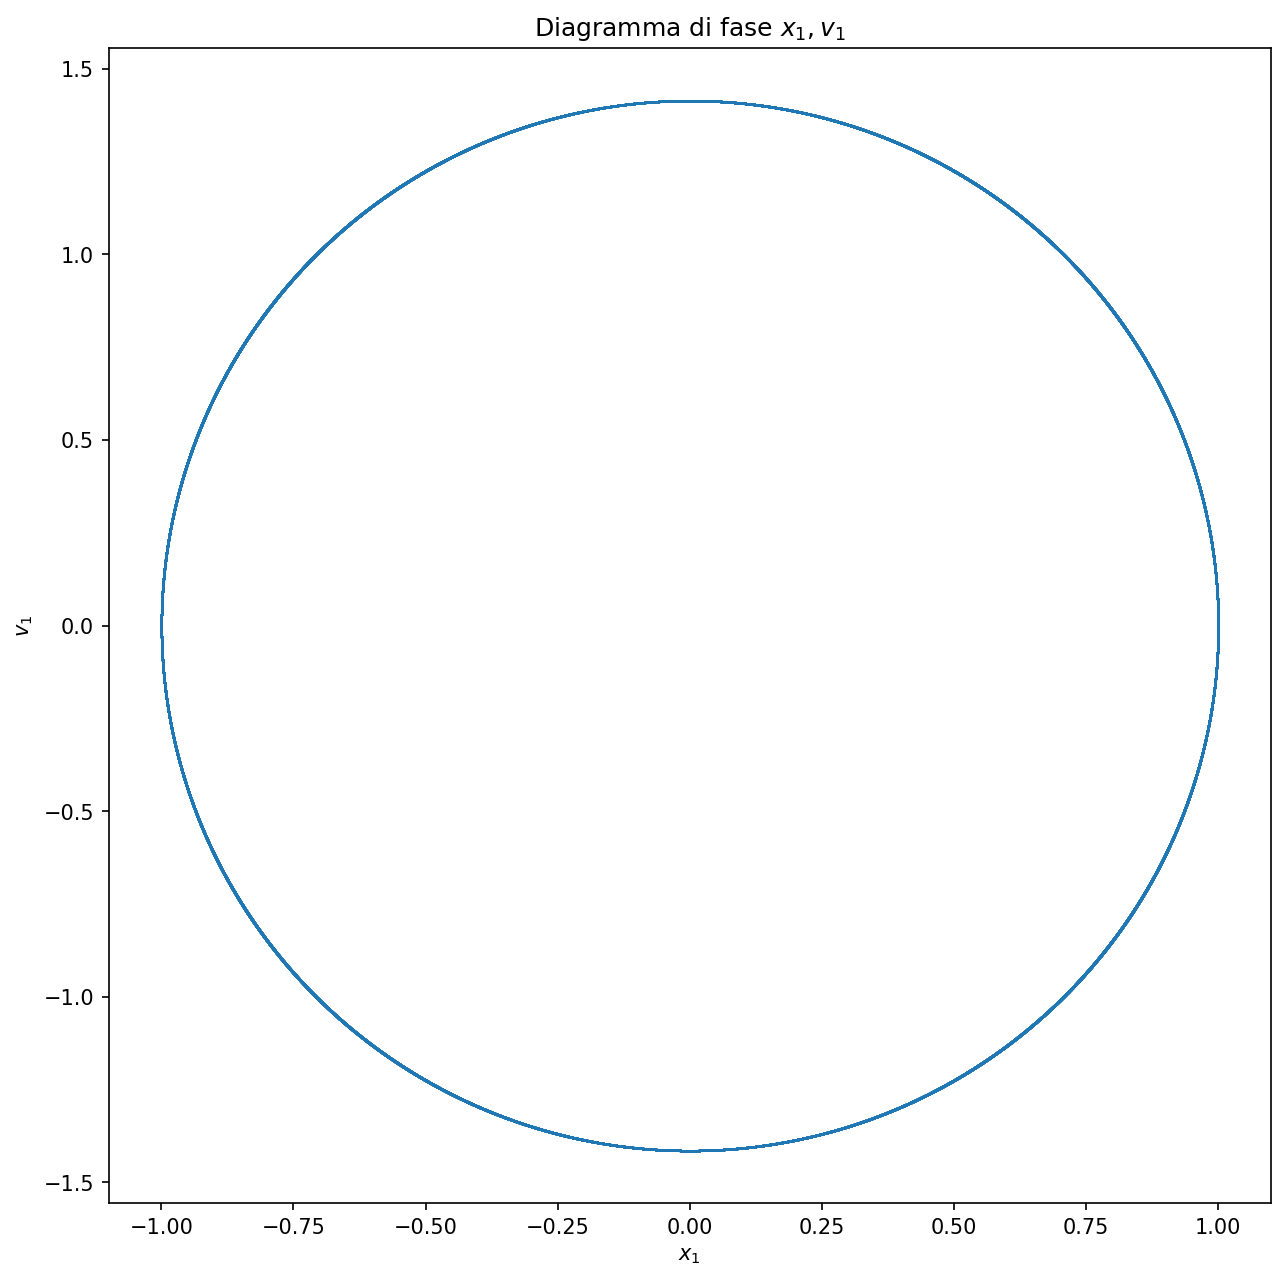

In [47]:
plt.figure(figsize=(10, 10), dpi=150)
plt.scatter( X_1, V_1, s = 0.01)
plt.title(r'Diagramma di fase $x_1, v_1$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$v_1$')
plt.show()

Tracciamo la legge oraria associata alla posizione:

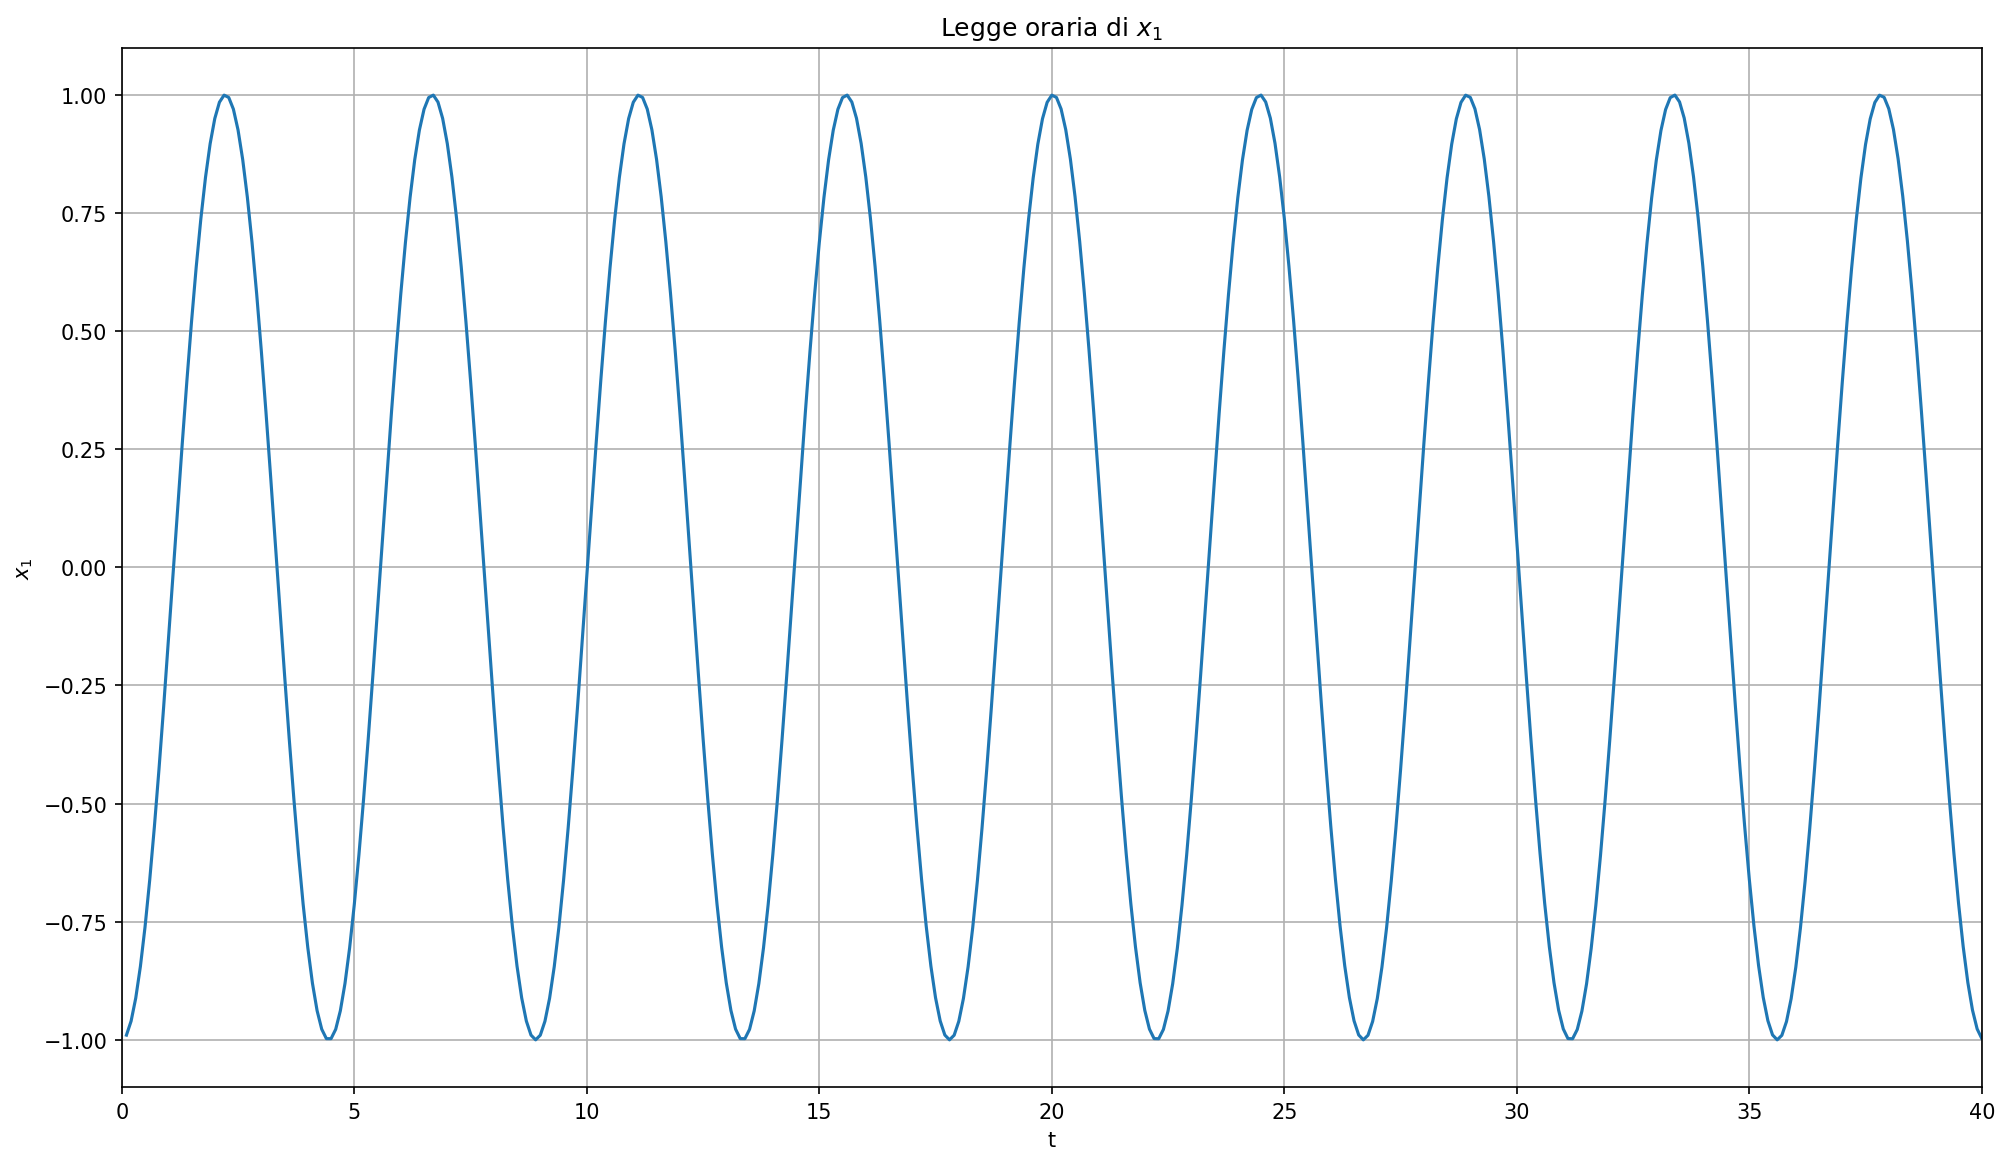

In [48]:
plt.figure(figsize=(16, 9), dpi=150)
plt.plot(TIMES, X_1 )
plt.title(r'Legge oraria di $x_1$')
plt.xlabel('t')
plt.ylabel(r'$x_1$')
plt.xlim(0, 40)
plt.grid(which='both')
plt.show()

Mostriamo la sezione di Poincaré delle coordinate delle due particelle:

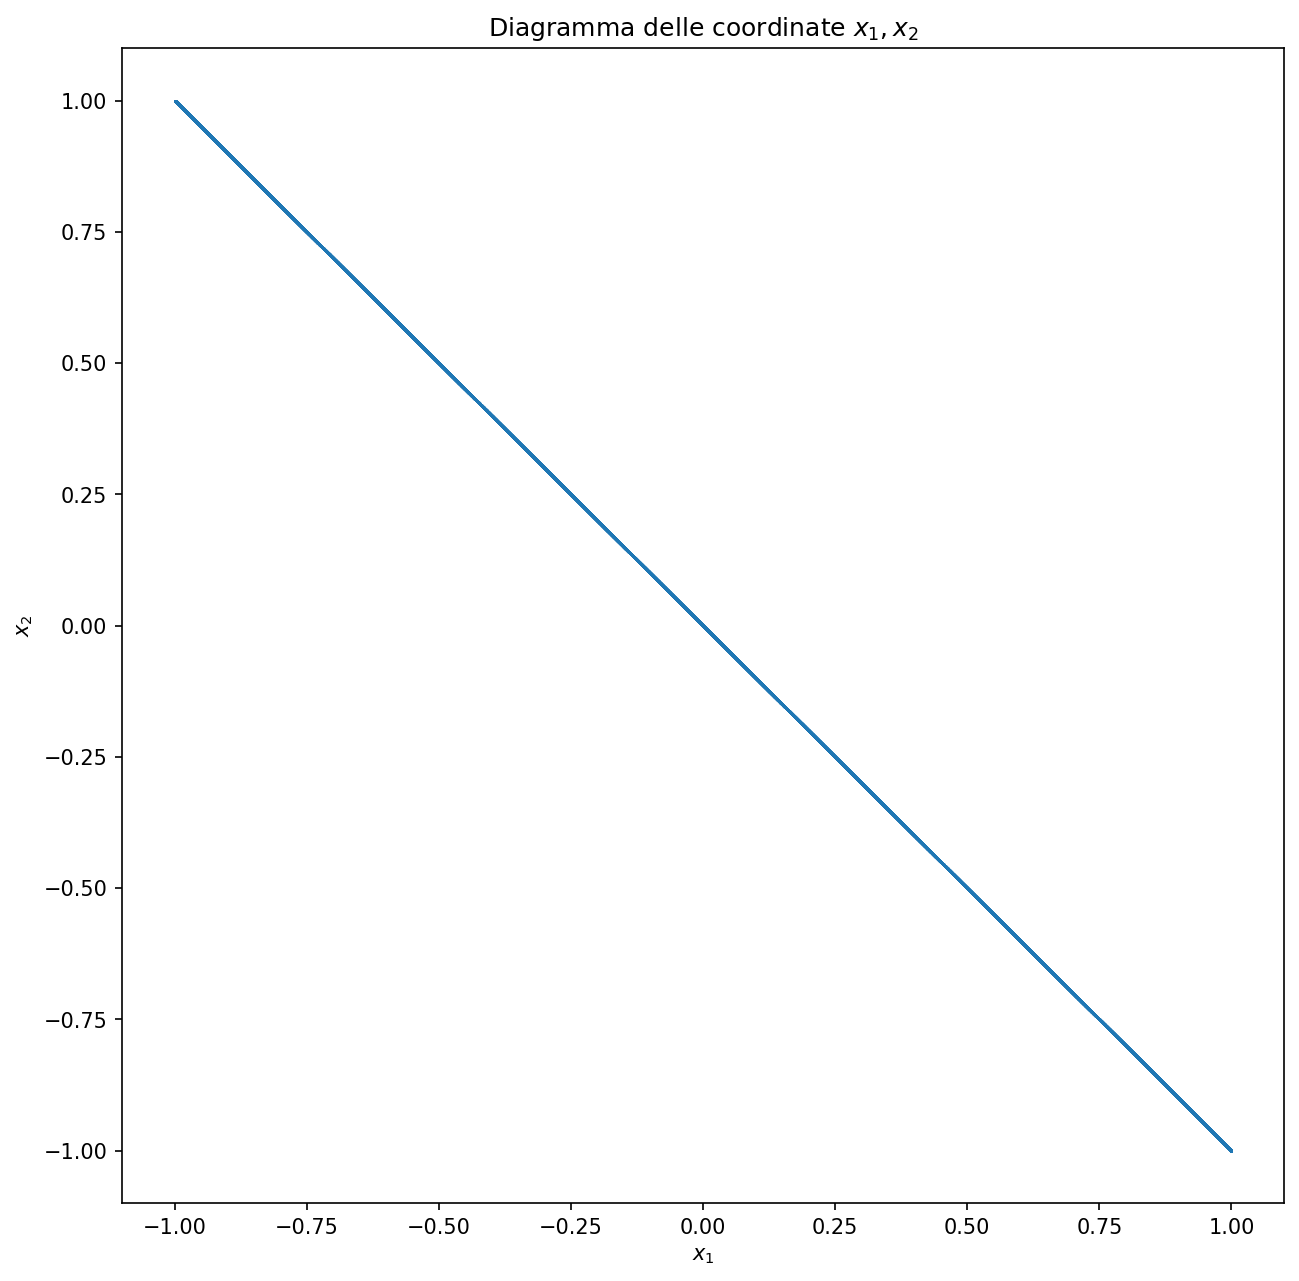

In [49]:
plt.figure(figsize=(10, 10), dpi=150)
plt.scatter( X_1, X_2 , s=0.01)
plt.title(r'Diagramma delle coordinate $ x_1, x_2 $')
plt.xlabel(r'$ x_1 $')
plt.ylabel(r'$ x_2 $')
plt.show()

L'errore sull'energia $\displaystyle err=\Big \rvert \frac{H}{H_0}-1 \Big \lvert$ al variare del tempo è graficato di seguito:

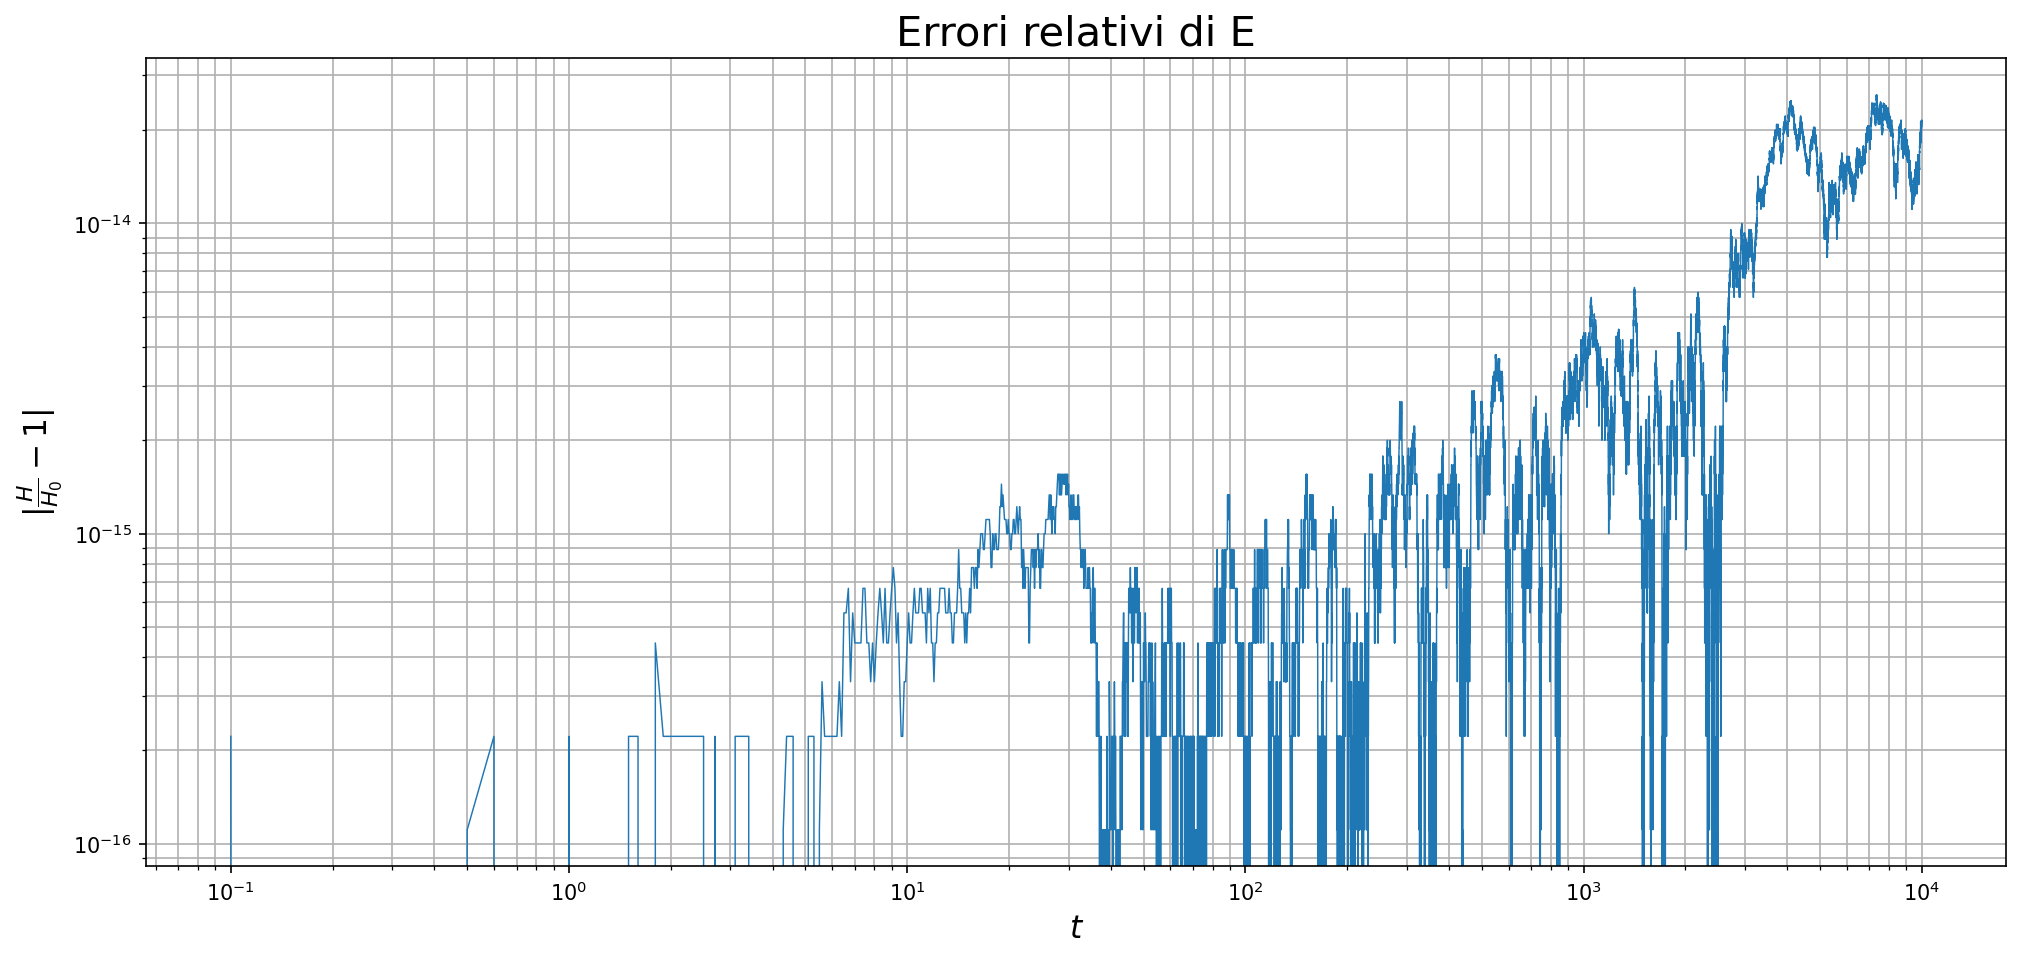

In [50]:
plt.figure(figsize=(16, 7), dpi=150)
plt.loglog(TIMES, ERR_ENERGIES , linewidth=0.7 )
plt.grid(which='both')
plt.title('Errori relativi di E', fontsize=20)
plt.xlabel(u'$ t $', fontsize=15)
plt.ylabel(r'$ | \frac{H}{H_0}-1 | $', fontsize=15)
plt.show()

Gli errori registrati sono sempre minori di $err < 10^{-13}$ in un tempo pari a $0 \leq t \leq 1000$.

Compariamo adesso gli errori massimi registrati al variare di $\Delta t$ fra il metodo conservativo ed il metodo di Velocity-Verlet:

In [51]:
T_max = 1e03
Points_numb = 7
dt_set = [ 0.8 / 2.**n for n in range(Points_numb) ]
m=1.
omega=1.

x_1_0 = -1.
x_2_0 = 1.
v_1_0 = 0.
v_2_0 = 0.

X_0 = np.array([x_1_0, x_2_0])
V_0 = np.array([v_1_0, v_2_0])

H_0 = Energy(X_0, V_0, m, omega)

Xv_old = X_0
Vv_old = V_0

MAX_ERR_ENERGIES = []
MAX_ERR_ENERGIES_v = []

for dt in dt_set:
    time = 0
    X_old = X_0
    V_old = V_0
    Xv_old = X_0
    Vv_old = V_0
    max_err = 0
    max_err_v = 0
    while time < T_max:
        time += dt
        TIMES.append(time)
        def system(V, V_old, X_old, dt, m, omega):
            sys_1 =- V[0] + V_old[0] - 0.5 * omega * omega * dt * ( 2 * X_old[0] + 0.5 * dt * ( V_old[0] + V[0]) - 2 * X_old[1] - 0.5 * dt * ( V_old[1] + V[1]))
            sys_2 =- V[1] + V_old[1] - 0.5 * omega * omega * dt * ( 2 * X_old[1] + 0.5 * dt * ( V_old[1] + V[1]) - 2 * X_old[0] - 0.5 * dt * ( V_old[0] + V[0]))
            return np.array([sys_1, sys_2])
        def J(dt, omega):
            J11 = - 1
            J12 = + 1
            J21 = + 1
            J22 = - 1
            return - np.identity(2) + np.array([ [J11, J12], [J21, J22] ])* 0.25 * omega * omega * dt * dt
        SYS= lambda V: system(V, V_old, X_old, dt, m, omega)
        JAC= lambda V: J(dt, omega)
        V_new = Newton(SYS, JAC, V_old + acc(X_old, omega) * dt)
        X_new = X_old + dt * ( V_old + V_new ) * 0.5
        H = Energy(X_new, V_new, m, omega)
        E_err = abs(H/H_0-1) 
        if E_err >= max_err:
            max_err = E_err
        X_old = X_new
        V_old = V_new
        
        Xv_new = Xv_old + Vv_old * dt + 0.5 * dt * dt * acc(Xv_old, omega)
        Vv_new = Vv_old + 0.5 * ( acc( Xv_old, omega ) + acc( Xv_new, omega ) ) * dt
        Hv = Energy(Xv_new, Vv_new, m, omega) 
        Ev_err = abs(Hv/H_0 - 1)
        
        if Ev_err >= max_err_v:
            max_err_v = Ev_err
    
    MAX_ERR_ENERGIES_v.append(max_err_v)
        
    MAX_ERR_ENERGIES.append(max_err)

        

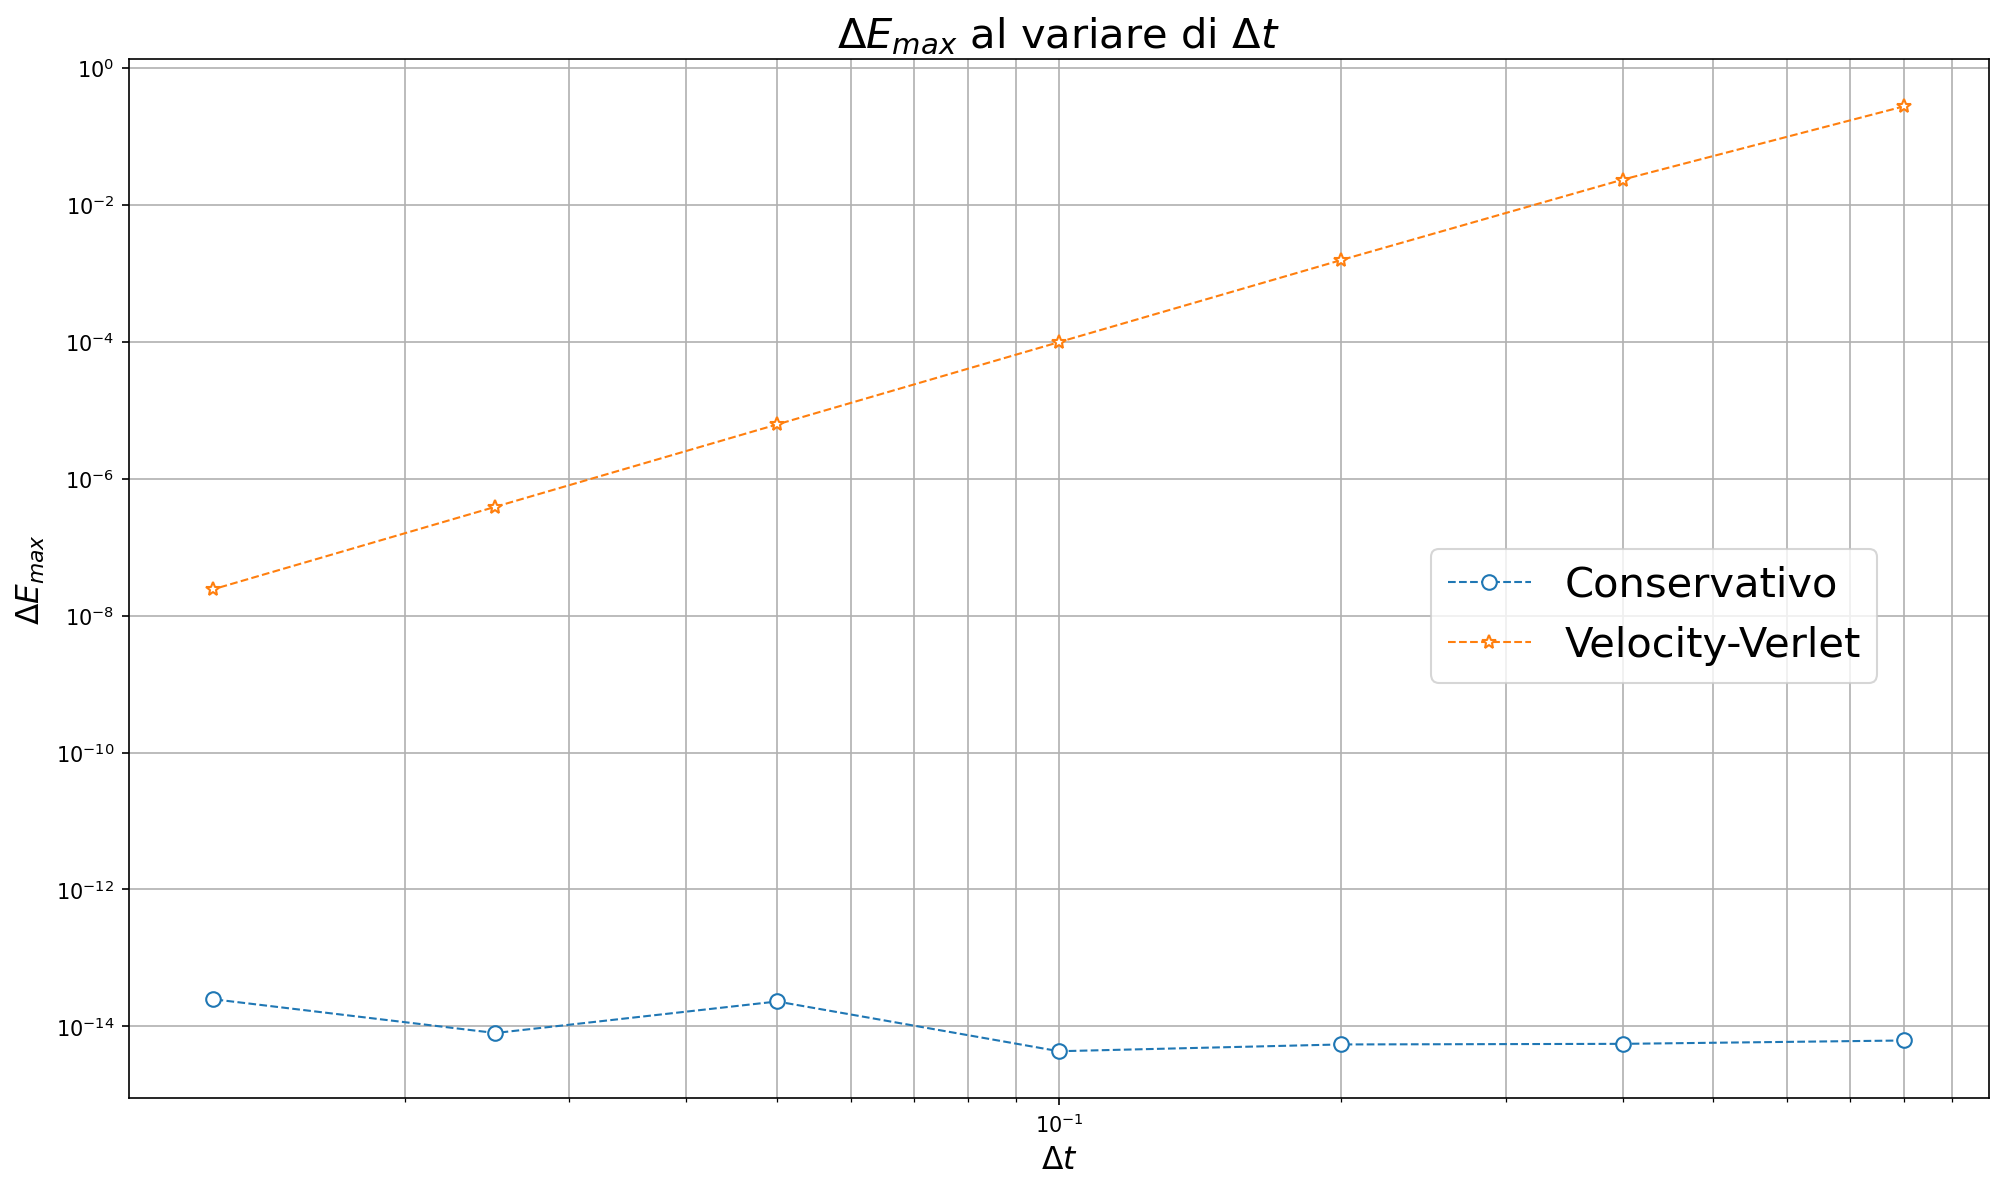

In [52]:
plt.figure( figsize=(16,9), dpi=150 )
plt.loglog( dt_set, MAX_ERR_ENERGIES, marker='o', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Conservativo' )
plt.loglog( dt_set, MAX_ERR_ENERGIES_v, marker='*', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Velocity-Verlet' )
plt.title(u'$\Delta E_{max}$ al variare di $\Delta t$', fontsize=20)
plt.xlabel(u'$\Delta t$', fontsize=15)
plt.ylabel(u'$ \Delta E_{max} $', fontsize=15)
plt.grid(which='both')
plt.legend(loc=(0.7, 0.4), fontsize=20)
plt.show(  )

Anche in questo caso il metodo conservativo è migliore di quello di Verlet.

In [53]:
del T_max, dt, m, omega, x_1_0, x_2_0, v_1_0, v_2_0, X_0, V_0, H_0, X_old, V_old, time, X_1, V_1, X_2, TIMES, ERR_ENERGIES
del Points_numb, dt_set, Xv_old, Vv_old, MAX_ERR_ENERGIES, MAX_ERR_ENERGIES_v

## 2) Sistema di Henon-Heiles per il moto stellare nelle galassie

Riprendendo il sistema di Henon-Heiles, si può mostrare con banali conti algebrici, che gli equilibri del sistema (con parametri $a=b=c=1$), sono quattro: $(0,\, 0,\, 0,\, 0)$ , $(0,\, 1,\, 0,\, 0)$ , $\left(\frac{\sqrt{3}}{2},\, -\frac{1}{2},\, 0,\, 0\right)$ e $\left(-\frac{\sqrt{3}}{2},\, -\frac{1}{2},\, 0,\, 0\right)$.
$$$$
Ora con il teorema di Hartman-Grobman si possono studiare gli equilibri e trovare che: gli ultimi tre punti sono iperbolici instabili (i punti lagrangiano del sistema sono instabili), mentre l'origine non può essere classificata pertanto è un buon candidato per essere una varietà centrale.
$$$$
Abbiamo quindi incentrato le nostre analisi nell'intorno dell'origine dove supponiamo esserci una orbita chiusa.
$$$$
Passiamo all'implementazione:

In [54]:
def acc(r):
    x = r[0]
    y = r[1]
    acc1 = - a * x - 2 * x * y
    acc2 = - b * y - x * x + c * y * y
    return np.array([acc1, acc2])

def V(Y, a, b, c):
    x = Y[0]
    y = Y[1]
    return 0.5 * ( a * x * x + b * y * y ) + x * x * y - 1. / 3. * c * y * y * y

def H(v, Y, a, b, c):
    E=0.5*norm2(v)+V(Y, a, b, c)
    return E

def Newton(func, Dfunc, x0, toll=1e-14, max_iteration=500):
    x_old=x0
    for i in range(max_iteration):
        f_x = func(x_old)
        J_x = Dfunc(x_old)
        delta_x = np.linalg.solve(J_x, -f_x)
        x_new = x_old + delta_x
        if norm(delta_x)<toll:
            return x_new
        x_old=x_new
    
    print('Maximum iteration number exceeded')
    print(norm(delta_x))
    return x_new

Per iniziare mettiamo condizioni iniziali molto vicine all'equilibrio del sistema:

In [55]:
T_max = 1e04
dt = 0.01
a = 1.
b = 1.
c = 1.

#x0 = 0.000 Condizioni Caotiche!
#y0 = 0.670
#u0 = 0.093
#w0 = 0.000

x0 = 0.001
y0 = -0.001
u0 = 0.000
w0 = 0.000

r0 = np.array([x0, y0])
v0 = np.array([u0, w0])
H0 = H(v0, r0, a, b, c)
r_old = r0
v_old = v0

def Y_NEW(v, v_old, r_old, dt):
    return r_old + 0.5 * dt * ( v_old + v)


def system(v, v_old, r_old, dt, a, b, c):
    def F(Y_old, Y_new, a, b, c):
        x_old, y_old = Y_old[0], Y_old[1]
        x_new, y_new = Y_new[0], Y_new[1]
        F1 = - 0.5 * ( a * ( x_new + x_old ) + x_old * y_old + x_old * y_new + x_new * y_old + x_new * y_new)
        F2 = - 0.5 * ( x_old*x_old + x_new*x_new + b * y_new + b * y_old ) - 1. / 3. * c * ( y_new*y_new + y_new * y_old + y_old*y_old )
        return np.array([F1, F2])
    return - v + v_old + dt * F(r_old, Y_NEW(v, v_old, r_old, dt), a, b, c)

def J(v, r_old, v_old, a, b, c, dt):
    J11 = - 0.5 * ( a + r_old[1] + Y_NEW(v, v_old, r_old, dt)[1] )
    J12 = - 0.5 * ( r_old[0] + Y_NEW(v, v_old, r_old, dt)[0] )
    J21 = - Y_NEW(v, v_old, r_old, dt)[0]
    J22 = - 0.5 * b - 1. / 3. * c * ( Y_NEW(v, v_old, r_old, dt)[1] + 2. * r_old[1])
    return - np.identity(2) + np.array([ [J11, J12], [J21, J22] ])*dt*dt * 0.5


time = 0
Y = []
Y_dot = []
X = []
X_dot = []
TIMES = []
err= []

while time < T_max:
    time += dt
    TIMES.append(time)
    SYS= lambda V: system(V, v_old, r_old, dt, a, b, c)
    JAC= lambda V: J(V, r_old, v_old, a, b, c, dt)
    v_new = Newton(SYS, JAC, v_old + acc(r_old) * dt)
    r_new = r_old + dt * ( v_old + v_new ) * 0.5
    ERR = abs(H(v_new, r_new, a, b, c)/H0 - 1)
    err.append(ERR)
    Y.append( r_new[1] )
    Y_dot.append( v_new[1] )
    X.append(r_new[0])
    X_dot.append(v_new[0])
    r_old = r_new
    v_old = v_new

Disegnamo le varie sezioni di Poincaré per $\dot{y}-y$, $\dot{x}-x$ e $y-x$:

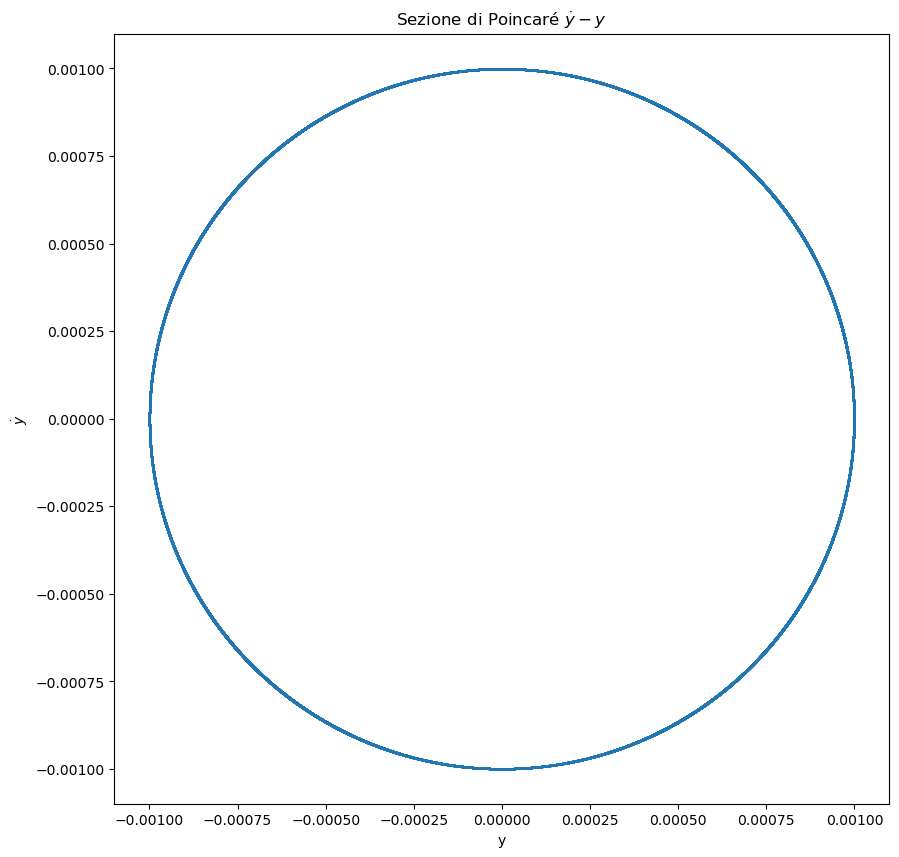

In [56]:
plt.figure(figsize=(10, 10))
plt.scatter( Y, Y_dot, s=0.01)
plt.xlabel('y')
plt.ylabel('$\dot{y}$')
plt.title('Sezione di Poincaré $\dot{y}-y$')
plt.show()

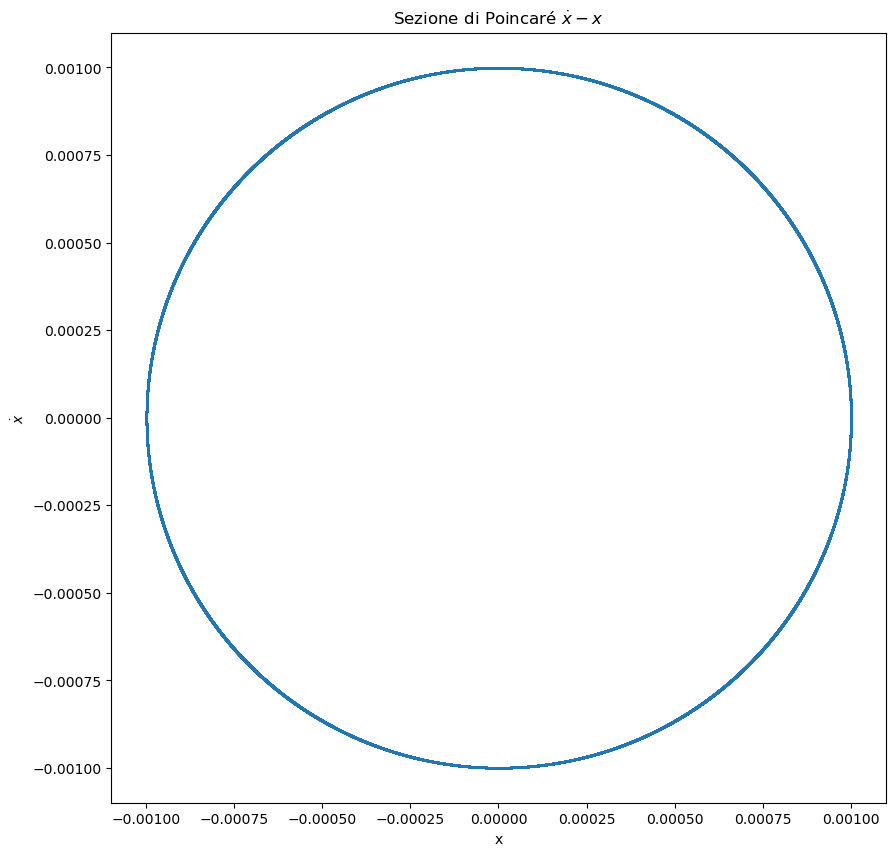

In [57]:
plt.figure(figsize=(10, 10))
plt.scatter( X, X_dot, s=0.01)
plt.xlabel('x')
plt.ylabel('$\dot{x}$')
plt.title('Sezione di Poincaré $\dot{x}-x$')
plt.show()

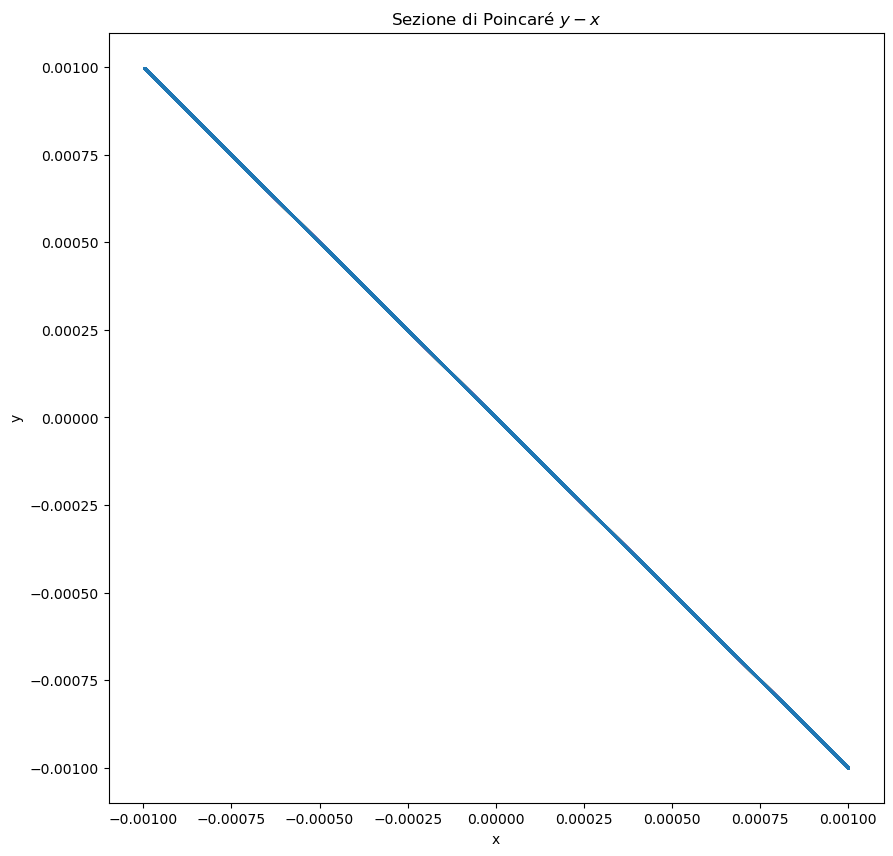

In [58]:
plt.figure(figsize=(10, 10))
plt.scatter( X, Y , s=0.01)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sezione di Poincaré $y-x$')
plt.show()

Da questi grafici possiamo vedere che la varietà del sistema non lineare, nell'intorno dell'equilibrio, resta un centro stabile di forma simile al caso lineare dell'oscillatore armonico.
$$$$
Di seguito mostriamo anche la legge oraria di una delle posizioni:

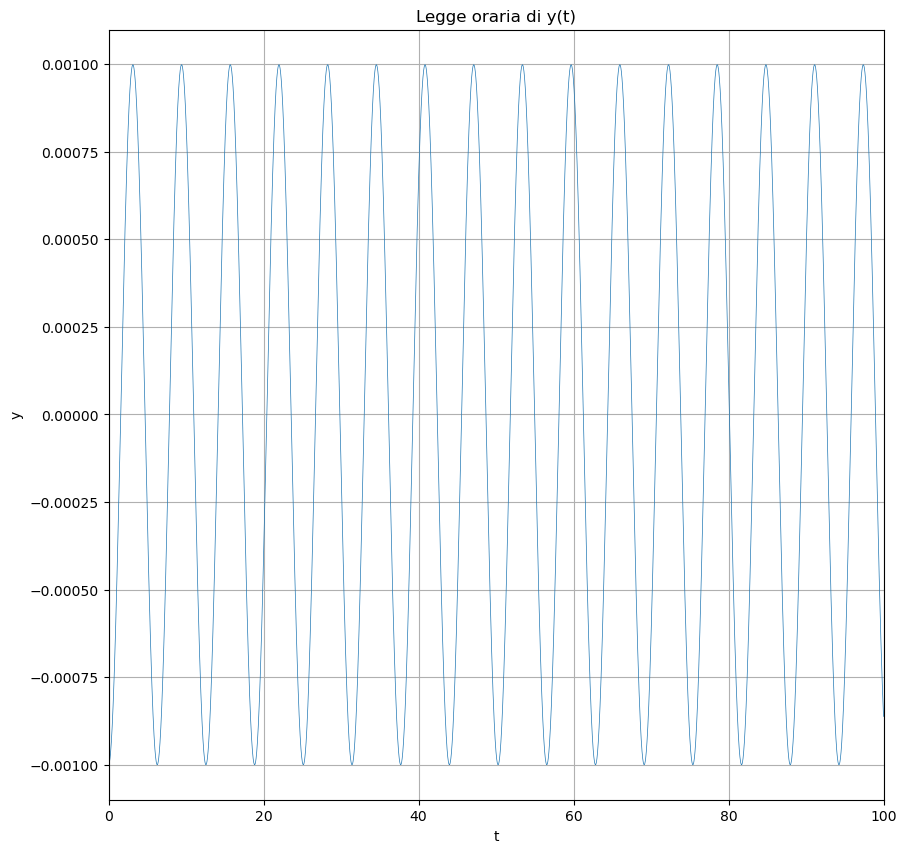

In [59]:
plt.figure(figsize=(10, 10))
plt.plot( TIMES, Y, linewidth=0.5)
plt.xlim(0,100)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Legge oraria di y(t)')
plt.grid(which='both')
plt.show()

Analizziamo gli errori di discostamento dall'energia dovuti al metodo conservativo:

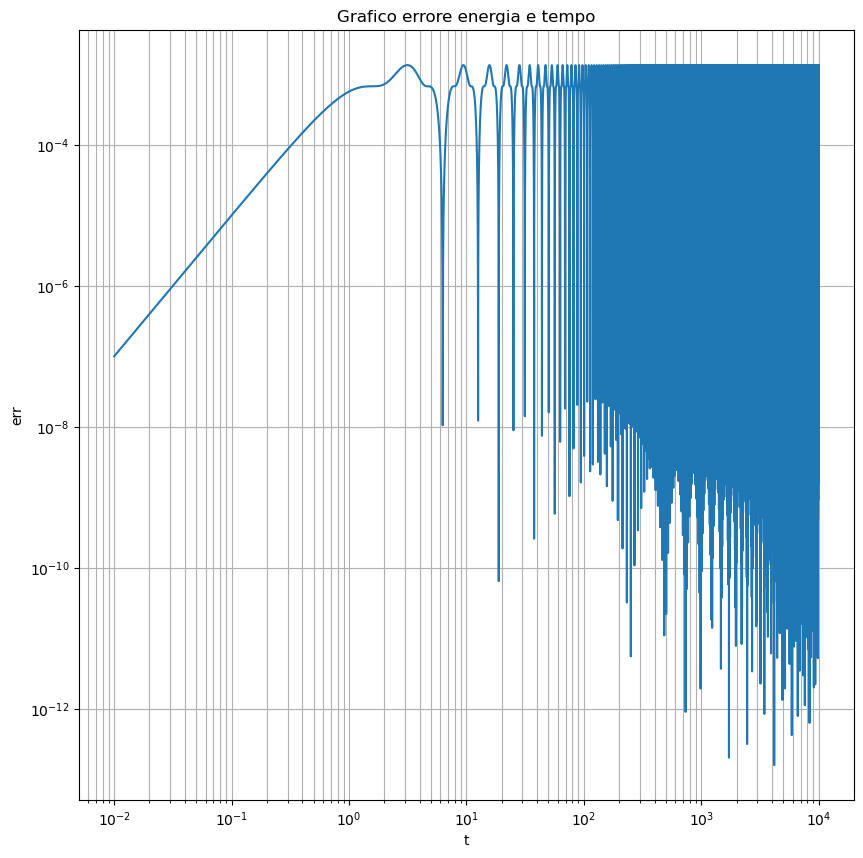

In [60]:
plt.figure(figsize=(10, 10))
plt.loglog( TIMES, err)
plt.xlabel('t')
plt.ylabel('err')
plt.title('Grafico errore energia e tempo')
plt.grid(which='both')
plt.show()

Gli errori in questo caso sono aumentati, rispetto agli altri casi, ma restano sempre al di sotto di $err < 10^{-3}$. 

Ora allontaniamoci dall'equilibrio, stando attenti a non sbordare nelle regioni instabili, in modo da marcare la non linerarità del sistema:

In [61]:
T_max = 1e03
dt = 0.01
a = 1.
b = 1.
c = 1.

#x0 = 0.000 Condizioni Caotiche!
#y0 = 0.670
#u0 = 0.093
#w0 = 0.000

x0 = 0.500
y0 = -0.450
u0 = 0.000
w0 = 0.000

r0 = np.array([x0, y0])
v0 = np.array([u0, w0])
H0 = H(v0, r0, a, b, c)
r_old = r0
v_old = v0

def Y_NEW(v, v_old, r_old, dt):
    return r_old + 0.5 * dt * ( v_old + v)


def system(v, v_old, r_old, dt, a, b, c):
    def F(Y_old, Y_new, a, b, c):
        x_old, y_old = Y_old[0], Y_old[1]
        x_new, y_new = Y_new[0], Y_new[1]
        F1 = - 0.5 * ( a * ( x_new + x_old ) + x_old * y_old + x_old * y_new + x_new * y_old + x_new * y_new)
        F2 = - 0.5 * ( x_old*x_old + x_new*x_new + b * y_new + b * y_old ) - 1. / 3. * c * ( y_new*y_new + y_new * y_old + y_old*y_old )
        return np.array([F1, F2])
    return - v + v_old + dt * F(r_old, Y_NEW(v, v_old, r_old, dt), a, b, c)

def J(v, r_old, v_old, a, b, c, dt):
    J11 = - 0.5 * ( a + r_old[1] + Y_NEW(v, v_old, r_old, dt)[1] )
    J12 = - 0.5 * ( r_old[0] + Y_NEW(v, v_old, r_old, dt)[0] )
    J21 = - Y_NEW(v, v_old, r_old, dt)[0]
    J22 = - 0.5 * b - 1. / 3. * c * ( Y_NEW(v, v_old, r_old, dt)[1] + 2. * r_old[1])
    return - np.identity(2) + np.array([ [J11, J12], [J21, J22] ])*dt*dt * 0.5


time = 0
Y = []
Y_dot = []
X = []
X_dot = []
TIMES = []
err= []

while time < T_max:
    time += dt
    TIMES.append(time)
    SYS= lambda V: system(V, v_old, r_old, dt, a, b, c)
    JAC= lambda V: J(V, r_old, v_old, a, b, c, dt)
    v_new = Newton(SYS, JAC, v_old + acc(r_old) * dt)
    r_new = r_old + dt * ( v_old + v_new ) * 0.5
    ERR = abs(H(v_new, r_new, a, b, c)/H0 - 1)
    err.append(ERR)
    Y.append( r_new[1] )
    Y_dot.append( v_new[1] )
    X.append(r_new[0])
    X_dot.append(v_new[0])
    r_old = r_new
    v_old = v_new

Guardiamo alle sezioni di Poincaré associate a queste condizioni:

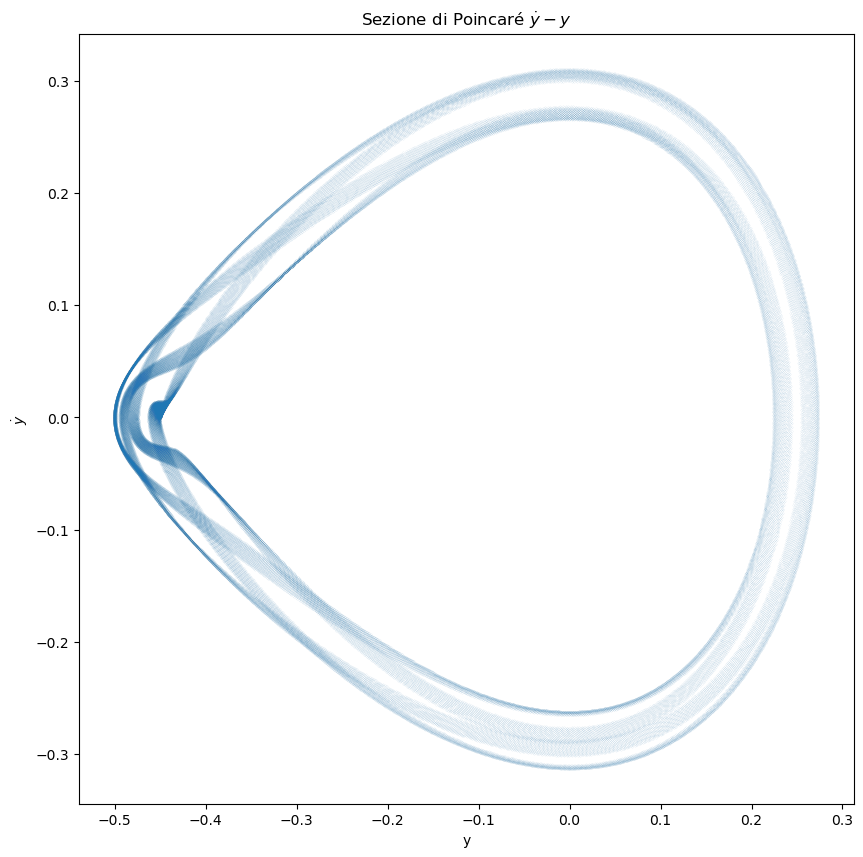

In [62]:
plt.figure(figsize=(10, 10))
plt.scatter( Y, Y_dot, s=0.001)
plt.xlabel('y')
plt.ylabel('$\dot{y}$')
plt.title('Sezione di Poincaré $\dot{y}-y$')
plt.show()

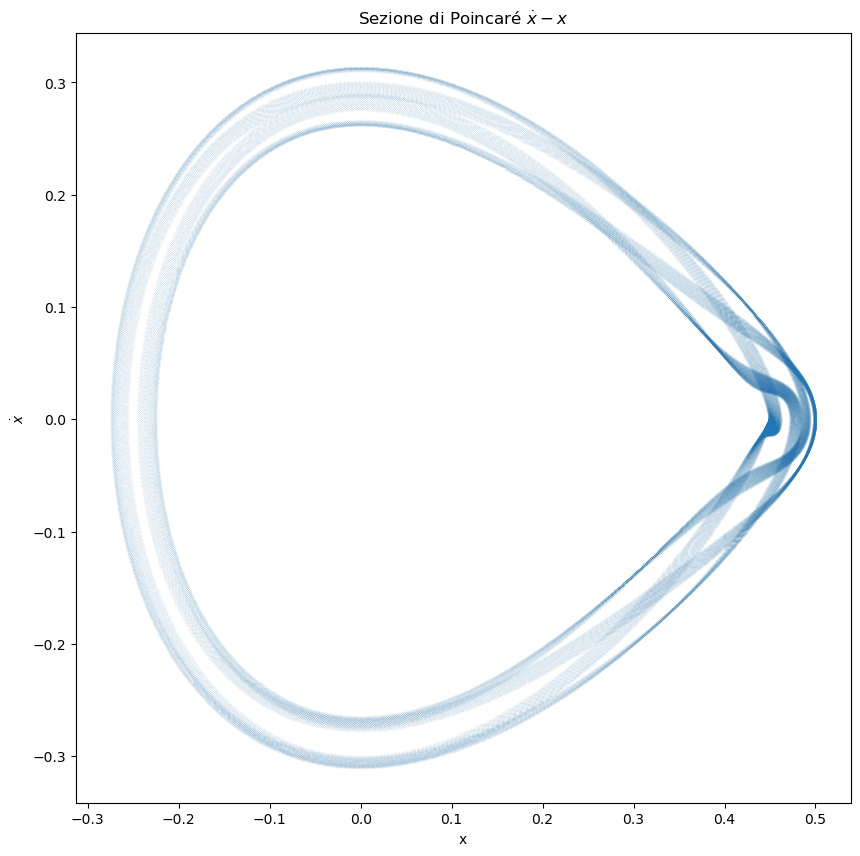

In [63]:
plt.figure(figsize=(10, 10))
plt.scatter( X, X_dot, s=0.001)
plt.xlabel('x')
plt.ylabel('$\dot{x}$')
plt.title('Sezione di Poincaré $\dot{x}-x$')
plt.show()

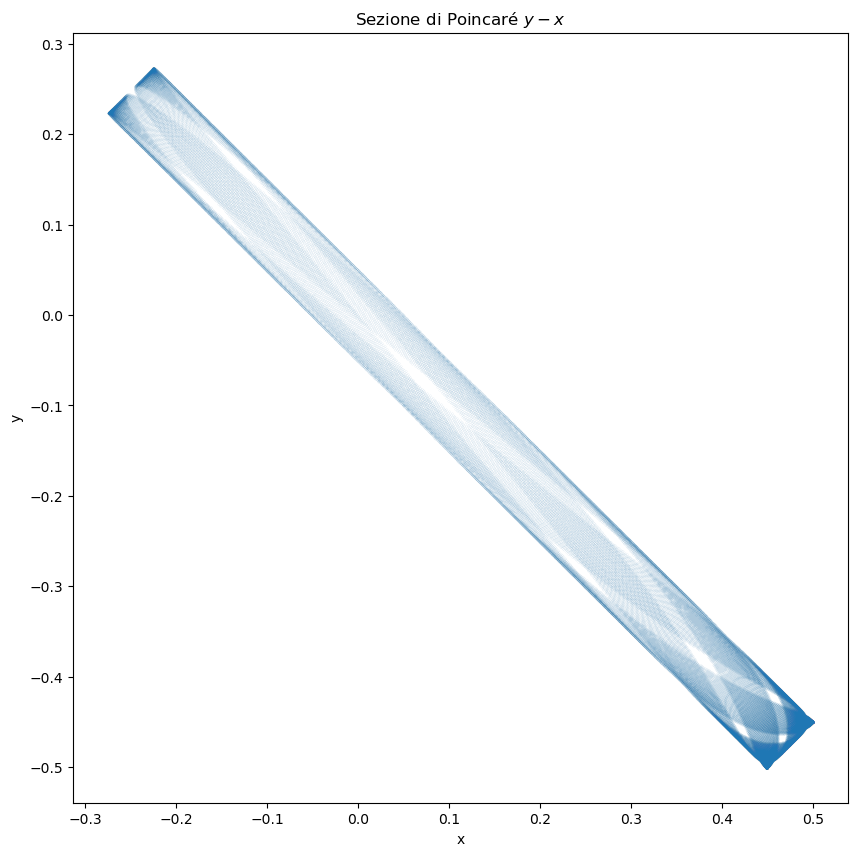

In [64]:
plt.figure(figsize=(10, 10))
plt.scatter( X, Y , s=0.001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sezione di Poincaré $y-x$')
plt.show()

Ora la non armonicità del sistema è evidente e la si può osservare anche nella seguente legge oraria:

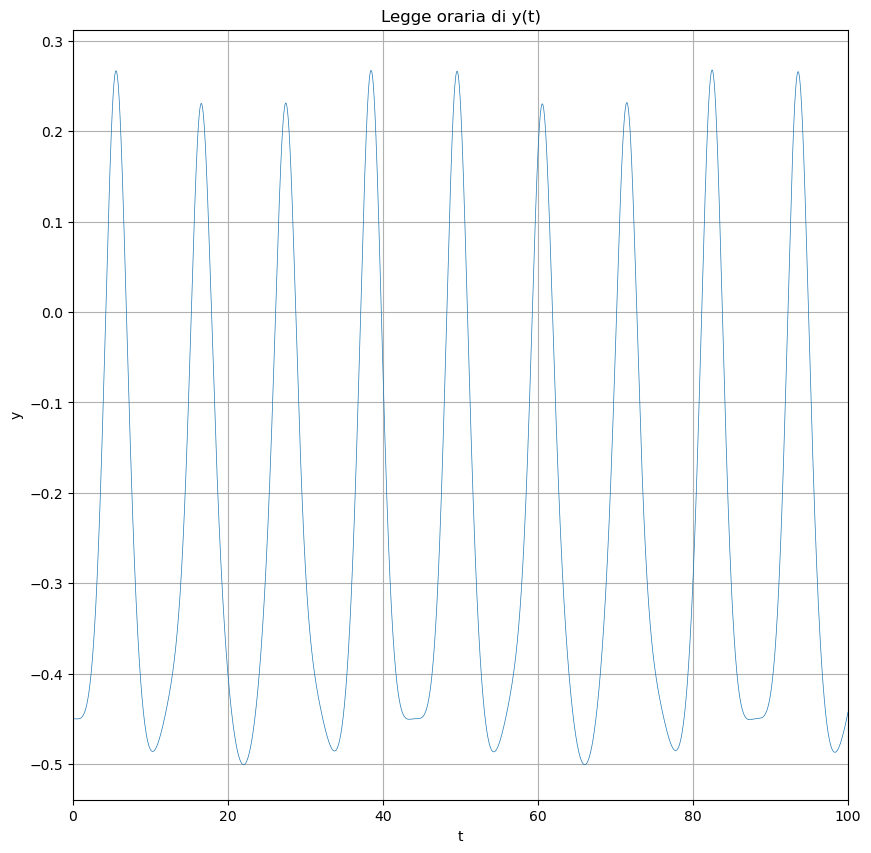

In [65]:
plt.figure(figsize=(10, 10))
plt.plot( TIMES, Y, linewidth=0.5)
plt.xlim(0, 100)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Legge oraria di y(t)')
plt.grid(which='both')
plt.show()

Come prima vediamo come crescono gli errori:

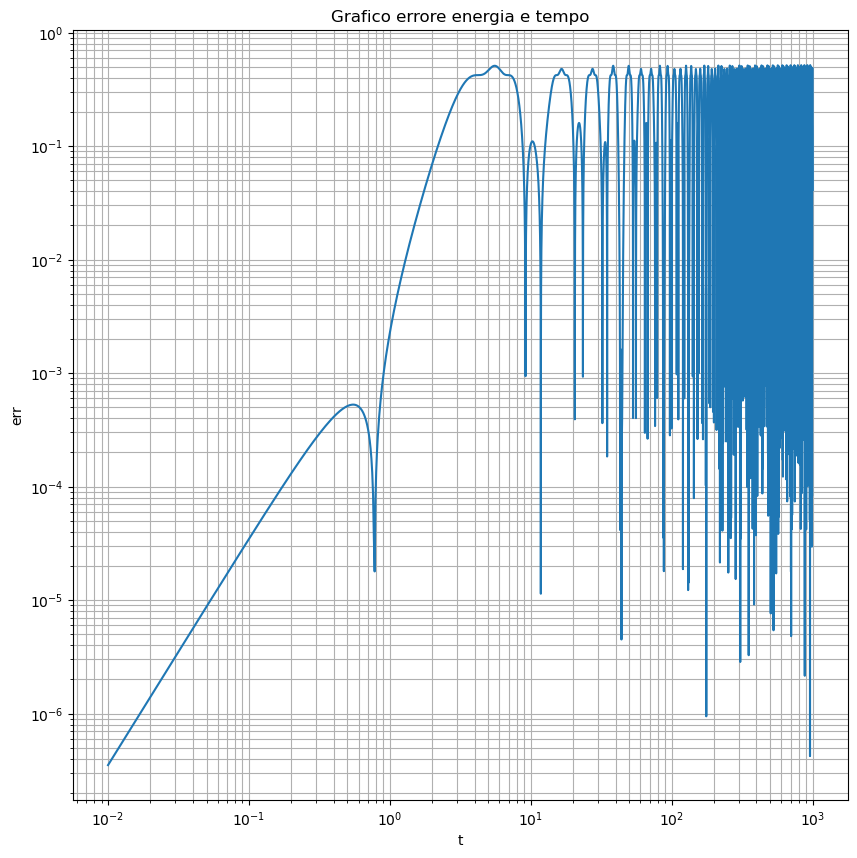

In [66]:
plt.figure(figsize=(10, 10))
plt.loglog( TIMES, err)
plt.xlabel('t')
plt.ylabel('err')
plt.title('Grafico errore energia e tempo')
plt.grid(which='both')
plt.show()

In questo caso la non linearità porta il metodo ad avere errori molto vicini all'unità, se pur mai raggiunta. Ciò è imputabile al fatto che il metodo sta fallendo per tempi molto lunghi.

In [67]:
del Y, Y_dot, X, X_dot, TIMES, err, T_max, dt, a, b, c, time, x0, y0, u0, w0, r0, v0, H0, r_old, v_old, r_new, v_new

## 3) ESERCIZIO N. 3

Nel terzo esercizio abbiamo due pendoli di lunghezza $L$ legati da una molla, di costante elastica $k$, ad una lunghezza $l$ a cui sono appesi delle masse $m$.
$$$$
Scriviamo la lagrangiana $\mathcal{L}= K-U$, nelle variabili $(\theta_1,\, \theta_2)$ del sistema meccanico:
$$\mathcal{L}=\frac{1}{2}mL^2(\dot{\theta}_1^2+\dot{\theta}_2^2)+mgL(cos(\theta_1)+cos(\theta_2))-\frac{1}{2}kl^2(sin(\theta_2)-sin(\theta_1))$$
Dall'equazione di Eulero lagrange $\displaystyle \frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{\theta}_j}\right)=\frac{\partial \mathcal{L}}{\partial \theta_j} \quad j=1,\, 2$ si ricavano facilmente le due equazioni del moto:
$$mL^2\ddot{\theta}_1=-mgLsin(\theta_1)+kl^2(sin(\theta_2)-sin(\theta_1))cos(\theta_1)$$
$$$$
$$mL^2\ddot{\theta}_2=-mgLsin(\theta_2)-kl^2(sin(\theta_2)-sin(\theta_1))cos(\theta_2)$$
Definendo $\displaystyle \alpha=\frac{g}{L}$ e $\displaystyle \beta=\frac{kl^2}{mL^2}$ si ha:
$$\ddot{\theta}_1=-\alpha sin(\theta_1)+\beta(sin(\theta_2)-sin(\theta_1))cos(\theta_1)$$
$$$$
$$\ddot{\theta}_2=-\alpha sin(\theta_2)-\beta(sin(\theta_2)-sin(\theta_1))cos(\theta_2)$$
Ora applicando una trasformazione di Legendre possiamo ottenere l'hamiltoniana dalla lagrangiana:
$$H=\sum_{j=1}^{2}p_{\theta_j}\dot{\theta}_j-\mathcal{L} \quad p_{\theta_j}=\frac{\partial \mathcal{L}}{\partial \dot{\theta}_j}$$
Da semplici passaggi algebrici si ottiene:
$$H=\frac{1}{2}mL^2(\dot{\theta}_1^2+\dot{\theta}_2^2)-\alpha mL^2(cos(\theta_1)+cos(\theta_2))+\frac{1}{2}mL^2\beta(sin(\theta_2)-sin(\theta_1))^2$$

Calcoliamo la funzione da utilizzare per il metodo conservativo:
$$V_{n+1}-V_n=-mL^2\alpha(cos(\theta_{1,\, n+1})+cos(\theta_{2, \, n+1}))+\frac{1}{2}mL^2\beta\Big[sin(\theta_{2,\, n+1})-sin(\theta_{1,\, n+1})\Big]^2+mL^2\alpha(cos(\theta_{1,\, n})+cos(\theta_{2, \, n}))-\frac{1}{2}mL^2\beta\Big[sin(\theta_{2,\, n})-sin(\theta_{1,\, n})\Big]^2$$
Vogliamo quindi trovare delle funzioni $Q_1$ e $Q_2$ tali per cui:
$$(\theta_{1,\, n+1}-\theta_{1,\, n})Q_1+(\theta_{2,\, n+1}-\theta_{2,\, n})Q_2=-mL^2\alpha(cos(\theta_{1,\, n+1})+cos(\theta_{2, \, n+1})-cos(\theta_{1,\, n})-cos(\theta_{2, \, n}))+\frac{1}{2}mL^2\beta \Big[ \left( sin(\theta_{2,\, n+1})-sin(\theta_{1,\, n+1}) \right)^2-\left(sin(\theta_{2,\, n})-sin(\theta_{1,\, n})\right)^2 \Big]$$
Scomponendo:
$$(\theta_{1,\, n+1}-\theta_{1,\, n})Q_1+(\theta_{2,\, n+1}-\theta_{2,\, n})Q_2=-mL^2\alpha(cos(\theta_{1,\, n+1})+cos(\theta_{2, \, n+1})-cos(\theta_{1,\, n})-cos(\theta_{2, \, n}))+\frac{1}{2}mL^2\beta \Big[ sin^2(\theta_{2,\, n+1})-sin(\theta_{2,\, n+1})sin(\theta_{1,\, n+1})-sin(\theta_{2,\, n+1})sin(\theta_{1,\, n+1})+sin^2(\theta_{1,\, n+1}) - sin^2(\theta_{2,\, n})+sin(\theta_{2,\, n})sin(\theta_{1,\, n})-sin^2(\theta_{1,\, n})\Big]$$
Sommando e sottraendo i termini $sin(\theta_{1,\, n+1})sin(\theta_{2,\, n})$, $sin(\theta_{2,\, n+1})sin(\theta_{1,\, n})$, $sin(\theta_{1,\, n+1})sin(\theta_{1,\, n})$ e $sin(\theta_{2,\, n+1})sin(\theta_{2,\, n})$ e raggruppando si ha:
$$(\theta_{1,\, n+1}-\theta_{1,\, n})Q_1+(\theta_{2,\, n+1}-\theta_{2,\, n})Q_2=-mL^2\alpha(cos(\theta_{1,\, n+1})+cos(\theta_{2, \, n+1})-cos(\theta_{1,\, n})-cos(\theta_{2, \, n}))+\frac{1}{2}mL^2\beta (sin(\theta_{2,\, n+1}-sin(\theta_{2,\, n}))\Big[(sin(\theta_{2,\, n+1})-sin(\theta_{1,\, n+1}))+(sin(\theta_{2,\, n})-sin(\theta_{1,\, n}))\Big]+\frac{1}{2}mL^2\beta (sin(\theta_{1,\, n+1}-sin(\theta_{1,\, n}))\Big[(sin(\theta_{1,\, n+1})-sin(\theta_{2,\, n+1}))+(sin(\theta_{1,\, n})-sin(\theta_{2,\, n}))\Big]$$
Dunque le due funzioni sono:
$$Q_1=mL^2\Bigg[-\alpha\frac{cos(\theta_{1,\, n+1})-cos(\theta_{1,\, n})}{\theta_{1,\, n+1}-\theta_{1,\, n}}+\frac{\beta}{2}\frac{sin(\theta_{1, \, n+1})-sin(\theta_{1,\, n})}{\theta_{1,\, n+1}-\theta_{1,\, n}}(sin(\theta_{2,\, n+1})-sin(\theta_{1,\, n+1})+sin(\theta_{2,\, n})-sin(\theta_{1,\, n}))\Bigg]$$
$$$$
$$Q_2=mL^2\Bigg[-\alpha\frac{cos(\theta_{2,\, n+1})-cos(\theta_{2,\, n})}{\theta_{2,\, n+1}-\theta_{2,\, n}}+\frac{\beta}{2}\frac{sin(\theta_{2, \, n+1})-sin(\theta_{2,\, n})}{\theta_{2,\, n+1}-\theta_{2,\, n}}(sin(\theta_{1,\, n+1})-sin(\theta_{2,\, n+1})+sin(\theta_{1,\, n})-sin(\theta_{2,\, n}))\Bigg]$$
Ora passiamo all'implementazione del programma:

In [68]:
m = 1.
L = 1.
l = 1.
g = 9.8
k = 1.
alpha = g / L
beta = k * l * l / (m * L * L )

def prob3_H(y, v):
    return 0.5 * norm2(v) - alpha * ( cos( y[0] ) + cos( y[1] ) )  + 0.5 * beta * ( sin( y[1] - sin(y[0]) ) )**2

def diff_cos(y1, y2):
    if y1==y2:
        return - sin(y1)
    else:
        return ( cos( y2 ) - cos( y1 ) ) / ( y2 - y1 )
    
def d_diff_cos(y1, y2):
    if y1 == y2:
        return - 0.5 * cos(y1)
    else:
        return  1. / (y2 - y1) * ( - diff_cos(y1, y2) - sin( y2 ) )
    
def diff_sin(y1, y2):
    if y1==y2:
        return cos(y1)
    else:
        return ( sin( y2 ) - sin( y1 ) ) / ( y2 - y1 )

def d_diff_sin(y1, y2):
    if y1 == y2:
        return - 0.5 * sin(y1)
    else:
        return 1. / (y2 - y1) * ( - diff_sin(y1, y2) + cos(y2) ) 

def prob3_A(y):
    f1 = - alpha * sin(y[0]) + beta * ( sin(y[1]) - sin(y[0]) ) * cos(y[0])
    f2 = - alpha * sin(y[1]) - beta * ( sin(y[1]) - sin(y[0]) ) * cos(y[1])
    return np.array([f1, f2])

def prob3_Newton(func, Dfunc, x0, toll=1e-10, max_iteration=50, verbose=False):
    x_old=x0
    for i in range(max_iteration):
        f_x = func(x_old)
        J_x = Dfunc(x_old)
        delta_x = np.linalg.solve(J_x, -f_x)
        x_new = x_old + delta_x
        if norm(delta_x)<toll:
            return x_new, i+1, norm(delta_x)
        x_old=x_new
    
    if verbose:
        print('Numero massimo di iterazioni raggiunto')
        print('Norma più vicina calcolata = ', norm(delta_x))
    return x_new, max_iteration, norm(delta_x)

In [69]:
Max_iteration = 10

dt = 0.1                        # Condizioni iniziali del problema
T_max = 1e03                     # 
y0 = np.array([pi/18, 0.])       #
v0 = np.array([0., 0.])          #
H0 = prob3_H(y0, v0)             #

y_old = y0
v_old = v0


def y_new(v):
    global y_old
    global v_old
    return y_old + ( v_old + v ) * 0.5 * dt

def prob3_F_tilde(v):
    global y_old
    global v_old
    F1 =   alpha * diff_cos( y_old[0], y_new(v)[0] ) -  beta * 0.5 * diff_sin( y_old[0], y_new(v)[0] ) * ( sin(y_new(v)[0]) - sin(y_new(v)[1]) + sin(y_old[0]) - sin(y_old[1]) ) 
    F2 =   alpha * diff_cos( y_old[1], y_new(v)[1] ) -  beta * 0.5 * diff_sin( y_old[1], y_new(v)[1] ) * ( sin(y_new(v)[1]) - sin(y_new(v)[0]) + sin(y_old[1]) - sin(y_old[0]) ) 
    return np.array([F1, F2])

def prob3_F(v):
    global v_old
    return - v + v_old + dt * prob3_F_tilde(v) 

def prob3_DF_tilde(v):
    global y_old
    global v_old
    J11 = - alpha * d_diff_cos( y_old[0] , y_new(v)[0] ) + 0.5 * beta * ( cos( y_new(v)[0] ) * diff_sin( y_old[0], y_new(v)[0] ) + ( sin(y_new(v)[0]) - sin(y_new(v)[1]) + sin(y_old[0]) - sin(y_old[1]) ) * d_diff_sin( y_old[0], y_new(v)[0] ) ) 
    J12 = -0.5 * beta * cos( y_new(v)[1] ) * diff_sin( y_old[0], y_new(v)[0] ) 
    J21 = -0.5 * beta * cos( y_new(v)[0] ) * diff_sin( y_old[1], y_new(v)[1] )
    J22 = - alpha * d_diff_cos( y_old[1] , y_new(v)[1] ) + 0.5 * beta * ( cos( y_new(v)[1] ) * diff_sin( y_old[1], y_new(v)[1] ) + ( sin(y_new(v)[1]) - sin(y_new(v)[0]) + sin(y_old[1]) - sin(y_old[0]) ) * d_diff_sin( y_old[1], y_new(v)[1] ) ) 
    return np.array([[-J11, -J12], [-J21, -J22]])

def prob3_J(v):
    return -np.identity(2) + dt * dt * prob3_DF_tilde(v) * 0.5


POSITIONS, VELOCITIES = [], []
E_ERRORS = []
TIMES = []
ITER_SET = []
NORM_SET = []


time = 0
while time < T_max:
    time += dt
    TIMES.append(time)
    V_new, iter_num, distance = prob3_Newton(prob3_F, prob3_J, v_old + prob3_A( y_old ) * dt , max_iteration=Max_iteration)
    Y_new = y_old + dt * 0.5 * ( v_old + V_new )
    H_t = prob3_H(Y_new, V_new)
    err_t = abs(H_t/H0 - 1)
    POSITIONS.append( Y_new[0] )
    VELOCITIES.append( V_new[0] )
    ITER_SET.append(iter_num)
    NORM_SET.append(distance)
    E_ERRORS.append(err_t)
    y_old = Y_new
    v_old = V_new
    


Riportiamo la sezione di Poincaré associata alla prima particella:

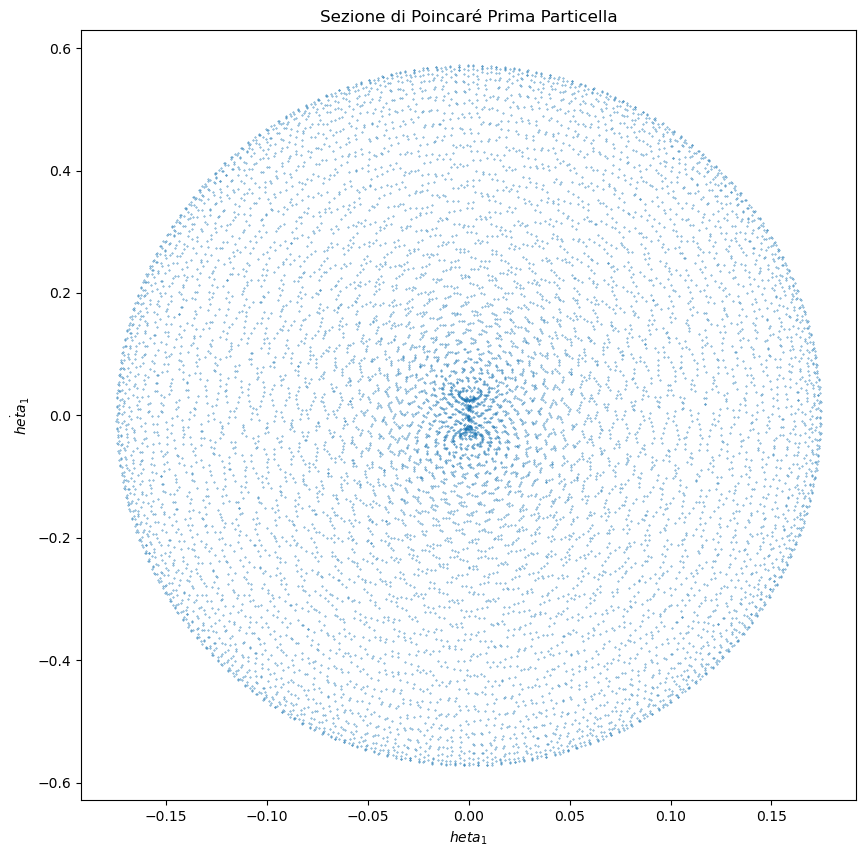

In [70]:
# grafico posizione velocità della prima particella

plt.figure( figsize=(10, 10) )
plt.scatter( POSITIONS, VELOCITIES , s = 0.1)
plt.xlabel('$\theta_1$')
plt.ylabel('$\dot{\theta}_1$')
plt.title('Sezione di Poincaré Prima Particella')
plt.show(  )

Grafichiamo la norma dei passi ottenuti dal metodo di Newton in funzione del tempo:

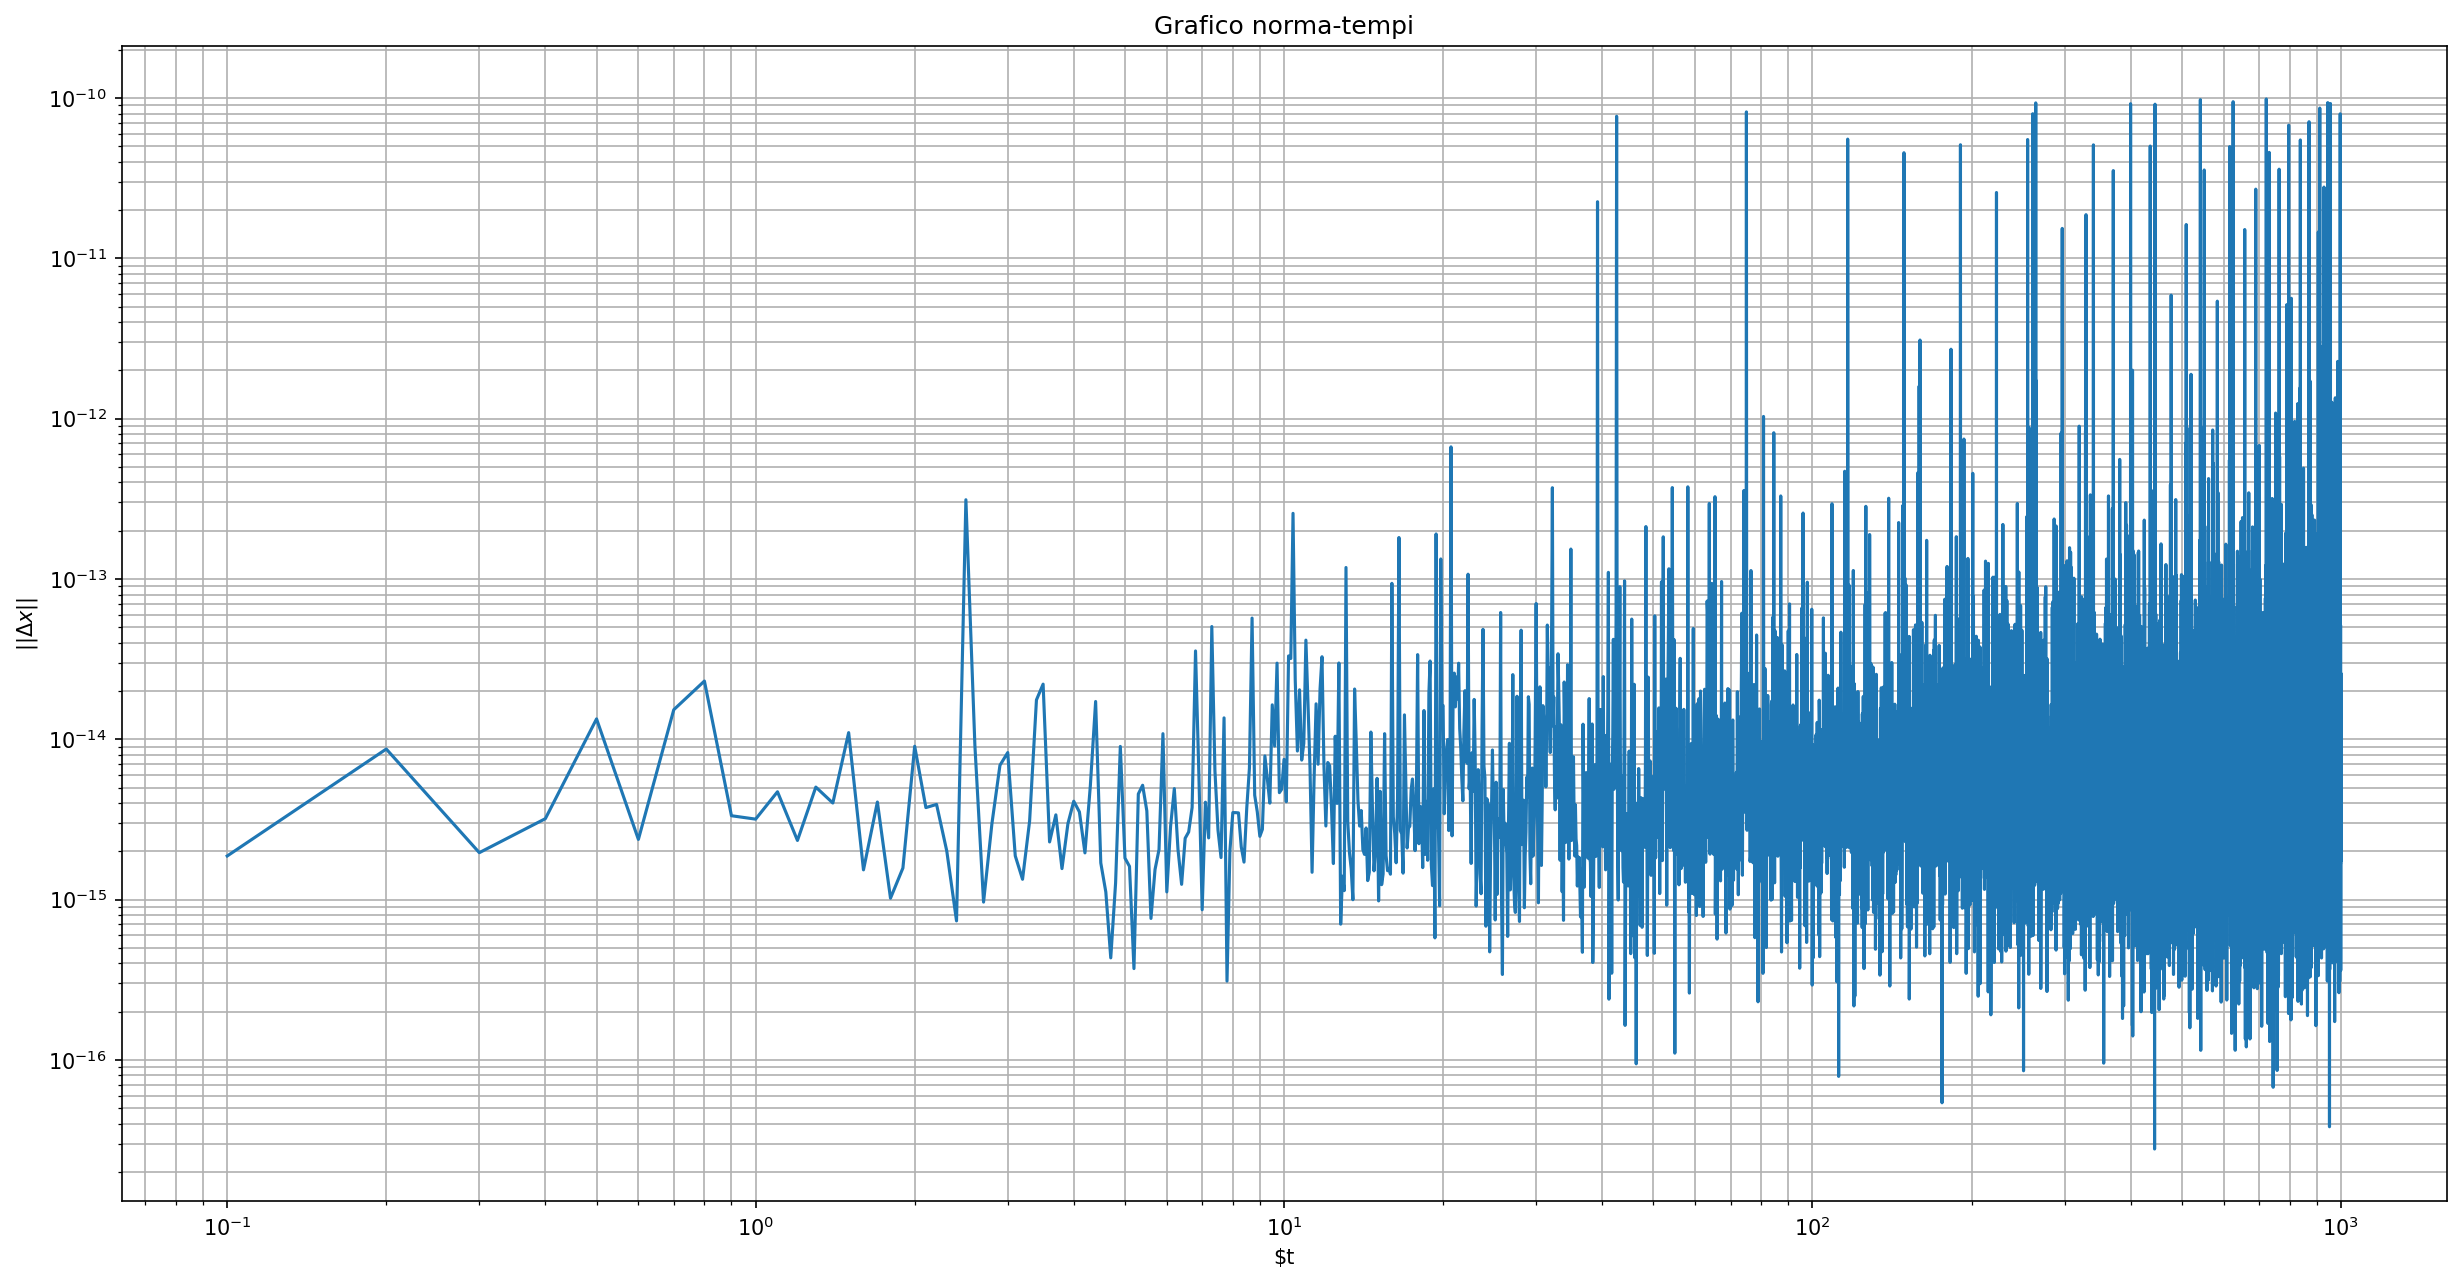

In [71]:
# grafico tempo norma raggiunta dal metodo

plt.figure( figsize=(20, 10), dpi = 150 )
plt.loglog( TIMES, NORM_SET )
plt.xlabel('$t')
plt.ylabel(r'$||\Delta x||$')
plt.title('Grafico norma-tempi')
plt.grid(which='both')
plt.show(  )

Come possiamo vedere le norme non superano $\rVert \Delta x \lVert < 10^{-10}$.
$$$$
Grafichiamo l'errore sull'energia in funzione del tempo:

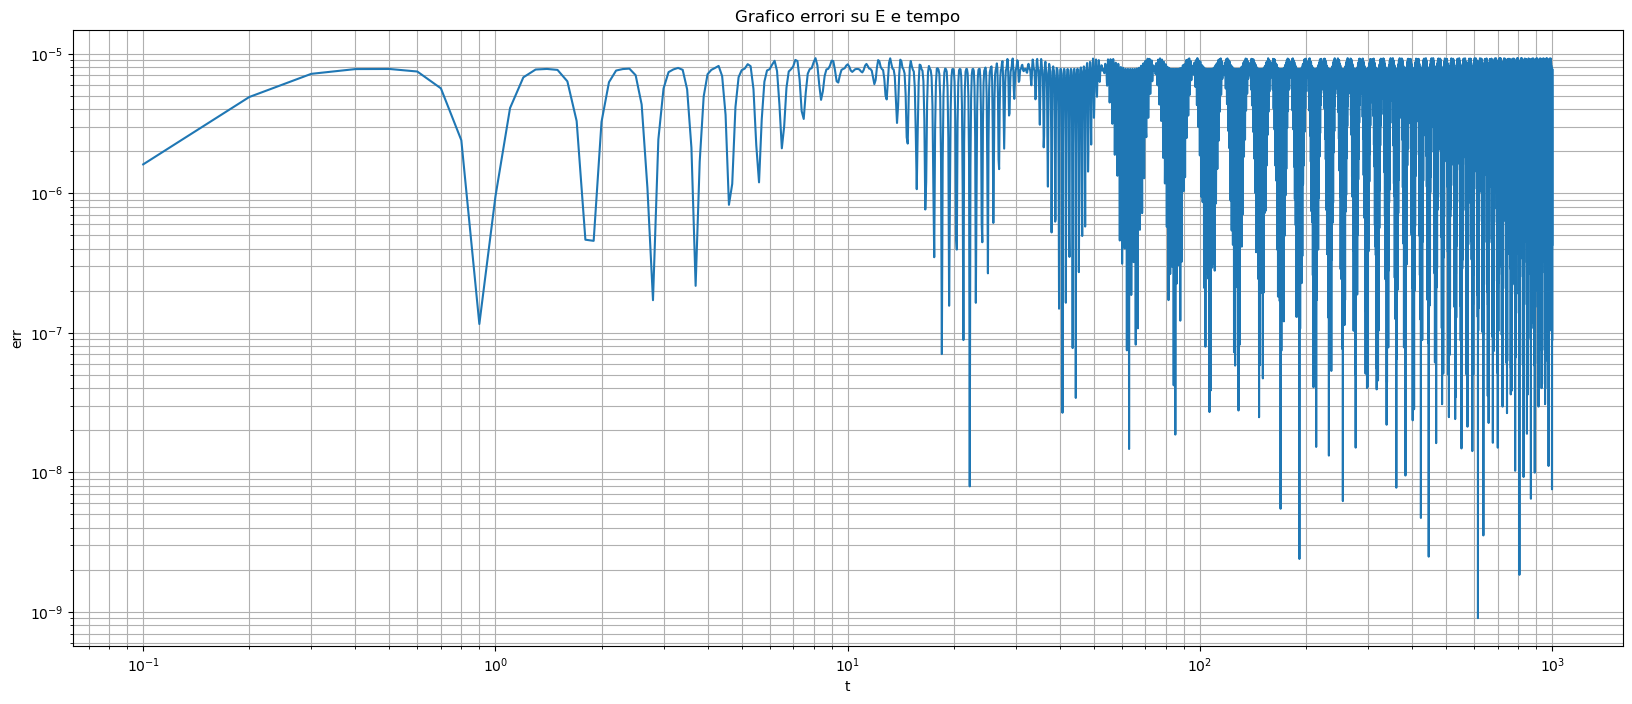

In [72]:
# grafico errore sull'energia in funzione del tempo 

plt.figure( figsize=(20, 8) )
plt.loglog( TIMES, E_ERRORS )
plt.xlabel('t')
plt.ylabel('err')
plt.title('Grafico errori su E e tempo')
plt.grid(which='both')
plt.show(  )

In questo caso il metodo conservativo restituisce $err < 10^{-5}$.
$$$$
Guardiamo quindi il massimo errore raggiunto in funzione della scelta della condizione iniziale sulla prima particella ${\theta_1}_0$:

In [73]:
def prob3_Newton(func, Dfunc, x0, toll=1e-10, max_iteration=50, verbose=False):
    x_old=x0
    for i in range(max_iteration):
        f_x = func(x_old)
        J_x = Dfunc(x_old)
        delta_x = np.linalg.solve(J_x, -f_x)
        x_new = x_old + delta_x
        if norm(delta_x)<toll:
            return x_new
        x_old=x_new
    
    if verbose:
        print('Numero massimo di iterazioni raggiunto')
        print('Norma più vicina calcolata = ', norm(delta_x))
    return x_new

In [74]:
dt = 0.01                     
T_max = 1e02                  
Points_num = 5
theta_0_set = [ pi / (6. * n ) for n in range(1, Points_num+1)   ]
v0 = np.array([0., 0.])

def y_new(v):
    global y_old
    global v_old
    return y_old + ( v_old + v ) * 0.5 * dt

def prob3_F_tilde(v):
    global y_old
    global v_old
    F1 =   alpha * diff_cos( y_old[0], y_new(v)[0] ) -  beta * 0.5 * diff_sin( y_old[0], y_new(v)[0] ) * ( sin(y_new(v)[0]) - sin(y_new(v)[1]) + sin(y_old[0]) - sin(y_old[1]) ) 
    F2 =   alpha * diff_cos( y_old[1], y_new(v)[1] ) -  beta * 0.5 * diff_sin( y_old[1], y_new(v)[1] ) * ( sin(y_new(v)[1]) - sin(y_new(v)[0]) + sin(y_old[1]) - sin(y_old[0]) ) 
    return np.array([F1, F2])

def prob3_F(v):
    global v_old
    return - v + v_old + dt * prob3_F_tilde(v) 

def prob3_DF_tilde(v):
    global y_old
    global v_old
    J11 = - alpha * d_diff_cos( y_old[0] , y_new(v)[0] ) + 0.5 * beta * ( cos( y_new(v)[0] ) * diff_sin( y_old[0], y_new(v)[0] ) + ( sin(y_new(v)[0]) - sin(y_new(v)[1]) + sin(y_old[0]) - sin(y_old[1]) ) * d_diff_sin( y_old[0], y_new(v)[0] ) ) 
    J12 = -0.5 * beta * cos( y_new(v)[1] ) * diff_sin( y_old[0], y_new(v)[0] ) 
    J21 = -0.5 * beta * cos( y_new(v)[0] ) * diff_sin( y_old[1], y_new(v)[1] )
    J22 = - alpha * d_diff_cos( y_old[1] , y_new(v)[1] ) + 0.5 * beta * ( cos( y_new(v)[1] ) * diff_sin( y_old[1], y_new(v)[1] ) + ( sin(y_new(v)[1]) - sin(y_new(v)[0]) + sin(y_old[1]) - sin(y_old[0]) ) * d_diff_sin( y_old[1], y_new(v)[1] ) ) 
    return np.array([[-J11, -J12], [-J21, -J22]])

def prob3_J(v):
    return -np.identity(2) + dt * dt * prob3_DF_tilde(v) * 0.5


MAX_E_ERRORS = []
MAX_E_ERRORS_V = []


for theta0 in theta_0_set:
    time = 0
    y0 = np.array([theta0, 0.])                
    H0 = prob3_H(y0, v0)             
    max_err = 0
    max_err_v = 0
    y_old = y0
    v_old = v0
    Xv_old = y0
    Vv_old = v0
    while time < T_max:
        time += dt
        V_new = prob3_Newton(prob3_F, prob3_J, v_old + prob3_A( y_old ) * dt )
        Y_new = y_old + dt * 0.5 * ( v_old + V_new )
        H_t = prob3_H(Y_new, V_new)
        err_t = abs(H_t/H0 - 1)
        y_old = Y_new
        v_old = V_new
        if err_t >= max_err:
            max_err = err_t
            
        
        Xv_new = Xv_old + Vv_old * dt + 0.5 * dt * dt * prob3_A(Xv_old)
        Vv_new = Vv_old + 0.5 * ( prob3_A( Xv_old ) + prob3_A( Xv_new ) ) * dt
        Hv = prob3_H(Xv_new, Vv_new) 
        Ev_err = abs(Hv/H0 - 1)
        
        if Ev_err >= max_err_v:
            max_err_v = Ev_err
        
    MAX_E_ERRORS_V.append(max_err_v)    
    MAX_E_ERRORS.append(max_err)

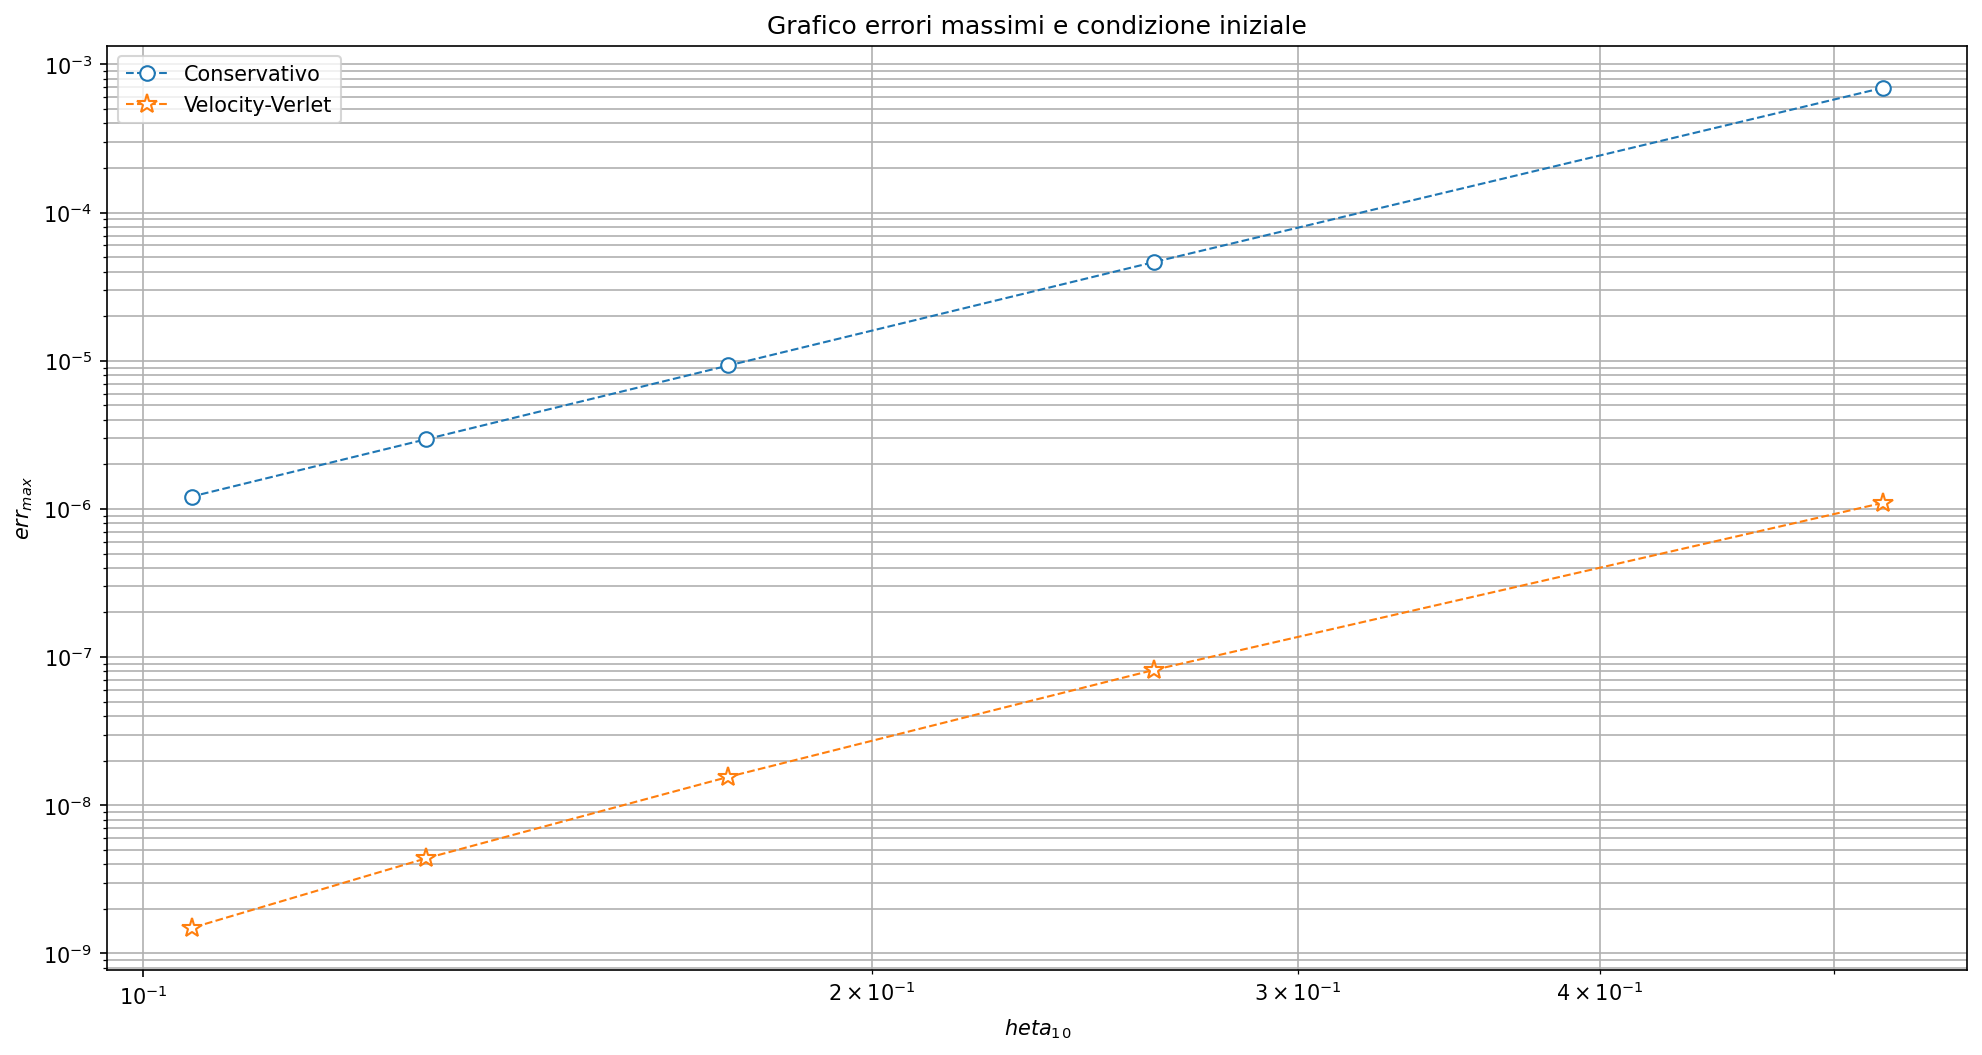

In [75]:
# grafico dell'errore massimo sull'energia al variare della condizione iniziale, che si avvicina al regime di linearità di piccole oscillazioni
# confronto con Verlet
plt.figure( figsize=(16, 8), dpi=150 )
plt.loglog( theta_0_set, MAX_E_ERRORS, marker='o', linestyle='--', markersize=7, linewidth=1, markerfacecolor='white', label='Conservativo')
plt.loglog( theta_0_set, MAX_E_ERRORS_V, marker='*', linestyle='--', markersize=10, linewidth=1, markerfacecolor='white', label='Velocity-Verlet' )
plt.grid(which='both')
plt.xlabel('${\theta_1}_0$')
plt.ylabel('$err_{max}$')
plt.title('Grafico errori massimi e condizione iniziale')
plt.legend()
plt.show()

In questo caso il metodo conservativo ha massimi superiori rispetto al metodo di Verlet, anche se la crescita degli errori è paragonabile fra i due.

## 4) N-Oscillatori anarmonici 1D

Concludiamo il progetto con l'analisi del problema di Fermi-Pasta-Ulam (FPU).
$$$$
Per valutare la "bontà" del metodo conservativo mostriamo l'andamento degli errori relativi sull'energia all'aumentare del passo temporale $\Delta t$ e confrontando questo con il metodo Velocity-Verlet.
$$$$
Per poter fare ciò osserviamo preliminarmente che il problema implicito da risolvere in questo caso si riconduce a risolvere un sistema di $N$ equazioni non lineari con Jacobiana associata al sistema tridiagonale, pertanto la complessità computazionale può essere ridotta tramite algoritmi specifici come quello di Thomas (mostrato in bibliografia).
$$$$
In altre parole il metodo conservativo viene ridotto alla ricerca delle soluzioni delle equazioni vettoriali implicite tramite metodo di Newton $N$ dimensionale, la cui matrice è tridiagonale e pertanto risolta con utilizzo di Thomas.
$$$$
Passiamo all'implementazione per $N=32$ particelle:

In [76]:
k_1 = 1.
k_2 = 5.
m = 1.

DIM = 32


def A_CHAIN(y):
    RES = [None] * DIM
    for n in range(DIM):
        if n==0:
            F_n = -( 2. * y[n] - y[n+1]) * ( k_1 + k_2 * ( y[n]*y[n] + y[n+1]*y[n+1] - y[n]*y[n+1] ) )
            RES[n] = F_n
        elif n==(DIM-1):
            F_n = -( 2. * y[n] - y[n-1] ) * ( k_1 + k_2 * ( y[n]*y[n] + y[n-1]*y[n-1] - y[n]*y[n-1] ) )
            RES[n] = F_n
        else:
            F_n = -( 2. * y[n] - y[n+1] - y[n-1] ) * ( k_1 + k_2 * ( y[n]*y[n] + y[n+1]*y[n+1] + y[n-1]*y[n-1] - y[n]*y[n-1] - y[n]*y[n+1] - y[n+1]*y[n-1]) )
            RES[n] = F_n
    return np.array( RES )/m


def Tridiag_solve(a, b, c, d): # a = Lower diag b = Main diag c = Upper diag d = Sols
    n = len(d)
    w = np.zeros(n-1,float)
    g = np.zeros(n, float)
    p = np.zeros(n,float)

    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    p[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p



def Tridiag_Newton(func__dfunc, x0, toll=1e-12, max_iteration=100, verbose=False):
    x = x0
    for i in range(max_iteration):
        f_x, sdiag, diag, udiag = func__dfunc(x)
        delta_x = Tridiag_solve(sdiag, diag, udiag, -f_x)
        x += delta_x
        if norm(delta_x)<toll:
            if verbose:
                print('Number of iterations: ', i)
            return x
    
    print('Maximum iteration number exceeded')



def CHAIN_CONS_ODE(Y_OLD, V_OLD, dt):
    N = DIM
    def F_and_DF(v):
        F_res = np.empty(N)
        a = np.empty(N-1)
        b = np.empty(N)
        c = np.empty(N-1)
        u = V_OLD
        x = Y_OLD
        y = x + (v + u) * 0.5 * dt
        for n in range(N):
            if (0<n) and (n<(N-1)):                
                B_n = 2. * ( x[n]**2 + y[n]**2 ) + 3. * ( x[n+1]**2 + y[n+1]**2 + x[n-1]**2 + y[n-1]**2 )
                C_n = - 2. * ( y[n-1]**3 + x[n-1]**3 + x[n+1]**3 + y[n+1]**3 + ( x[n-1] + y[n-1] + x[n+1] + y[n+1] ) * ( y[n]**2 + y[n]*x[n] + x[n]**2 ) )
                F_tilde_n = - 0.5 * k_1 * ( 2. * x[n] + 2. * y[n] - x[n-1] - y[n-1] - x[n+1] - y[n+1] ) - 0.25 * k_2 * ( ( x[n] + y[n] ) * B_n + C_n )
                F_n = - v[n] + u[n] + F_tilde_n * dt / m
                
                dF_diag_n = - k_1 - 0.25 * k_2 * B_n - k_2 * ( x[n] + y[n] ) * y[n] + 0.5 * k_2 * ( 2. * y[n] + x[n] ) * ( x[n-1] + y[n-1] + x[n+1] + y[n+1] ) 
                dF_sdiag_n = 0.5 * k_1 - 0.25 * k_2 * ( x[n] + y[n] ) * 6. * y[n-1] + 0.5 * k_2 * ( 3. * y[n-1]**2 + y[n]**2 + y[n]*x[n] + x[n]**2 )
                dF_udiag_n = 0.5 * k_1 - 0.25 * k_2 * ( x[n] + y[n] ) * 6. * y[n+1] + 0.5 * k_2 * ( 3. * y[n+1]**2 + y[n]**2 + y[n]*x[n] + x[n]**2 )
                diag_n = - 1. + dF_diag_n * dt**2 / m * 0.5
                sdiag_n = dF_sdiag_n * dt**2 / m * 0.5
                udiag_n = dF_udiag_n * dt**2 / m * 0.5
                
                F_res[n] = F_n
                
                a[n-1] = sdiag_n
                b[n] = diag_n
                c[n] = udiag_n
            elif (n==0):
                B_n = 2. * ( x[n]**2 + y[n]**2 ) + 3. * ( x[n+1]**2 + y[n+1]**2 )
                C_n = - 2. * ( x[n+1]**3 + y[n+1]**3 + ( x[n+1] + y[n+1] ) * ( y[n]**2 + y[n]*x[n] + x[n]**2 ) )
                F_tilde_n = - 0.5 * k_1 * ( 2. * x[n] + 2. * y[n] - x[n+1] - y[n+1] ) - 0.25 * k_2 * ( ( x[n] + y[n] ) * B_n + C_n )
                F_n = - v[n] + u[n] + F_tilde_n * dt / m   

                dF_diag_n = - k_1 - 0.25 * k_2 * B_n - k_2 * ( x[n] + y[n] ) * y[n] + 0.5 * k_2 * ( 2. * y[n] + x[n] ) * ( x[n+1] + y[n+1] ) 
                dF_sdiag_n = 0.5 * k_1 + 0.5 * k_2 * ( y[n]**2 + y[n]*x[n] + x[n]**2 )
                dF_udiag_n = 0.5 * k_1 - 0.25 * k_2 * ( x[n] + y[n] ) * 6. * y[n+1] + 0.5 * k_2 * ( 3. * y[n+1]**2 + y[n]**2 + y[n]*x[n] + x[n]**2 )
                diag_n = -1. + dF_diag_n * dt**2 / m * 0.5
                sdiag_n = dF_sdiag_n * dt**2 / m * 0.5
                udiag_n = dF_udiag_n * dt**2 / m * 0.5 
                
                F_res[n] = F_n
                b[n] = diag_n
                c[n] = udiag_n
            else:
                B_n = 2. * ( x[n]**2 + y[n]**2 ) + 3. * ( x[n-1]**2 + y[n-1]**2 )
                C_n = - 2. * ( y[n-1]**3 + x[n-1]**3 + ( x[n-1] + y[n-1] ) * ( y[n]**2 + y[n]*x[n] + x[n]**2 ) )
                F_tilde_n = - 0.5 * k_1 * ( 2. * x[n] + 2. * y[n] - x[n-1] - y[n-1] ) - 0.25 * k_2 * ( ( x[n] + y[n] ) * B_n + C_n )
                F_n = - v[n] + u[n] + F_tilde_n * dt / m
                
                dF_diag_n = - k_1 - 0.25 * k_2 * B_n - k_2 * ( x[n] + y[n] ) * y[n] + 0.5 * k_2 * ( 2. * y[n] + x[n] ) * ( x[n-1] + y[n-1] ) 
                dF_sdiag_n = 0.5 * k_1 - 0.25 * k_2 * ( x[n] + y[n] ) * 6. * y[n-1] + 0.5 * k_2 * ( 3. * y[n-1]**2 + y[n]**2 + y[n]*x[n] + x[n]**2 )
                dF_udiag_n = 0.5 * k_1 + 0.5 * k_2 * ( y[n]**2 + y[n]*x[n] + x[n]**2 )
                diag_n = -1. + dF_diag_n * dt**2 / m * 0.5
                sdiag_n = dF_sdiag_n * dt**2 / m * 0.5
                udiag_n = dF_udiag_n * dt**2 / m * 0.5
                
                F_res[n] = F_n
                a[n-1] = sdiag_n
                b[n] = diag_n
        return F_res, a, b, c
    Y_MID = Y_OLD + V_OLD * dt + 0.5 * A_CHAIN( Y_OLD ) * dt * dt 
    V_NEW = Tridiag_Newton(F_and_DF, V_OLD + ( A_CHAIN(Y_OLD) + A_CHAIN(Y_MID) )*0.5*dt )
    Y_NEW = Y_OLD + ( V_OLD + V_NEW ) * 0.5 * dt
    return Y_NEW, V_NEW



def SYS_VEL_VERL(Y_OLD, V_OLD, A, DT):
    Y_NEW = Y_OLD + V_OLD * DT + 0.5 * A( Y_OLD ) * DT * DT 
    V_NEW = V_OLD + ( A( Y_OLD ) + A( Y_NEW ) ) * 0.5 * DT 
    return Y_NEW, V_NEW



def V_s(y):
    return 0.5 * k_1 * y * y + 0.25 * k_2 * y * y * y * y


def V_tot(y):
    s = 0
    for n in range(1, DIM):
        s += V_s(y[n]-y[n-1])
    s += V_s(y[0]) + V_s(y[DIM-1])
    return s


def H_chain(y, v):
    N = DIM
    V_sum = 0
    for n in range(1, N):
        V_sum += V_s( y[n]-y[n-1] )
    V_sum += V_s(y[0]) + V_s(y[N-1])
    H = V_sum + 0.5*m*norm2(v)
    return H

In [77]:
delta_t1 = 0.4
delta_t1_V = 0.1
Points_num = 4
DELTA_TIME_SET = [ delta_t1/2**n for n in range(Points_num) ] 
DELTA_TIME_SET_V = [ delta_t1_V/2**n for n in range(Points_num) ]   
T_max = 1e03
theta = pi/( DIM + 1 )

y_0 = np.array([ sin(3*j*theta) for j in range(1, DIM+1) ])
v_0 = np.zeros(DIM)



y = y_0
v = v_0
H0 = H_chain(y, v)
ERR_set = []
ERR_set_V = []

count = 0
for DT, DT_V in zip(DELTA_TIME_SET, DELTA_TIME_SET_V):
    print('Numero di equazioni risolte: ', count)
    count += 1
    y = y_0
    v = v_0
    y_V = y_0
    v_V = v_0
    time = 0.
    max_err = 0.
    max_err_V = 0.
    while time < T_max:
        time += DT
        y, v = CHAIN_CONS_ODE(y, v, DT)
        H = H_chain(y, v)
        err = abs(H/H0-1)
        if max_err <= err:
            max_err = err
        y_V, v_V = SYS_VEL_VERL(y_V, v_V, A_CHAIN, DT_V)
        H = H_chain(y_V, v_V)
        err = abs(H/H0 - 1)
        if max_err_V <= err:
            max_err_V = err
        
    ERR_set.append(max_err)
    ERR_set_V.append(max_err_V)

Numero di equazioni risolte:  0
Numero di equazioni risolte:  1
Numero di equazioni risolte:  2
Numero di equazioni risolte:  3


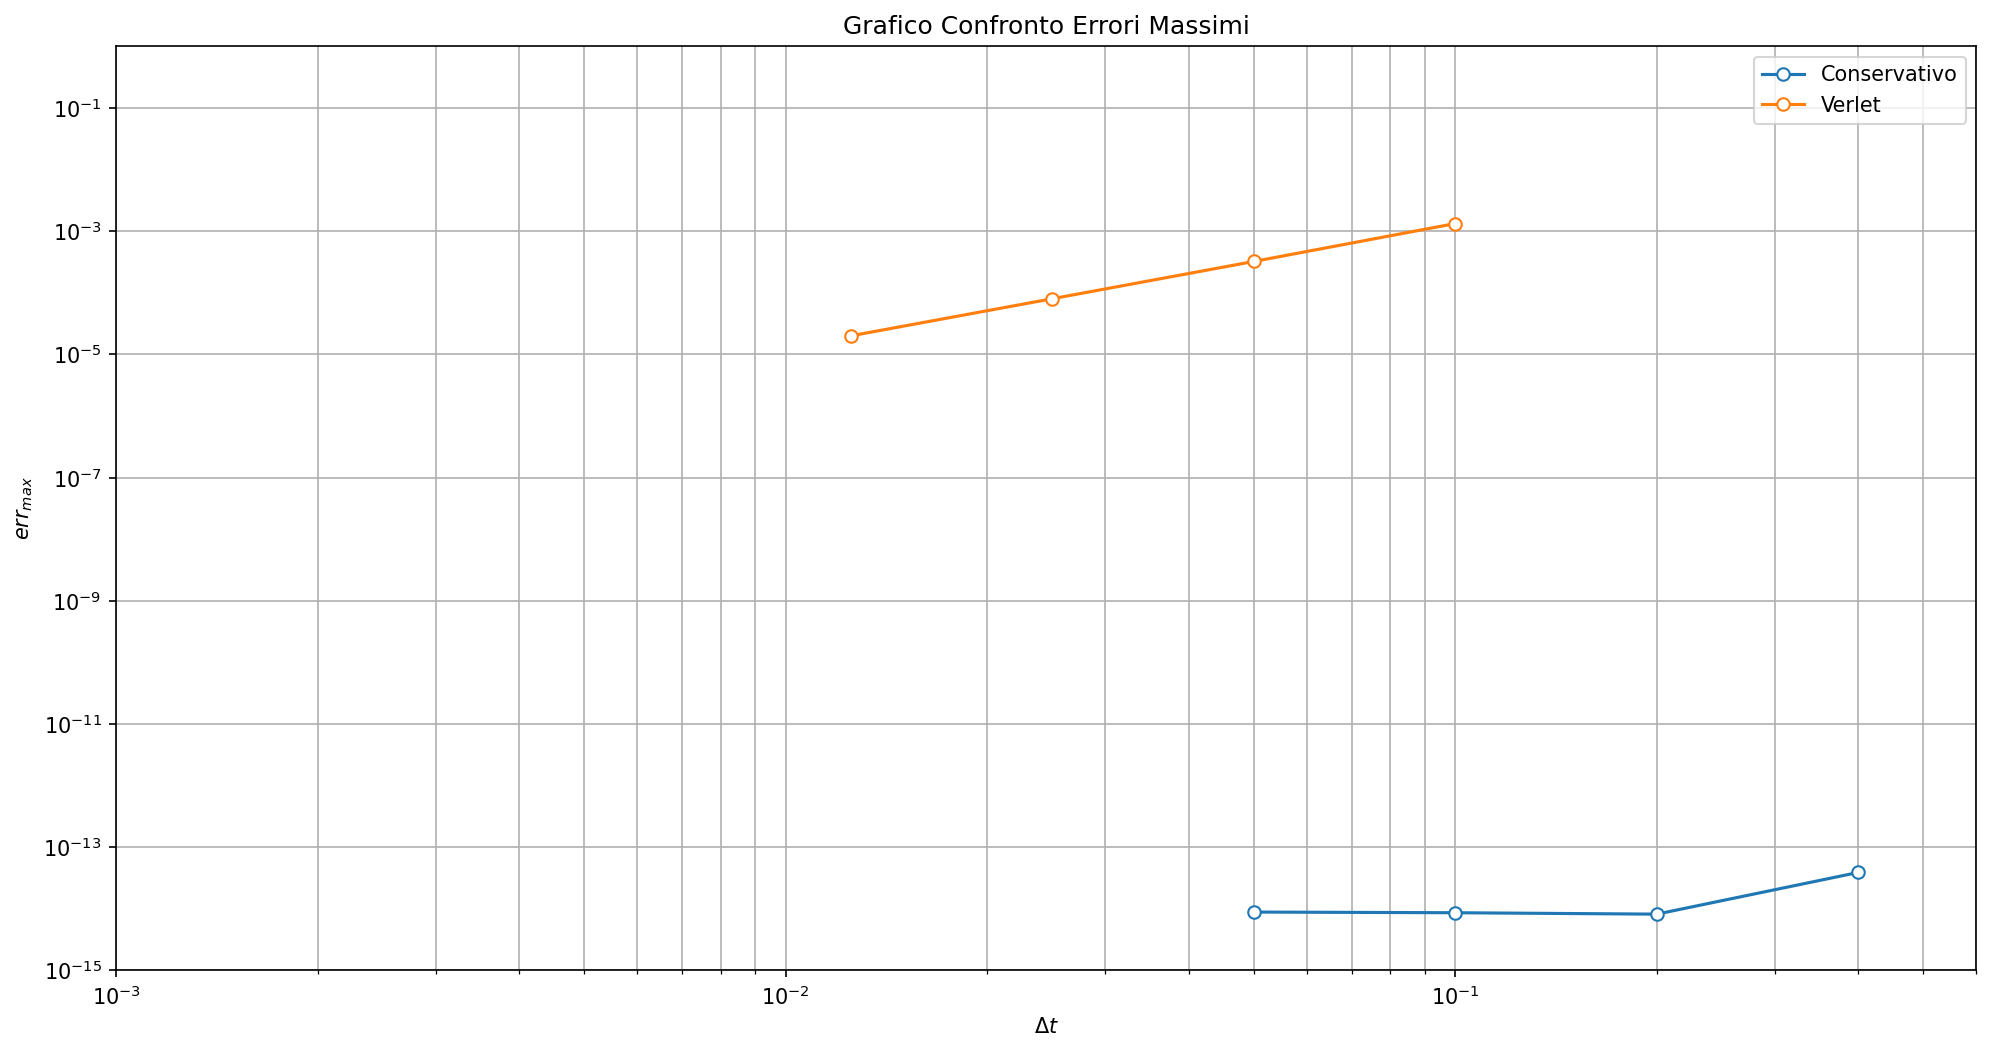

In [78]:
plt.figure(figsize=(16,8), dpi=150)
plt.loglog(DELTA_TIME_SET, ERR_set, marker='o', markerfacecolor='white', label='Conservativo')
plt.loglog(DELTA_TIME_SET_V, ERR_set_V, marker='o', markerfacecolor='white', label='Verlet')
plt.xlim(0.001, 0.6)
plt.ylim(1e-15, 1)
plt.grid(which='both')
plt.xlabel('$\Delta t$')
plt.ylabel('$err_{max}$')
plt.title('Grafico Confronto Errori Massimi')
plt.legend()
plt.show()

A conferma della bontà del metodo, anche a $\Delta t$ maggiori, il metodo conservativo restituisce errori relativi di molti ordini di grandezza più piccoli.

Qui riportiamo un grafico simile a quello di singola particella, in cui si esibisce l'errore relativo dell'energia ad un tempo $t$ e l'energia iniziale $E_0$. Le condizioni iniziali, utilizzate per questo conto, sono dunque: $v_{\alpha}(0)=0$ e $\displaystyle y_{\alpha}(0)=sin\left(\frac{3 \pi \alpha }{N+1}\right)$; inoltre il tempo di simulazione è compreso fa $0 \leq t \leq 1000$:

In [79]:
DT = 0.1
T_max = 1e03
theta = pi/( DIM + 1 )

y_0 = np.array([ sin(3*j*theta) for j in range(1, DIM+1) ])
v_0 = np.zeros(DIM)



y = y_0
v = v_0
H0 = H_chain(y, v)
ERR_set = []
TIMES = []

y = y_0
v = v_0
time = 0.
while time < T_max:
    time += DT
    y, v = CHAIN_CONS_ODE(y, v, DT)
    H = H_chain(y, v)
    err = abs(H/H0-1)
    ERR_set.append(err)
    TIMES.append(time)

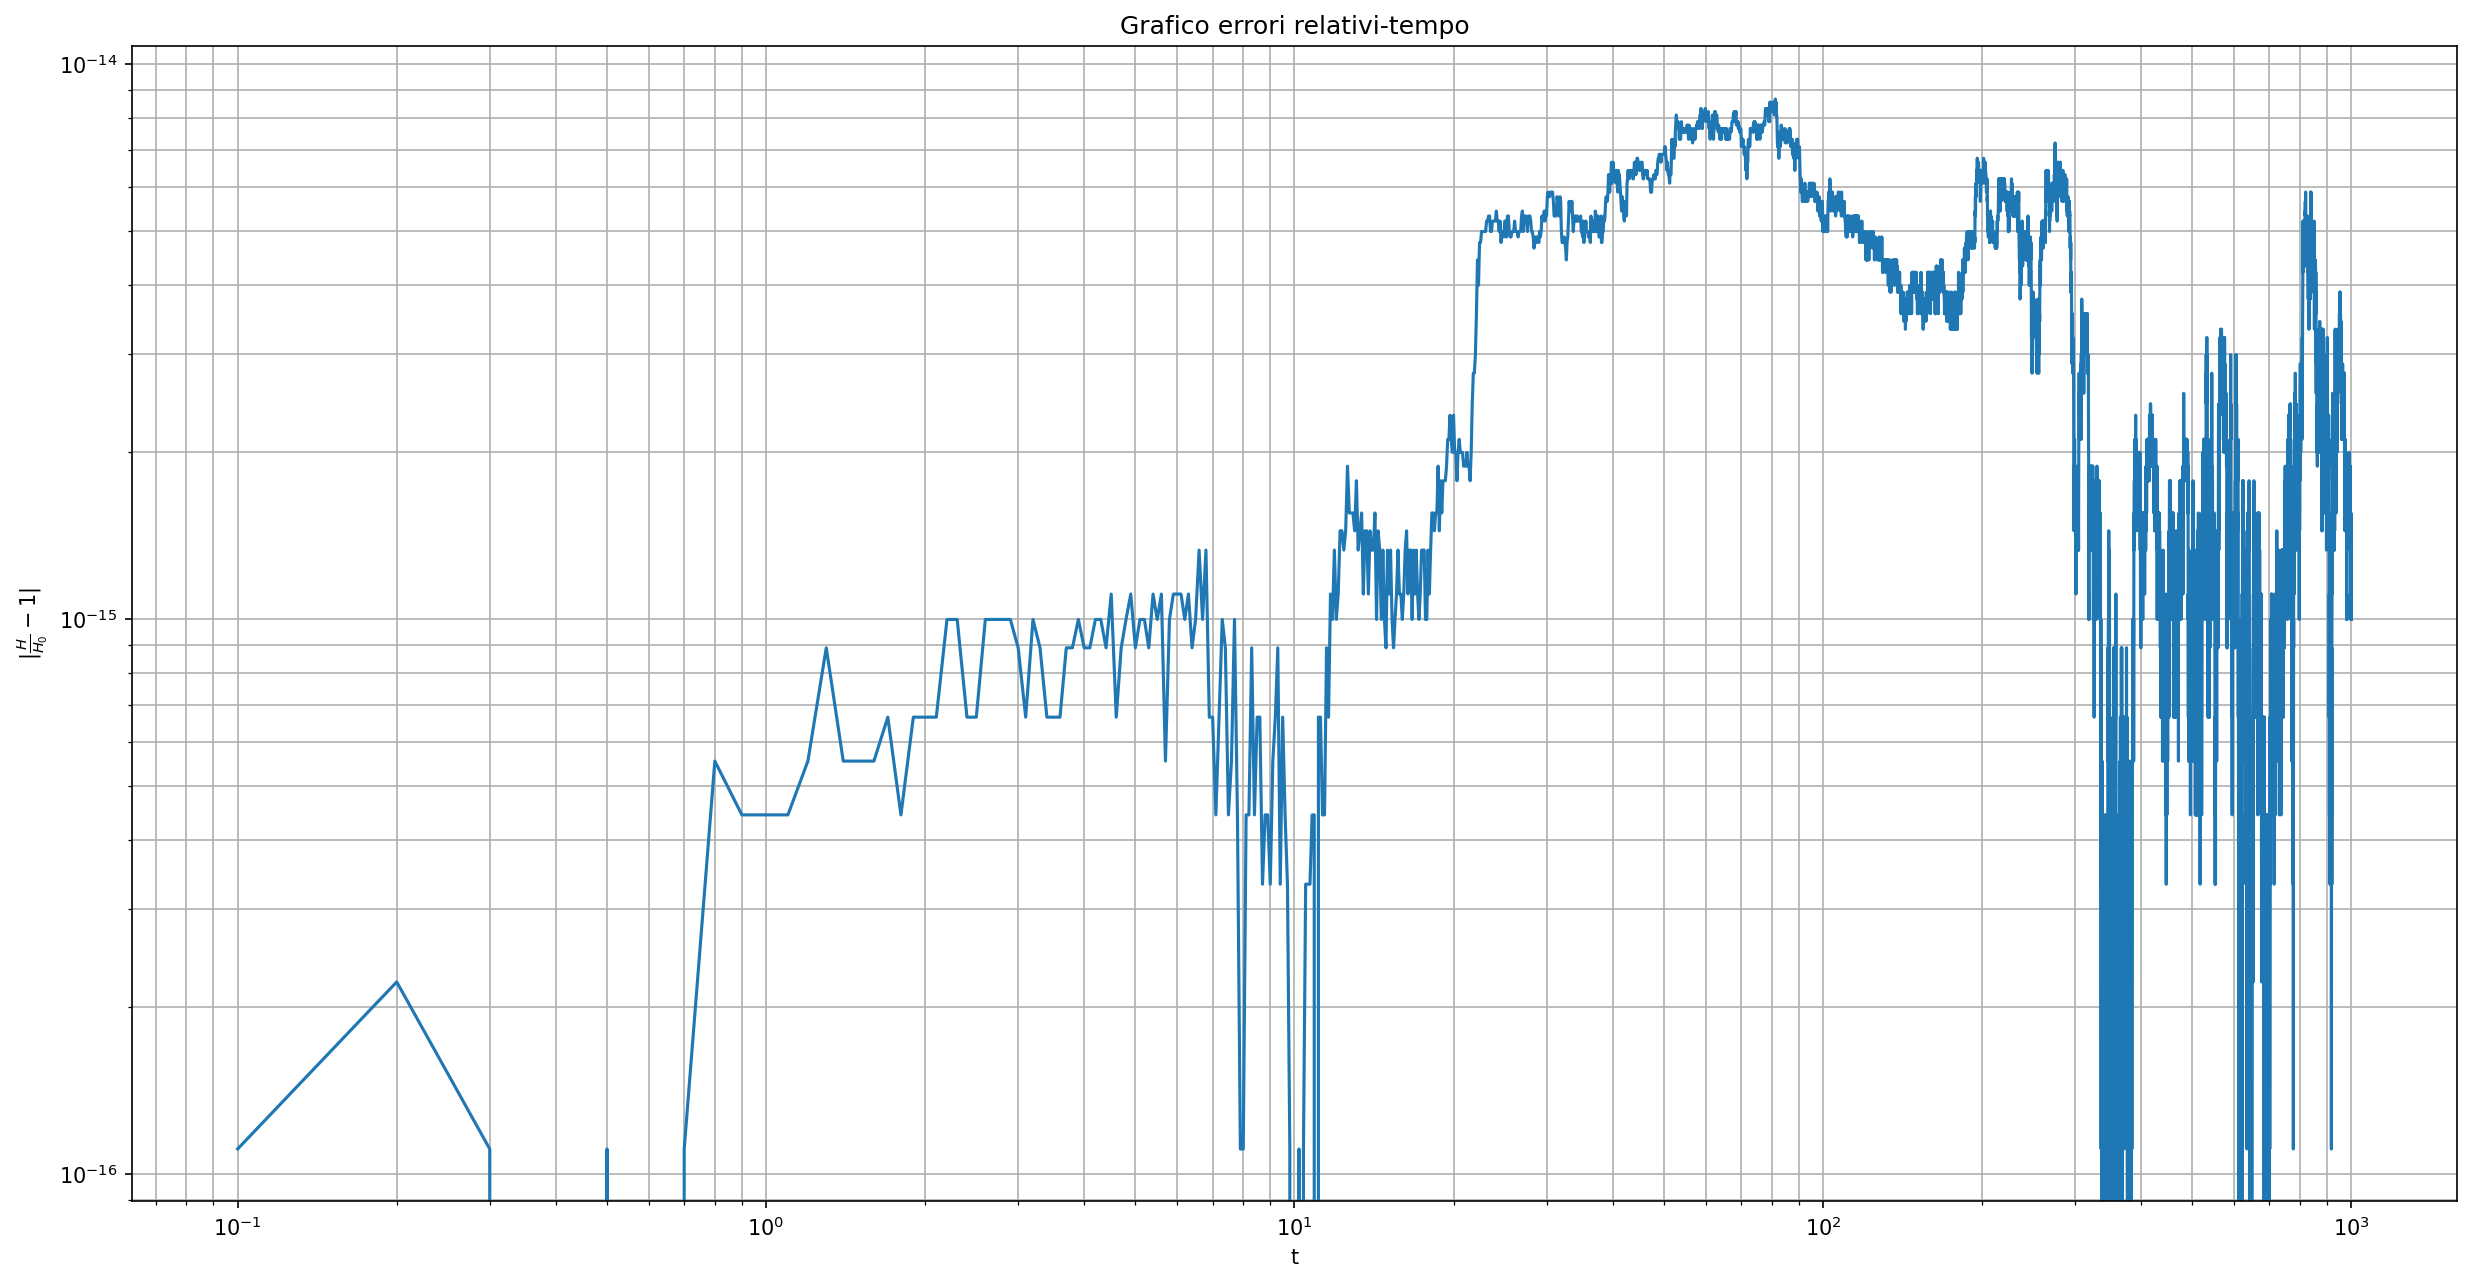

In [80]:
# grafico errore relativo in funzione del tempo
plt.figure(figsize=(20,10), dpi=150)
plt.loglog(TIMES, ERR_set)
plt.xlabel('t')
plt.ylabel(r'$ |\frac{H}{H_0}-1 |$')
plt.grid(which='both')
plt.title('Grafico errori relativi-tempo')
plt.show()

Come si può vedere il metodo conservativo riesce a mantenere un errore relativo, rispetto all'energia iniziale, sempre minore di $err < 10^{-14}$.

Ora per valutare invece l'errore di Fase, si procede in modo diverso dal caso di singola particella per via della maggiore difficoltà scaturente dal problema $N$ dimensionale.
$$$$
Si vuole rappresentare la soluzione $\mathbf{y}(t)$ nella base ortonormale dei modi naturali del sistema armonico (base dello spazio di Hilbert di $\mathbb{R}^N$):
$$\mathbf{y}(t)=\sum_{j=1}^{N}C_{j}(t)\mathbf{x}_j$$
dove le componenti di $\mathbf{x}_j$ sono ottenute tramite proiezione scalare:
$$\mathbf{x}_{j,\, \alpha}=\sqrt{\frac{2}{N+1}}sin\left(\frac{\pi \alpha j}{N+1}\right)$$
Utilizzando il trucco di Fourier si calcolano i coefficienti $C_j(t)$ di Fourier:
$$C_j(t)=\mathbf{y}\cdot\mathbf{x}_j=\sqrt{\frac{2}{N+1}}\sum_{\alpha=1}^{N}y_{\alpha}(t)sin\left(\frac{\pi \alpha j}{N+1}\right)$$
Ora a paritire dalle seguenti condizioni iniziali: $v_{\alpha}(0)=0$ e $\displaystyle y_{\alpha}(0)=sin\left(\frac{\pi \alpha }{N+1}\right)$; ci si aspetta che le oscillazioni di $C_j(t)$ siano modulate da un "superperiodo" stimabile numericamente.
$$$$
Passiamo all'implementazione:

In [81]:
def c(j, y):
    s = 0
    for n in range(1, DIM+1):
        s += y[n-1]*sin(n*j*pi/( DIM + 1 ))
    s *= sqrt(2/(DIM+1))
    return s

In [82]:
j1=1
j2=3

DT = 0.1
T_max = 1.2*1e04
theta = pi/( DIM + 1 )

y_0 = np.array([ sin(j*theta) for j in range(1, DIM+1) ])
v_0 = np.zeros(DIM)



y = y_0
v = v_0
C1_set = []
C2_set = []
TIMES = []
Y_0 = []



time = 0.
while time < T_max:
    time += DT
    y, v = CHAIN_CONS_ODE(y, v, DT)
    Y_0.append(y[0])
    C1 = c(j1, y)
    C2 = c(j2, y)
    TIMES.append(time)
    C1_set.append(C1)
    C2_set.append(C2)


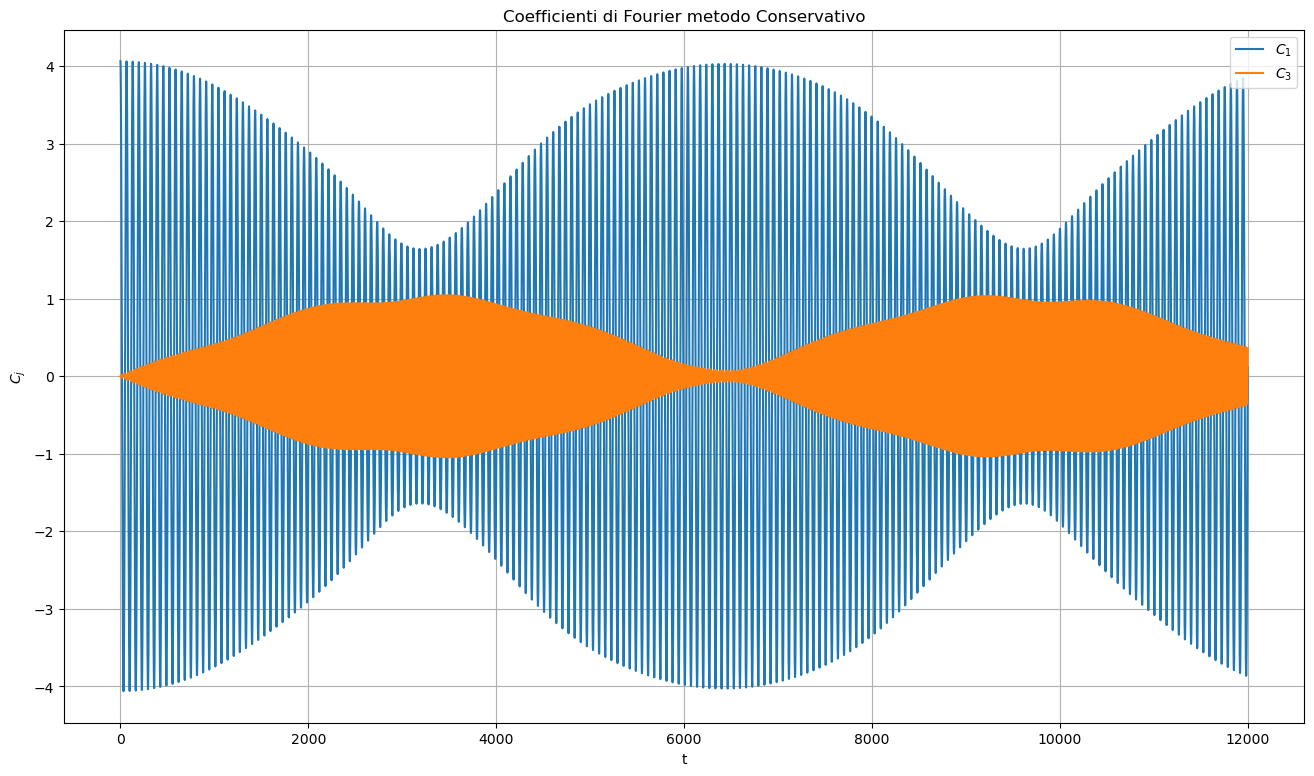

In [83]:
plt.figure(figsize=(16,9))
plt.plot(TIMES, C1_set, label='$C_1$')
plt.plot(TIMES, C2_set, label='$C_3$')
plt.xlim(None, None)
plt.xlabel('t')
plt.ylabel('$C_j$')
plt.grid(which='both')
plt.title('Coefficienti di Fourier metodo Conservativo')
plt.legend()
plt.show()

Da questa immagine possiamo vedere che il metodo conservativo così implementato restituisce lo stesso risultato calcolato dalla libreria di Matlab usata nell'articolo. Inoltre possiamo notare il fenomeno del "superperiodo" come menzionato precedentemente.

In [84]:
j1=1
j2=3

DT = 0.1
T_max = 1.2*1e04
theta = pi/( DIM + 1 )

y_0 = np.array([ sin(j*theta) for j in range(1, DIM+1) ])
v_0 = np.zeros(DIM)



y = y_0
v = v_0
C1_set_V = []
C2_set_V = []
TIMES = []
Y_0 = []



time = 0.
while time < T_max:
    time += DT
    y, v = SYS_VEL_VERL(y, v, A_CHAIN, DT)
    Y_0.append(y[0])
    C1 = c(j1, y)
    C2 = c(j2, y)
    TIMES.append(time)
    C1_set_V.append(C1)
    C2_set_V.append(C2)

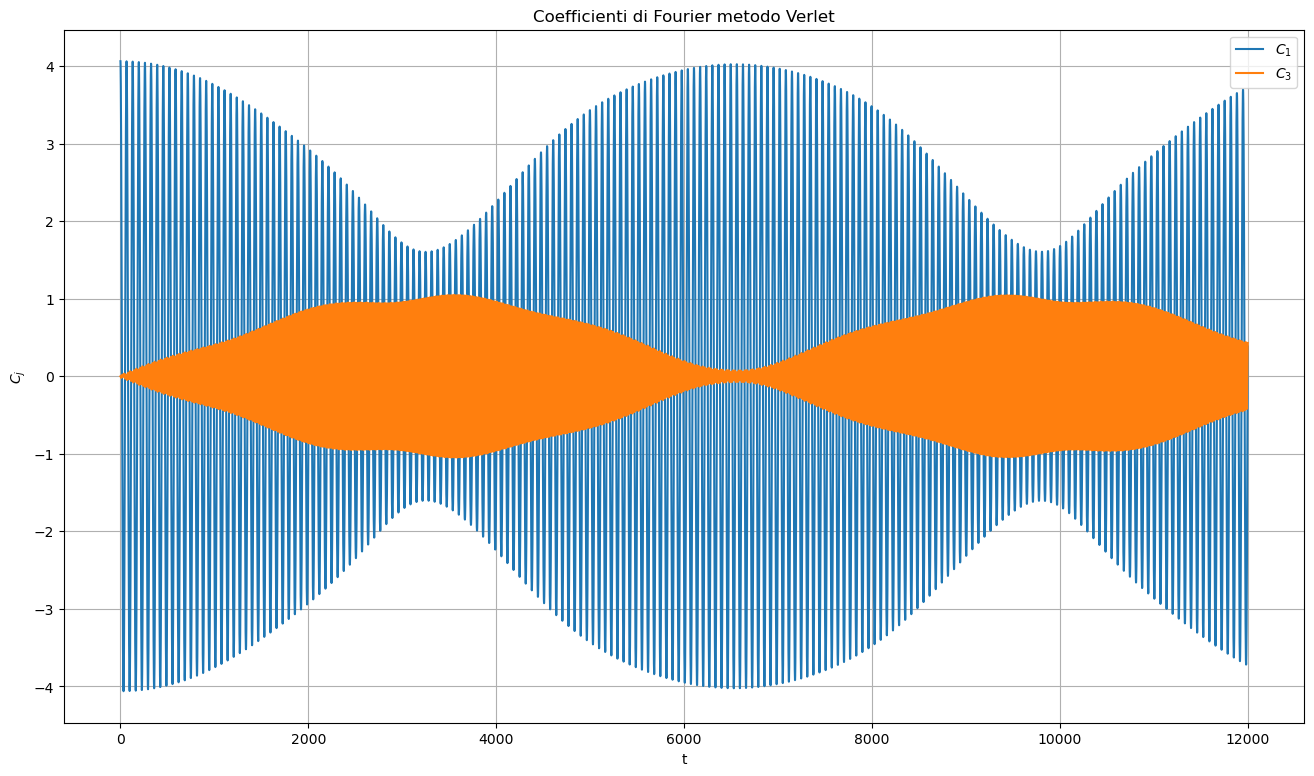

In [85]:
plt.figure(figsize=(16,9))
plt.plot(TIMES, C1_set_V, label='$C_1$')
plt.plot(TIMES, C2_set_V, label='$C_3$')
plt.xlim(None, None)
plt.xlabel('t')
plt.ylabel('$C_j$')
plt.grid(which='both')
plt.title('Coefficienti di Fourier metodo Verlet')
plt.legend()
plt.show()

Anche nel caso di Verlet si nota lo stesso fenomeno del "superperiodo".

L'ultima cosa che resta da fare è stimare questo "superperiodo" tramite il seguente algoritmo:

In [86]:
Envelope_C = []
Envelope_V = []
env_times_C = []
env_times_V = []
for n in range(1, len(C1_set)-1):
    if (C1_set[n-1] < C1_set[n]) and (C1_set[n] > C1_set[n+1]):
        Envelope_C.append(C1_set[n])
        env_times_C.append(TIMES[n])
    if (C1_set_V[n-1] < C1_set_V[n]) and (C1_set_V[n] > C1_set_V[n+1]):
        Envelope_V.append(C1_set[n])
        env_times_V.append(TIMES[n])

In [87]:
Supertimes_C = []
Supertimes_V = []

for n in range(1, len(Envelope_C)-1):
    if (Envelope_C[n] < Envelope_C[n+1]) and (Envelope_C[n] < Envelope_C[n-1]):
        Supertimes_C.append(env_times_C[n])
    if (Envelope_V[n] < Envelope_V[n+1]) and (Envelope_V[n] < Envelope_V[n-1]):
        Supertimes_V.append(env_times_V[n])
Superperiod_C=Supertimes_C[1]-Supertimes_C[0]
Superperiod_V=Supertimes_V[1]-Supertimes_V[0]
err_super=abs(Superperiod_C-Superperiod_V)/Superperiod_C
print("Il superperiodo calcolato secondo il metodo Conservativo è: ", Superperiod_C)
print("Il superperiodo calcolato secondo il metodo Velocity-Verlet è: ", Superperiod_V)
print("L'errore relativo rispetto al metodo Conservativo fra i due periodi stimati è: ", err_super*100, " %.")

Il superperiodo calcolato secondo il metodo Conservativo è:  6431.700000019247
Il superperiodo calcolato secondo il metodo Velocity-Verlet è:  6433.000000019256
L'errore relativo rispetto al metodo Conservativo fra i due periodi stimati è:  0.02021238552800157  %.


# CONCLUSIONE

Si è confrontato il metodo conservativo proposto per casi di singola particella e di molti corpi, con l'accortenza di valutare di caso in caso le migliori strategie numeriche per giungere ai risultati esibiti. Nei casi più semplici a una variabile, il metodo si è dimostrato convergente entro la tolleranza, mentre per i casi più complessi si sono riscontrate varie problematiche a seconda del problema e del sistema in esame. Numerose di queste difficoltà si imputano alla risoluzione del sistema a molte equazioni non lineari tramite metodo di Newton, necessario per l'implementazione dello stesso.

## Bibliografia:

[Conservative Numerical Methods For Nonlinear Oscillators, Mark H. Holmes, American Journal of Physics 88, 60-69 (2020)](https://doi.org/10.1119/10.0000295)

[Metodo di Verlet](https://www2.ph.ed.ac.uk/~dmarendu/MVP/MVP03.pdf)

[Algoritmo Matrici tridiagonali di Thomas](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm)

[Il metodo di Newton e le sue varianti per sistemi di equazioni non lineari, Chiara Manzoli](http://amslaurea.unibo.it/9154/)

[An overview of the escape dynamics in the Hénon–Heiles Hamiltonian system, Euaggelos E. Zotos, 3 March 2017](https://www.researchgate.net/publication/314223831_An_overview_of_the_escape_dynamics_in_the_Henon-Heiles_Hamiltonian_system)

In [88]:
import time
END = time.time()
print("Il tempo trascorso per far eseguire tutto il progetto è di: ", END-START," s.")

Il tempo trascorso per far eseguire tutto il progetto è di:  449.5015285015106  s.
